In [ ]:
!pip install geopandas matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

In [ ]:
data_20 = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu/BTL/thpt2020.csv')
data_20

SBD  Toan  Ngu_Van  Vat_Li  Hoa_Hoc  Sinh_Hoc  Lich_Su  Dia_Li  \
0       2001000001   7.0     6.00     NaN      NaN       NaN     8.00     NaN   
1       2001000002   9.0     6.00    7.25     8.75      7.25      NaN     NaN   
2       2001000003   8.8     6.50    8.25     8.75      4.75      NaN     NaN   
3       2001000004   7.0      NaN     NaN     6.00       NaN      NaN     NaN   
4       2001000005   9.0     7.50     NaN      NaN       NaN     5.75    7.25   
...            ...   ...      ...     ...      ...       ...      ...     ...   
870481  2064005817   5.2     6.25     NaN      NaN       NaN     6.75    8.50   
870482  2064005818   7.8     6.75    5.25     7.75      8.75      NaN     NaN   
870483  2064005819   9.2     7.25    5.50     8.00      7.75      NaN     NaN   
870484  2064005820   7.0     6.75    7.25     4.50      4.75      NaN     NaN   
870485  2064005821   6.8     7.00     NaN      NaN       NaN     5.75    6.50   

        GDCD  Ngoai_Ngu  
0        NaN        NaN  
1        NaN        9.4  
2        NaN        6.0  
3        NaN        8.2  
4       9.25        9.2  
...      ...        ...  
870481   NaN        NaN  
870482   NaN        5.0  
870483   NaN        7.6  
870484   NaN        2.2  
870485  7.25        3.4  

[870486 rows x 10 columns]

In [ ]:
data_21 = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu/BTL/thpt2021.csv')
data_21

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0        1000001   2.2     3.50        NaN     NaN      NaN       NaN   
1        1000002   9.2     8.25       10.0     NaN      NaN       NaN   
2        1000003   4.4     6.25        NaN     NaN      NaN       NaN   
3        1000004   8.4     6.75       10.0    4.00     3.00      3.50   
4        1000005   8.8     8.25        9.4    8.25     5.75      5.25   
...          ...   ...      ...        ...     ...      ...       ...   
928573  64006834   8.6     8.25        6.2    8.25     7.00      6.50   
928574  64006835   9.0     7.50        9.4    8.00     8.25      5.50   
928575  64006836   4.8     7.00        4.6     NaN      NaN       NaN   
928576  64006837   7.4     7.75        9.4     NaN      NaN       NaN   
928577  64006838   8.0     7.75        8.2     NaN      NaN       NaN   

        lich_su  dia_li  gdcd   province  Khối_A  Khối_B  Khối_C  Khối_D  
0          2.50    5.50   NaN     Hà Nội     NaN     NaN   11.50     NaN  
1          5.75    9.75  9.25     Hà Nội     NaN     NaN   23.75   27.45  
2          4.25    4.00   NaN     Hà Nội     NaN     NaN   14.50     NaN  
3           NaN     NaN   NaN     Hà Nội   15.40   14.90     NaN   25.15  
4           NaN     NaN   NaN     Hà Nội   22.80   19.80     NaN   26.45  
...         ...     ...   ...        ...     ...     ...     ...     ...  
928573      NaN     NaN   NaN  Hậu Giang   23.85   22.10     NaN   23.05  
928574      NaN     NaN   NaN  Hậu Giang   25.25   22.75     NaN   25.90  
928575     3.75    7.00  9.00  Hậu Giang     NaN     NaN   17.75   16.40  
928576     4.50    6.75  9.25  Hậu Giang     NaN     NaN   19.00   24.55  
928577     4.25    6.50  7.50  Hậu Giang     NaN     NaN   18.50   23.95  

[928578 rows x 15 columns]

In [ ]:
data_22 = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu/BTL/diem_thi_thpt_2022.csv')
data_22

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0        1000001   3.6     5.00        4.0     NaN      NaN       NaN   
1        1000002   8.4     6.75        7.6     NaN      NaN       NaN   
2        1000003   5.8     7.50        5.0     NaN      NaN       NaN   
3        1000004   7.4     7.50        8.6     NaN      NaN       NaN   
4        1000005   7.2     8.50        9.0     NaN      NaN       NaN   
...          ...   ...      ...        ...     ...      ...       ...   
995436  64006584   8.4     6.75        4.6     NaN      NaN       NaN   
995437  64006585   5.6     6.50        2.8     NaN      NaN       NaN   
995438  64006586   5.8     6.00        6.6     NaN      NaN       NaN   
995439  64006587   7.6     6.75        7.0     NaN      NaN       NaN   
995440  64006588   6.6     4.50        3.2     NaN      NaN       NaN   

        lich_su  dia_li  gdcd  
0          2.75    6.00  8.75  
1          8.50    7.50  8.25  
2          7.25    5.50  8.75  
3          7.50    6.50  7.50  
4          8.00    8.50  8.25  
...         ...     ...   ...  
995436     6.50    6.75  9.00  
995437     6.25    6.75  8.50  
995438     7.25    8.00  8.00  
995439     8.75    7.25  9.75  
995440     3.00    6.00  7.50  

[995441 rows x 10 columns]

In [ ]:
data_23 = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu/BTL/diem_thi_thpt_2023.csv')
data_23

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0         1000001   8.4     8.50        9.2     NaN      NaN       NaN   
1         1000002   7.2     8.50        9.2     NaN      NaN       NaN   
2         1000003   NaN     6.50        NaN     NaN      NaN       NaN   
3         1000004   7.8     8.25        7.8     NaN      NaN       NaN   
4         1000005   7.2     8.00        7.8     NaN      NaN       NaN   
...           ...   ...      ...        ...     ...      ...       ...   
1022055  64006933   7.8     6.75        5.4     NaN      NaN       NaN   
1022056  64006934   7.4     7.50        6.0     6.0     5.75      6.25   
1022057  64006935   6.4     7.00        3.0     NaN      NaN       NaN   
1022058  64006936   6.6     7.00        5.8     NaN      NaN       NaN   
1022059  64006937   NaN     5.00        NaN     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  
0           6.75    6.00  9.00           N1  
1           8.75    6.50  8.50           N1  
2           9.25    7.50   NaN          NaN  
3           4.50    6.25  8.25           N1  
4           4.75    6.75  8.25           N1  
...          ...     ...   ...          ...  
1022055     8.50    7.75  9.75           N1  
1022056      NaN     NaN   NaN           N1  
1022057     5.50    5.75  7.25           N1  
1022058     6.50    6.50  9.25           N1  
1022059     4.25    4.75   NaN          NaN  

[1022060 rows x 11 columns]

In [ ]:
data_24 = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu/BTL/diem_thi_thpt_2024.csv')
data_24

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0         1000001   8.4     6.75        8.0    6.00     5.25       5.0   
1         1000002   8.6     8.50        7.2     NaN      NaN       NaN   
2         1000003   8.2     8.75        8.2     NaN      NaN       NaN   
3         1000004   4.8     8.50        7.4     NaN      NaN       NaN   
4         1000005   8.6     9.00        7.8     NaN      NaN       NaN   
...           ...   ...      ...        ...     ...      ...       ...   
1061600  64007282   4.2     6.00        3.0     NaN      NaN       NaN   
1061601  64007283   5.2     6.00        3.6     NaN      NaN       NaN   
1061602  64007284   7.2     8.00        7.0    6.25     7.00       8.0   
1061603  64007285   5.2     5.25        4.4     NaN      NaN       NaN   
1061604  64007286   5.8     8.25        2.8     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  
0            NaN     NaN   NaN           N1  
1           7.25    6.00  8.00           N1  
2           7.25    7.25  8.75           N1  
3           7.00    6.00  7.50           N1  
4           9.00    8.75  8.50           N1  
...          ...     ...   ...          ...  
1061600     5.25    6.25  7.50           N1  
1061601     6.25    5.75  7.75           N1  
1061602      NaN     NaN   NaN           N1  
1061603     4.75    6.50  8.75           N1  
1061604     5.00    7.25  8.25           N1  

[1061605 rows x 11 columns]

###Tiền xử lí###

In [ ]:
def rename_col(data):
   columns = data.columns
   new_columns = {}
   for column in columns:
      # column_sub = re.sub(r'[^0-9a-zA-Z]+','',column)
      column_lower = column.lower()
      if column_lower == 'ma_ngoai_ngu':
        data.drop(columns = column, inplace = True)
        continue
      new_columns[column] = column_lower
   data.rename(columns = new_columns, inplace = True)
   return data
data_20 = rename_col(data_20)
data_21 = rename_col(data_21)
data_22 = rename_col(data_22)
data_23 = rename_col(data_23)
data_24 = rename_col(data_24)


In [ ]:
def check_duplicate(data):
  num_duplicates = data.duplicated().sum()
  if num_duplicates > 0:
     print(f'Có {num_duplicates} giá trị bị trùng lặp')
  else:
     print(f'Không có giá trị trùng lặp')
  print('-----------------------------------------------')
check_duplicate(data_20)
check_duplicate(data_21)
check_duplicate(data_22)
check_duplicate(data_23)
check_duplicate(data_24)

Không có giá trị trùng lặp
-----------------------------------------------
Không có giá trị trùng lặp
-----------------------------------------------
Không có giá trị trùng lặp
-----------------------------------------------
Không có giá trị trùng lặp
-----------------------------------------------
Không có giá trị trùng lặp
-----------------------------------------------


In [ ]:
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
def astype_col(data):
   data['sbd'] = data['sbd'].astype('str')
   for subject in subjects:
      data[subject] = data[subject].astype('float')
   return data
data_20 = astype_col(data_20)
data_21 = astype_col(data_21)
data_22 = astype_col(data_22)
data_23 = astype_col(data_23)
data_24 = astype_col(data_24)

In [ ]:
def divide_sbd(x):
  x = (int(x) % 100000000) // 1000000
  return str(x)
# Tạo từ điển để ánh xạ mã số tỉnh với tên tỉnh
province_mapping = {
    '1': 'Hà Nội',
    '2': 'Hồ Chí Minh',
    '3': 'Hải Phòng',
    '4': 'Đà Nẵng',
    '5': 'Hà Giang',
    '6': 'Cao Bằng',
    '7': 'Lai Châu',
    '8': 'Lào Cai',
    '9': 'Tuyên Quang',
    '10': 'Lạng Sơn',
    '11': 'Bắc Kạn',
    '12': 'Thái Nguyên',
    '13': 'Yên Bái',
    '14': 'Sơn La',
    '15': 'Phú Thọ',
    '16': 'Vĩnh Phúc',
    '17': 'Quảng Ninh',
    '18': 'Bắc Giang',
    '19': 'Bắc Ninh',
    '21': 'Hải Dương',
    '22': 'Hưng Yên',
    '23': 'Hòa Bình',
    '24': 'Hà Nam',
    '25': 'Nam Định',
    '26': 'Thái Bình',
    '27': 'Ninh Bình',
    '28': 'Thanh Hóa',
    '29': 'Nghệ An',
    '30': 'Hà Tĩnh',
    '31': 'Quảng Bình',
    '32': 'Quảng Trị',
    '33': 'Thừa Thiên - Huế',
    '34': 'Quảng Nam',
    '35': 'Quảng Ngãi',
    '36': 'Kon Tum',
    '37': 'Bình Định',
    '38': 'Gia Lai',
    '39': 'Phú Yên',
    '40': 'Đắk Lắk',
    '41': 'Khánh Hòa',
    '42': 'Lâm Đồng',
    '43': 'Bình Phước',
    '44': 'Bình Dương',
    '45': 'Ninh Thuận',
    '46': 'Tây Ninh',
    '47': 'Bình Thuận',
    '48': 'Đồng Nai',
    '49': 'Long An',
    '50': 'Đồng Tháp',
    '51': 'An Giang',
    '52': 'Bà Rịa - Vũng Tàu',
    '53': 'Tiền Giang',
    '54': 'Kiên Giang',
    '55': 'Cần Thơ',
    '56': 'Bến Tre',
    '57': 'Vĩnh Long',
    '58': 'Trà Vinh',
    '59': 'Sóc Trăng',
    '60': 'Bạc Liêu',
    '61': 'Cà Mau',
    '62': 'Điện Biên',
    '63': 'Đăk Nông',
    '64': 'Hậu Giang'
}
def get_province(sbd):
  if len(sbd) == 7:
     prefix = str(sbd)[:1]
  else:
     prefix = str(sbd)[:2]
  return province_mapping.get(prefix, 'UNKNOWN')
def add_province(data):
  if data is data_20:
     data['sbd'] = data['sbd'].apply(divide_sbd)
  data['province'] = data['sbd'].apply(get_province)
  return data
data_20 = add_province(data_20)
data_21 = add_province(data_21)
data_22 = add_province(data_22)
data_23 = add_province(data_23)
data_24 = add_province(data_24)

In [ ]:
def check_outlier(data):
  columns = data.columns
  for column in columns:
     if column == 'sbd' or column == 'province':
       continue
     num_outlier = np.nansum((data[column] < 0)|(data[column] > 10))
     if num_outlier > 0:
        print(f"Cột {column} có {num_outlier} giá trị ngoại lệ")
     else:
        print(f"Không có giá trị ngoại lệ ở cột {column}")
  print("------------------------------------------------------")
check_outlier(data_20)
check_outlier(data_21)
check_outlier(data_22)
check_outlier(data_23)
check_outlier(data_24)


Không có giá trị ngoại lệ ở cột toan
Không có giá trị ngoại lệ ở cột ngu_van
Không có giá trị ngoại lệ ở cột vat_li
Không có giá trị ngoại lệ ở cột hoa_hoc
Không có giá trị ngoại lệ ở cột sinh_hoc
Không có giá trị ngoại lệ ở cột lich_su
Không có giá trị ngoại lệ ở cột dia_li
Không có giá trị ngoại lệ ở cột gdcd
Không có giá trị ngoại lệ ở cột ngoai_ngu
------------------------------------------------------
Không có giá trị ngoại lệ ở cột toan
Không có giá trị ngoại lệ ở cột ngu_van
Không có giá trị ngoại lệ ở cột ngoai_ngu
Không có giá trị ngoại lệ ở cột vat_li
Không có giá trị ngoại lệ ở cột hoa_hoc
Không có giá trị ngoại lệ ở cột sinh_hoc
Không có giá trị ngoại lệ ở cột lich_su
Không có giá trị ngoại lệ ở cột dia_li
Không có giá trị ngoại lệ ở cột gdcd
Cột khối_a có 322256 giá trị ngoại lệ
Cột khối_b có 320735 giá trị ngoại lệ
Cột khối_c có 569297 giá trị ngoại lệ
Cột khối_d có 790597 giá trị ngoại lệ
------------------------------------------------------
Không có giá trị ngoại lệ ở 

###Năm 2020###

In [ ]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870486 entries, 0 to 870485
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        870486 non-null  object 
 1   toan       866581 non-null  float64
 2   ngu_van    856565 non-null  float64
 3   vat_li     293287 non-null  float64
 4   hoa_hoc    295536 non-null  float64
 5   sinh_hoc   290377 non-null  float64
 6   lich_su    568581 non-null  float64
 7   dia_li     555072 non-null  float64
 8   gdcd       482980 non-null  float64
 9   ngoai_ngu  772098 non-null  float64
 10  province   870486 non-null  object 
dtypes: float64(9), object(2)
memory usage: 73.1+ MB


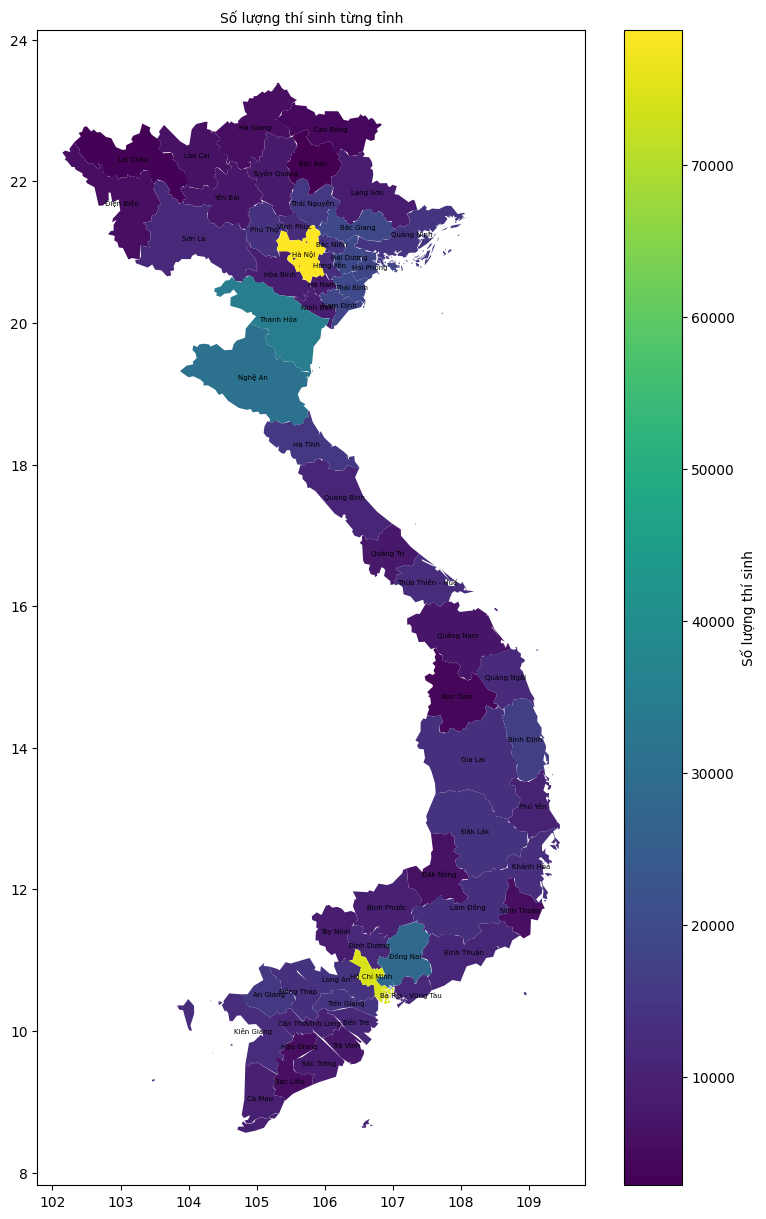

In [ ]:
# Đếm số lượng thí sinh theo từng tỉnh từ dữ liệu điểm năm 2020
province_counts = data_20['province'].value_counts().reset_index()
province_counts.columns = ['province', 'number of students']  # Đặt lại tên cột

# Đọc file bản đồ Việt Nam (GeoJSON)
vietnam_map = gpd.read_file('/content/drive/MyDrive/Phân tích dữ liệu/BTL/vietnam.geojson')

# Gộp dữ liệu bản đồ với số lượng thí sinh theo tỉnh
vietnam_map = vietnam_map.merge(province_counts, left_on='name', right_on='province')

# Khởi tạo biểu đồ kích thước lớn hơn
fig, ax = plt.subplots(1, figsize=(10,15))

# Vẽ bản đồ với cột 'number of students' được biểu diễn bằng màu sắc
vietnam_map.plot(
    column='number of students',     # Cột dùng để tô màu
    ax=ax,                           # Trục vẽ
    legend=True,                     # Hiển thị chú giải (colorbar)
    cmap='viridis',                  # Bảng màu Viridis (vàng → tím)
    legend_kwds={
        'label': "Số lượng thí sinh",         # Nhãn của colorbar
        'orientation': "vertical"             # Chiều dọc
    }
)

# Ghi nhãn tên tỉnh vào giữa mỗi khu vực
for idx, row in vietnam_map.iterrows():
    ax.annotate(
        text=row['name'],                           # Tên tỉnh
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # Tọa độ trọng tâm tỉnh
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=5, color='black'                   # Font chữ nhỏ, màu đen
    )

plt.title('Số lượng thí sinh từng tỉnh', fontsize=10)

plt.show()


In [ ]:
data_20.describe()

toan        ngu_van         vat_li        hoa_hoc  \
count  866581.000000  856565.000000  293287.000000  295536.000000   
mean        6.662271       6.601825       6.718001       6.705225   
std         1.819042       1.248463       1.497900       1.607924   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.400000       6.000000       5.750000       5.500000   
50%         7.000000       6.750000       7.000000       7.000000   
75%         8.000000       7.500000       7.750000       8.000000   
max        10.000000      10.000000      10.000000      10.000000   

            sinh_hoc        lich_su         dia_li           gdcd  \
count  290377.000000  568581.000000  555072.000000  482980.000000   
mean        5.588041       5.181097       6.773215       8.125164   
std         1.350572       1.598987       1.171702       1.090310   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.750000       4.000000       6.000000       7.500000   
50%         5.500000       5.000000       7.000000       8.250000   
75%         6.500000       6.250000       7.500000       9.000000   
max        10.000000      10.000000      10.000000      10.000000   

           ngoai_ngu  
count  772098.000000  
mean        4.568337  
std         1.808446  
min         0.000000  
25%         3.200000  
50%         4.200000  
75%         5.600000  
max        10.000000

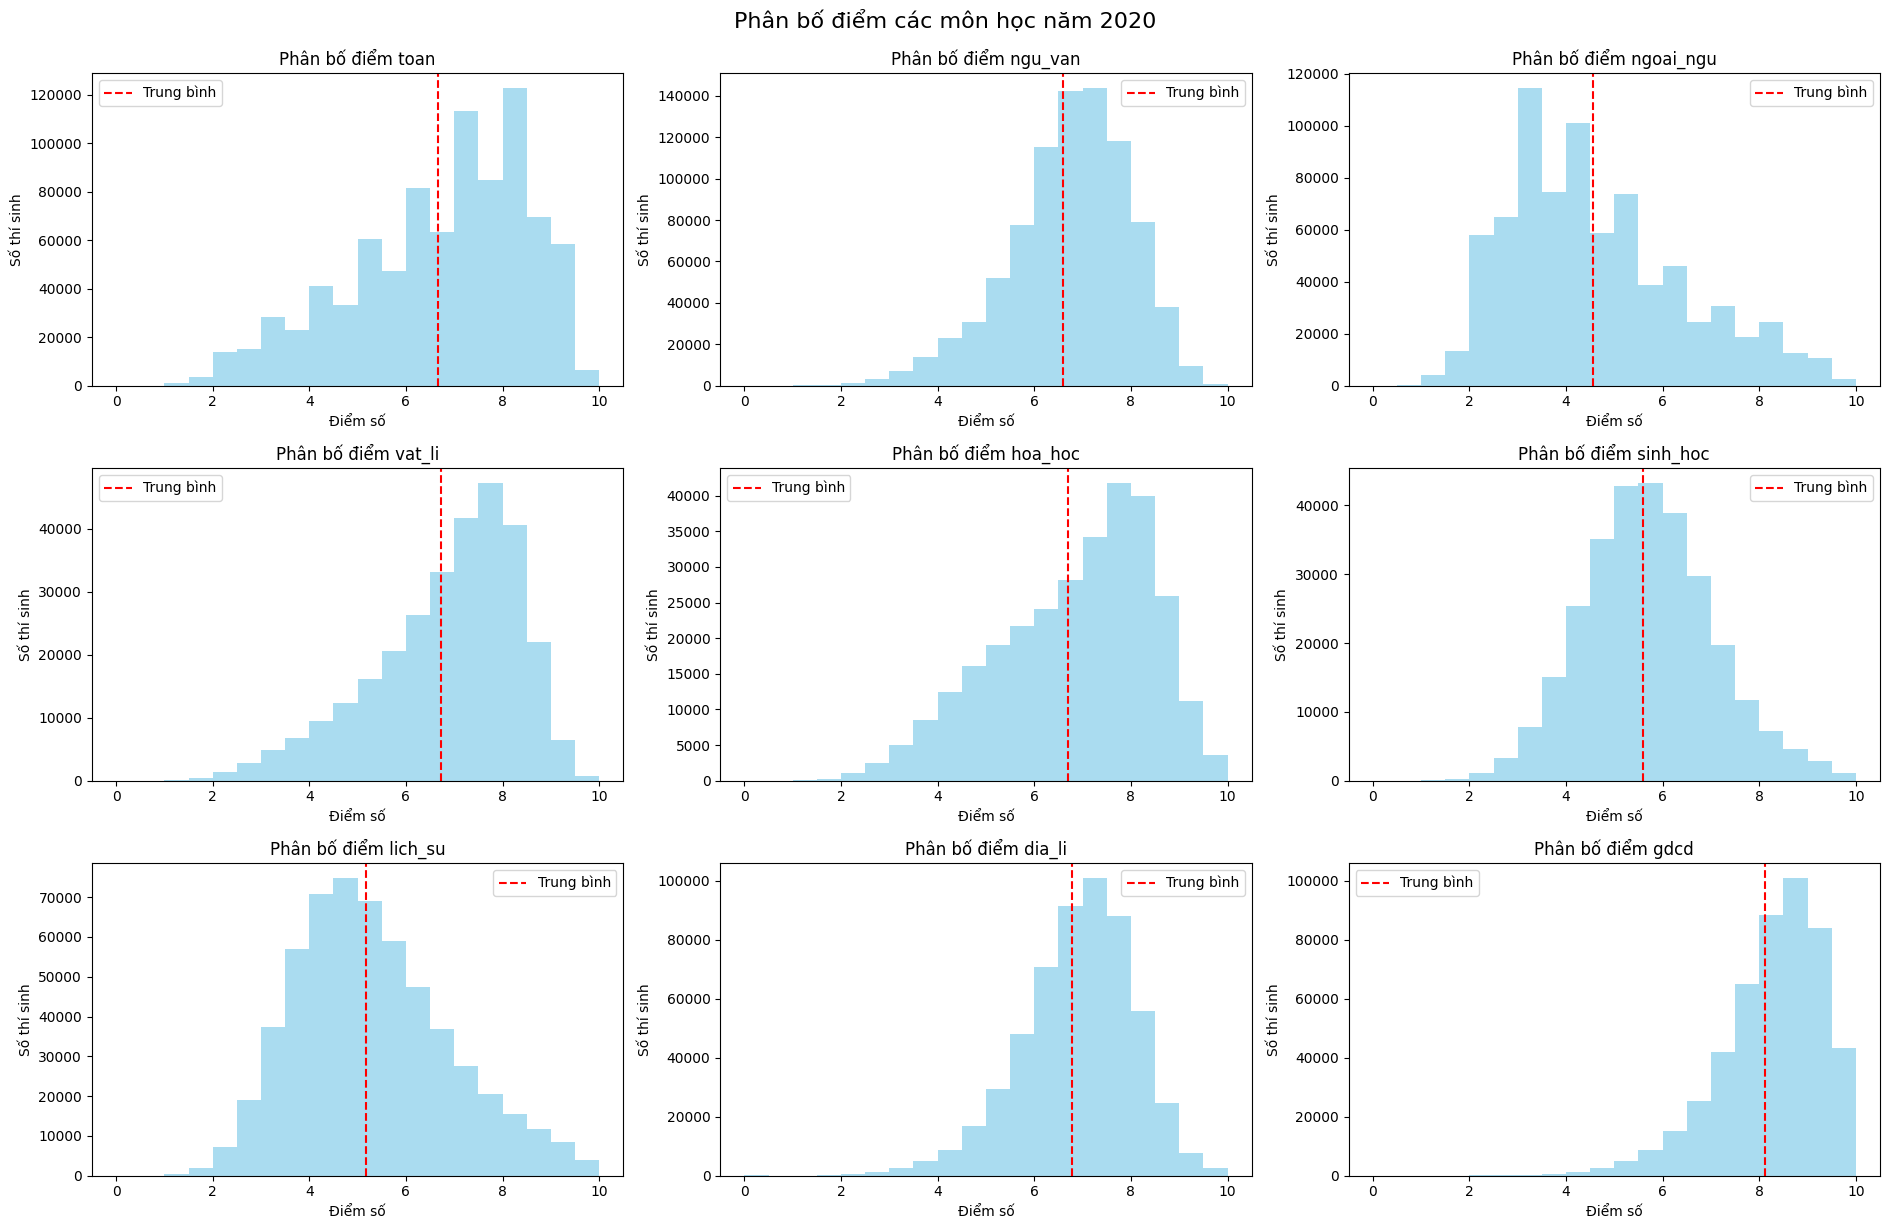

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 12))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    if subject in data_20.columns:
        axes[i].hist(data_20[subject].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Phân bố điểm {subject}')
        axes[i].set_xlabel('Điểm số')
        axes[i].set_ylabel('Số thí sinh')
        axes[i].axvline(data_20[subject].mean(), color='red', linestyle='--', label='Trung bình')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học năm 2020', fontsize=16, y=1.02)
plt.show()

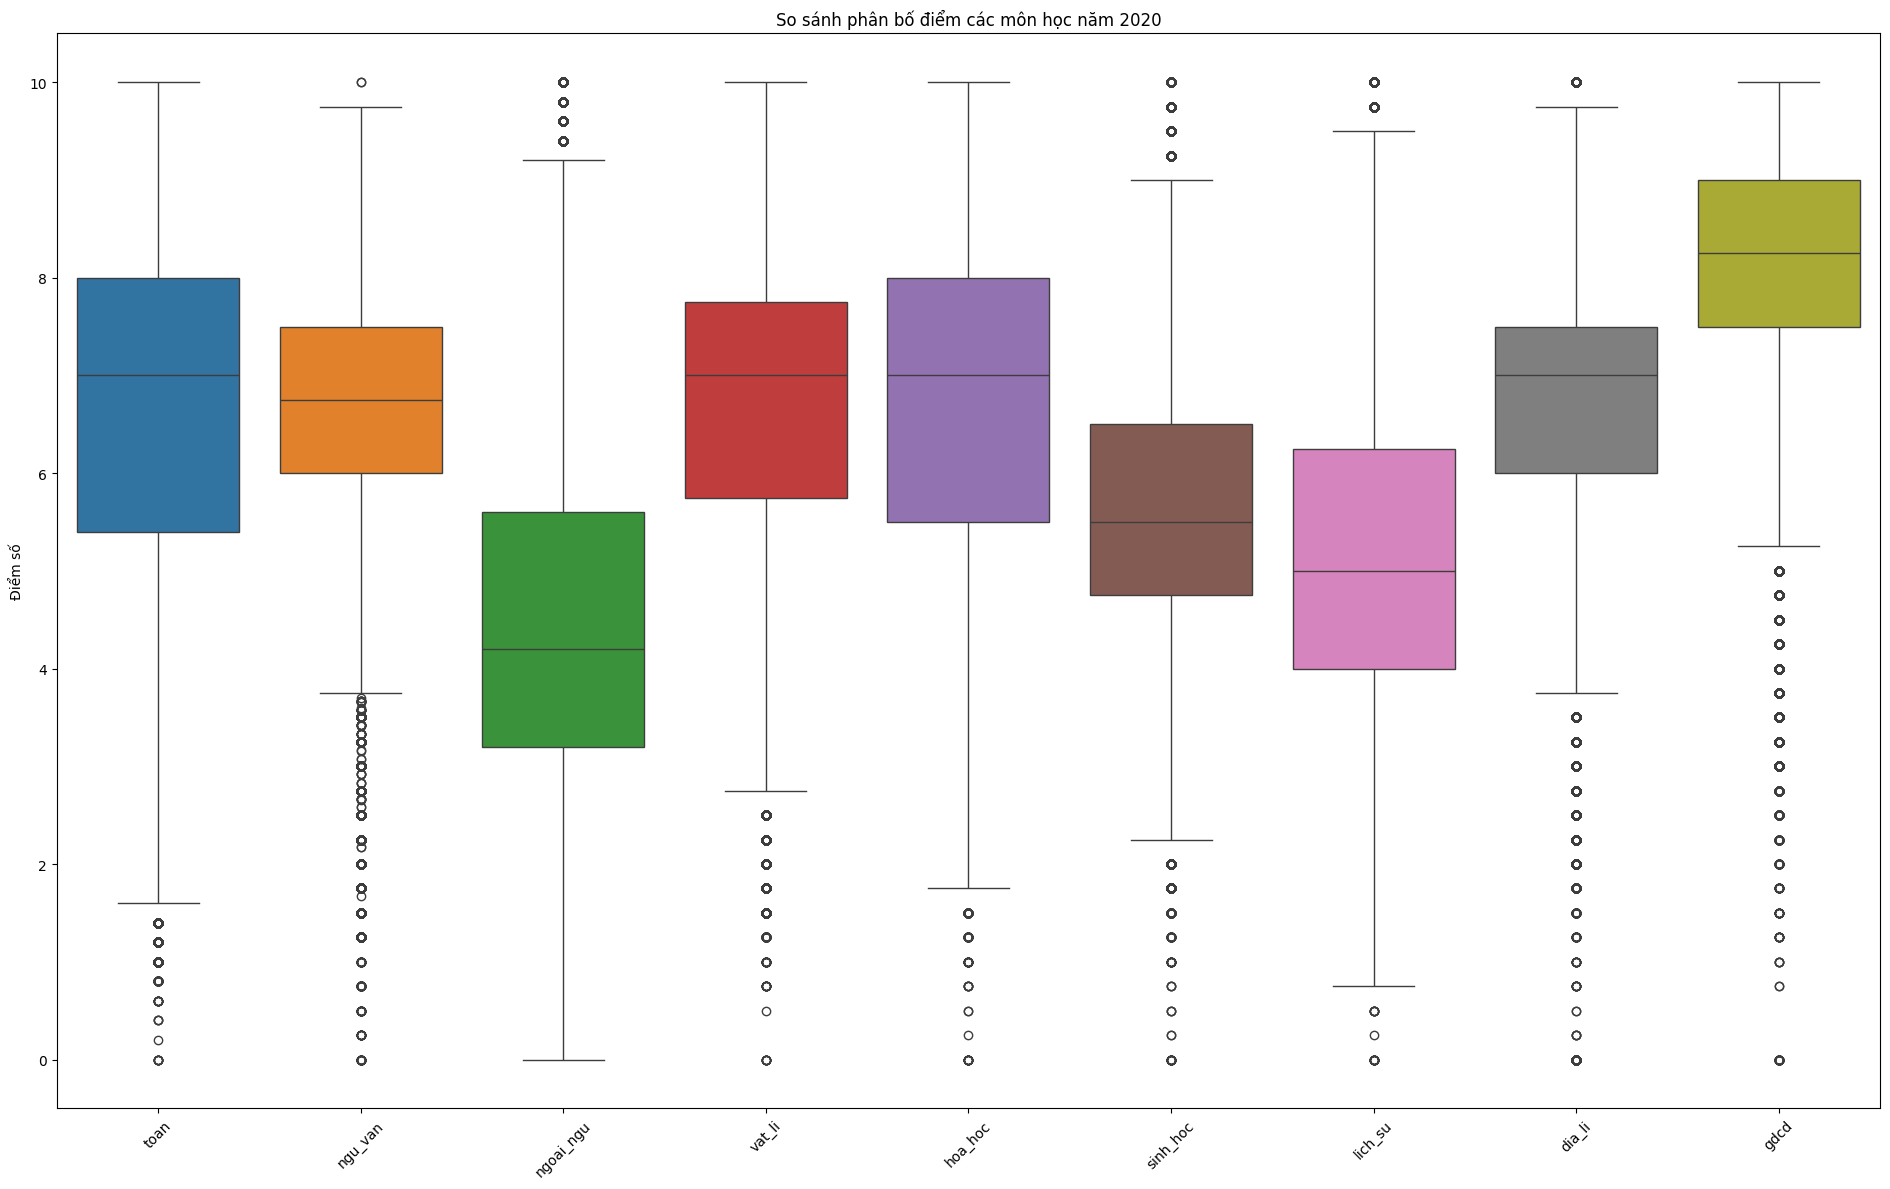

In [ ]:
data_subjects = data_20[subjects]

plt.figure(figsize=(19, 12))
sns.boxplot(data=data_subjects)
plt.title('So sánh phân bố điểm các môn học năm 2020')
plt.ylabel('Điểm số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

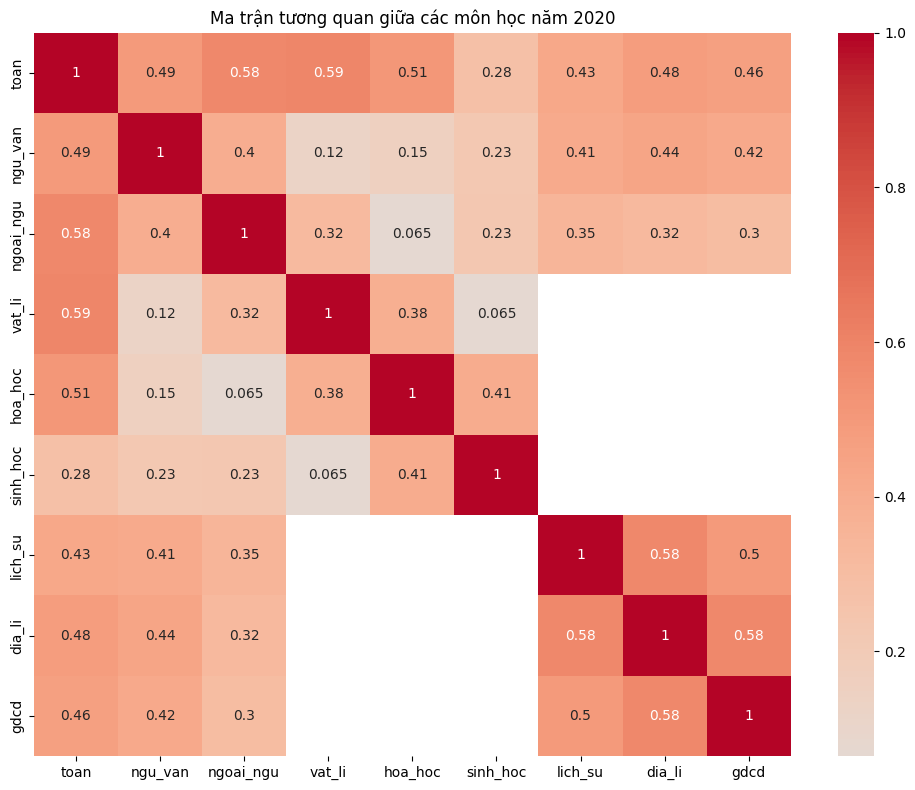

In [ ]:
# Ma trận tương quan
correlation_matrix = data_20[subjects].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các môn học năm 2020')
plt.tight_layout()
plt.show()

In [ ]:
# Tính điểm khối thi
data_20['Khối_A'] = data_20['toan'] + data_20['vat_li'] + data_20['hoa_hoc']
data_20['Khối_B'] = data_20['toan'] + data_20['hoa_hoc'] + data_20['sinh_hoc']
data_20['Khối_C'] = data_20['ngu_van'] + data_20['lich_su'] + data_20['dia_li']
data_20['Khối_D'] = data_20['toan'] + data_20['ngu_van'] + data_20['ngoai_ngu']
# Thống kê khối thi
print("=== THỐNG KÊ KHỐI THI ===")
for khoi in ['Khối_A', 'Khối_B', 'Khối_C', 'Khối_D']:
    valid_count = data_20[khoi].count()
    if valid_count > 0:
        print(f"{khoi}:")
        print(f"  Số thí sinh: {valid_count:,}")
        print(f"  Điểm trung bình: {data_20[khoi].mean():.2f}")
        print(f"  Điểm cao nhất: {data_20[khoi].max():.2f}")

=== THỐNG KÊ KHỐI THI ===
Khối_A:
  Số thí sinh: 291,252
  Điểm trung bình: 21.45
  Điểm cao nhất: 29.75
Khối_B:
  Số thí sinh: 290,321
  Điểm trung bình: 20.34
  Điểm cao nhất: 29.80
Khối_C:
  Số thí sinh: 554,555
  Điểm trung bình: 18.47
  Điểm cao nhất: 29.25
Khối_D:
  Số thí sinh: 768,235
  Điểm trung bình: 18.16
  Điểm cao nhất: 29.00


In [ ]:
# 1. Cấu hình các khối thi và môn tương ứng
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

# 2. Tính điểm trung bình và gộp với bản đồ riêng cho từng khối
score_maps = {}
for block, subject in blocks.items():
    temp = data_20.copy()
    temp['average score'] = temp[subject].mean(axis=1, skipna=True)
    avg_score_by_prov = temp.groupby('province')['average score'].mean().reset_index()

    # 💡 Sử dụng bản sao mới của vietnam_map để tránh ghi đè
    vietnam_map_copy = vietnam_map.copy()

    merged_map = vietnam_map_copy.merge(
        avg_score_by_prov,
        how='left',
        left_on='name',
        right_on='province',
        suffixes=('', '_dup')
    )

    if 'average score_dup' in merged_map.columns:
        merged_map.drop(columns=['average score_dup'], inplace=True)

    score_maps[block] = merged_map
    print(f"{block}: ", merged_map['average score'].describe())


A00:  count    62.000000
mean      6.200104
std       0.582802
min       4.416254
25%       5.900942
50%       6.350251
75%       6.589004
max       7.245264
Name: average score, dtype: float64
A01:  count    62.000000
mean      5.436514
std       0.568958
min       3.874308
25%       5.096658
50%       5.539706
75%       5.797998
max       6.548785
Name: average score, dtype: float64
B00:  count    62.000000
mean      6.095399
std       0.541397
min       4.397113
25%       5.815871
50%       6.210472
75%       6.477333
max       7.037494
Name: average score, dtype: float64
D01:  count    62.000000
mean      5.801460
std       0.496551
min       4.350024
25%       5.554084
50%       5.823176
75%       6.187743
max       6.730207
Name: average score, dtype: float64


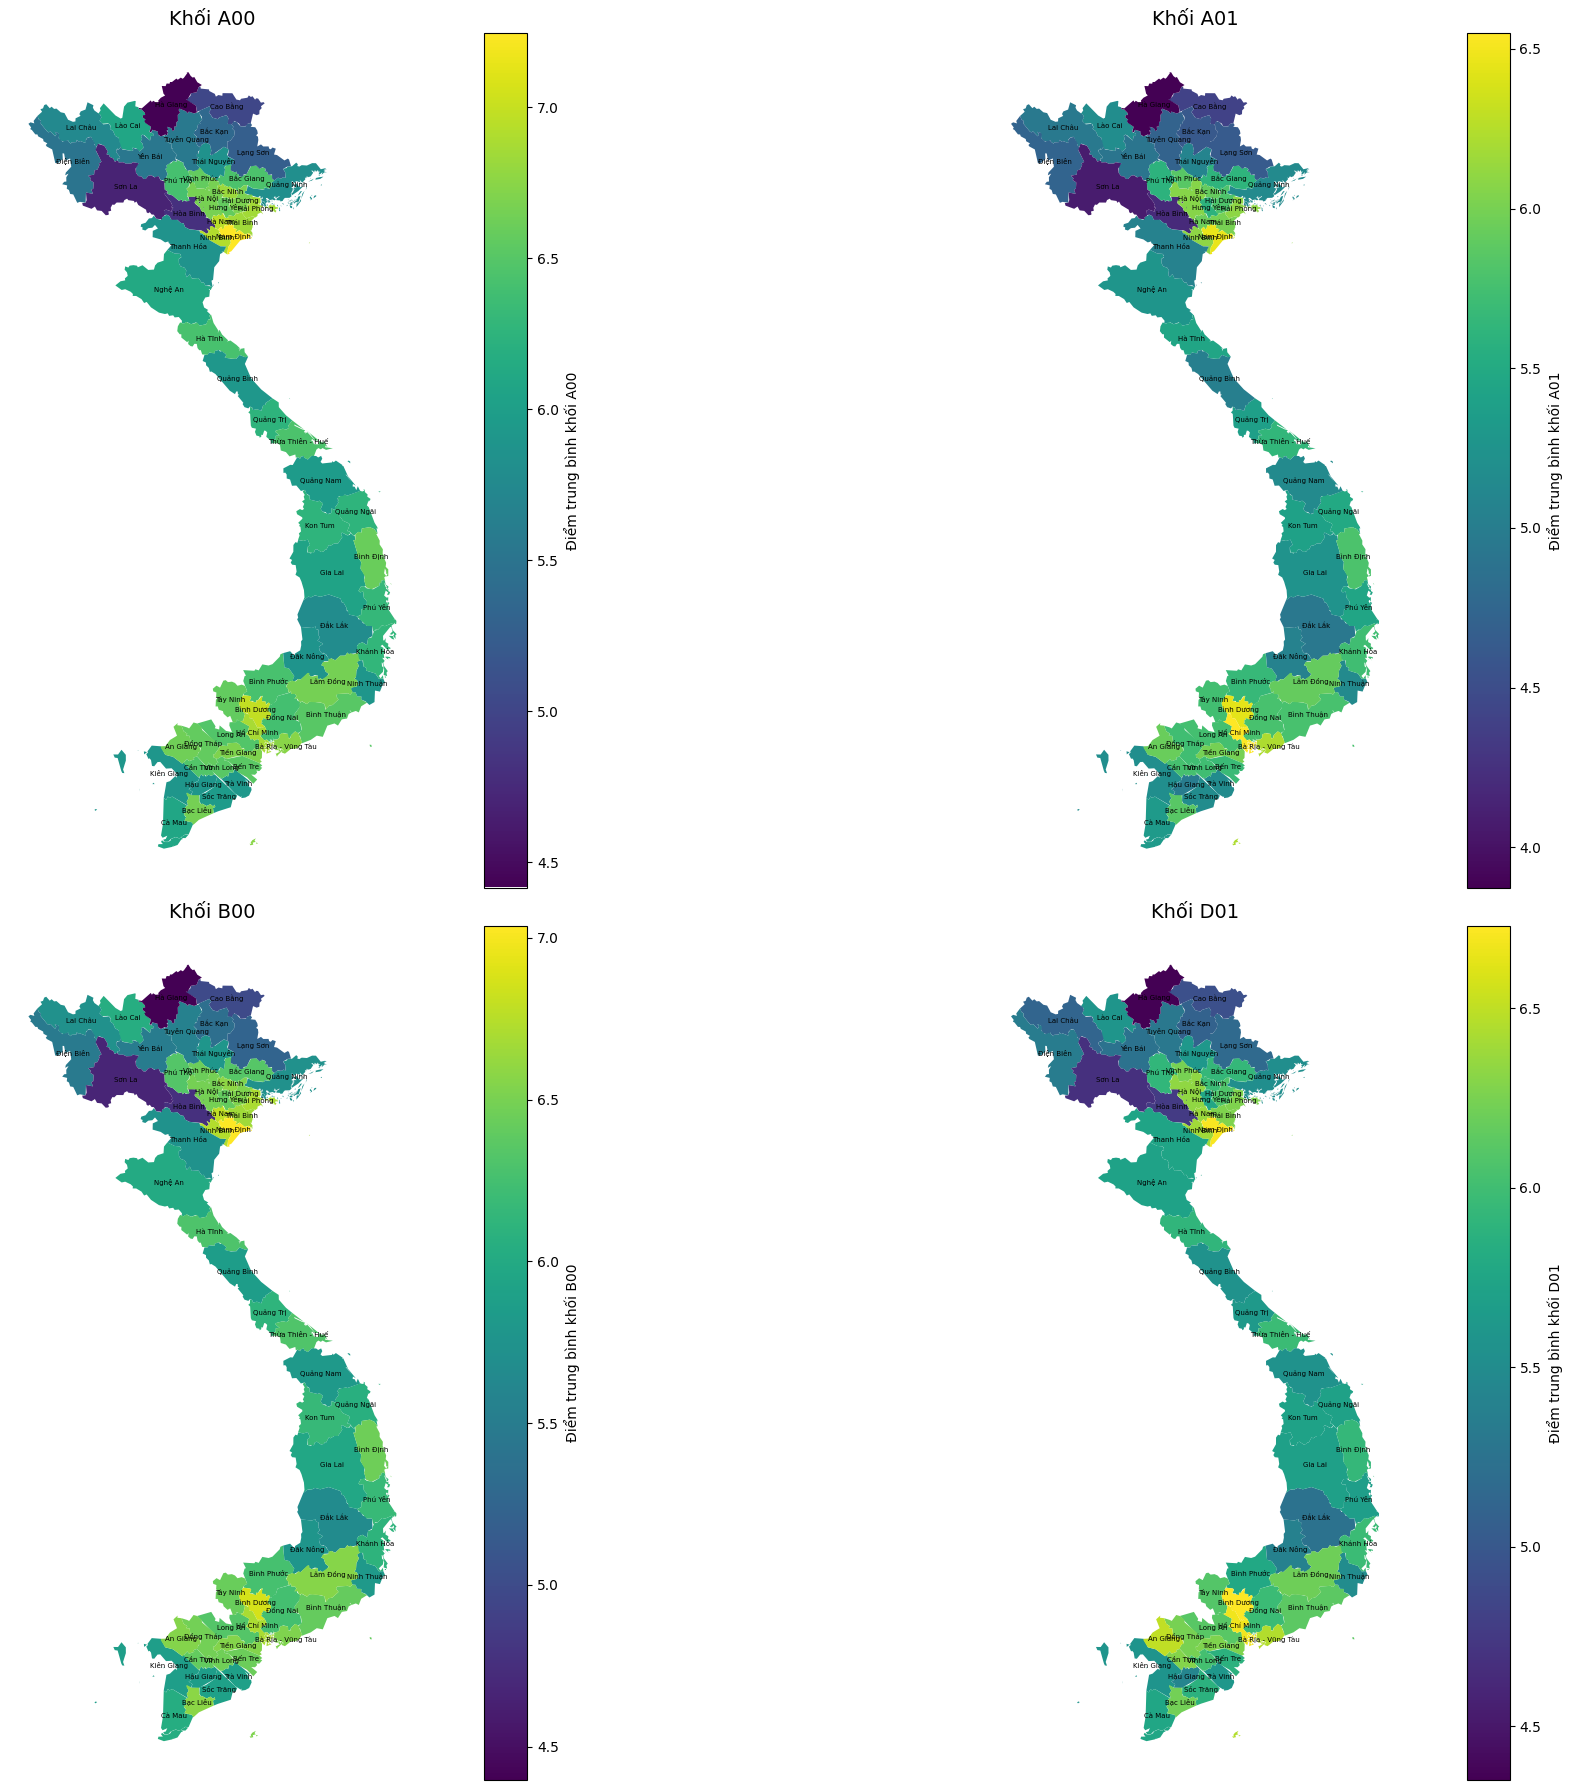

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # 2 hàng, 2 cột
axes = axes.flatten()  # Chuyển về 1D để dễ lặp

for i, block in enumerate(['A00', 'A01', 'B00', 'D01']):
    ax = axes[i]
    map_data = score_maps[block]

    map_data.plot(
        column='average score',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Điểm trung bình khối {block}", 'orientation': "vertical"}
    )

    # Ghi nhãn tên tỉnh
    for idx, row in map_data.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            centroid = row['geometry'].centroid
            ax.annotate(
                text=row['name'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=5, color='black'
            )

    ax.set_title(f"Khối {block}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


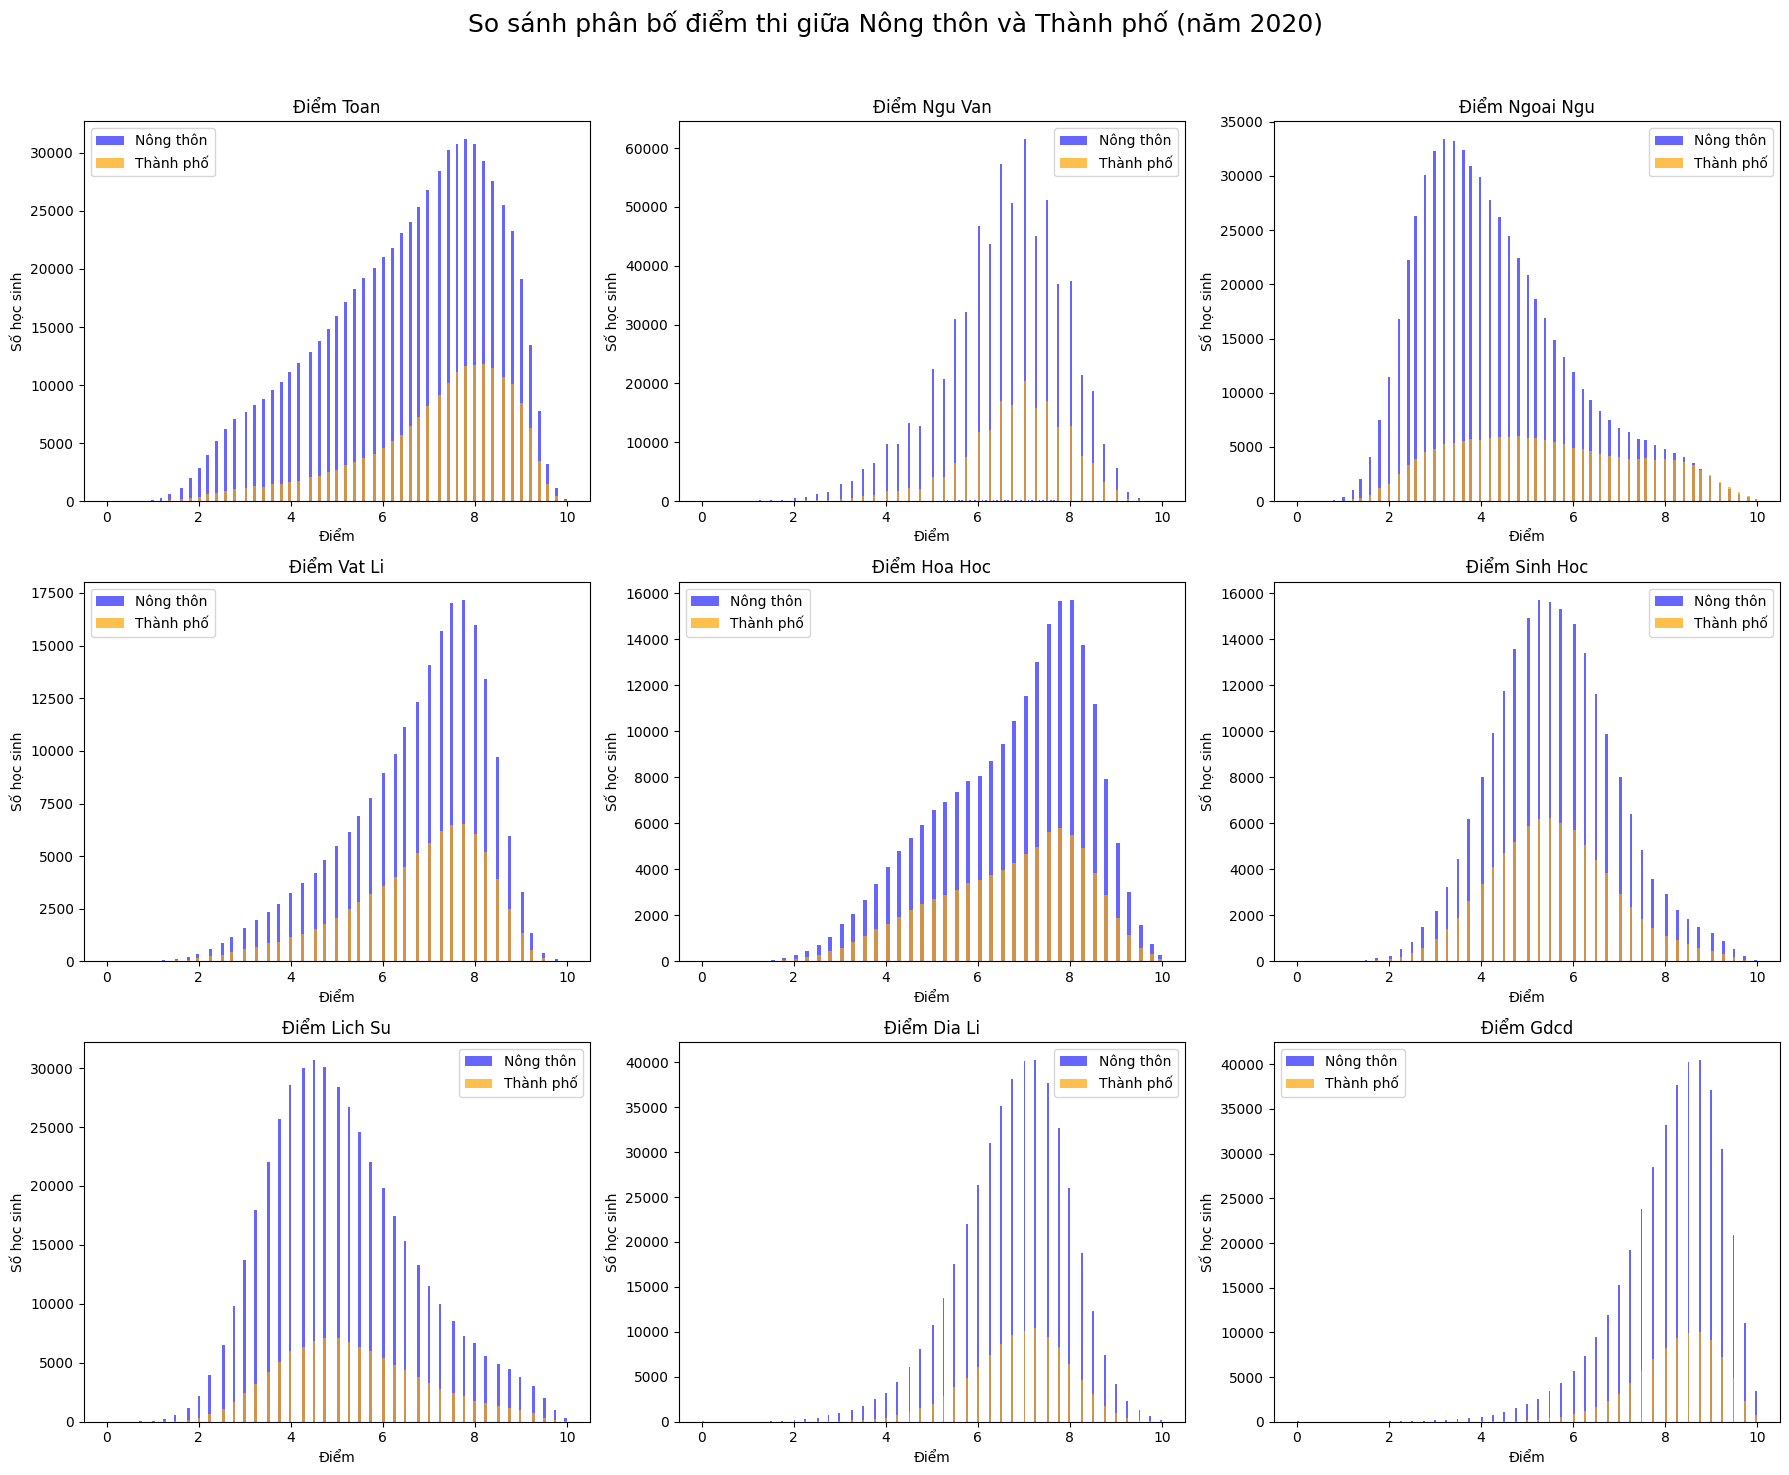

In [ ]:

# Phân nhóm tỉnh thành phố và nông thôn
df = data_20.copy()
cities = ['Hồ Chí Minh', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ', 'Bình Dương']
df_cities = df[df['province'].isin(cities)]
df_other_provinces = df[~df['province'].isin(cities)]

# Tạo 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Dữ liệu từng môn (loại bỏ NaN)
    city_scores = df_cities[subject].dropna()
    rural_scores = df_other_provinces[subject].dropna()

    # Dùng cùng bin cho 2 nhóm để dễ so sánh
    bins = 'auto'
    counts_rural, bins_rural, _ = ax.hist(rural_scores, bins=bins, color='blue', alpha=0.6, label='Nông thôn')
    ax.hist(city_scores, bins=bins_rural, color='orange', alpha=0.7, label='Thành phố')

    ax.set_title(f"Điểm {subject.replace('_', ' ').title()}")
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số học sinh')
    ax.legend()

plt.suptitle("So sánh phân bố điểm thi giữa Nông thôn và Thành phố (năm 2020)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chừa chỗ cho tiêu đề
plt.show()


/tmp/ipython-input-23-3559392506.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


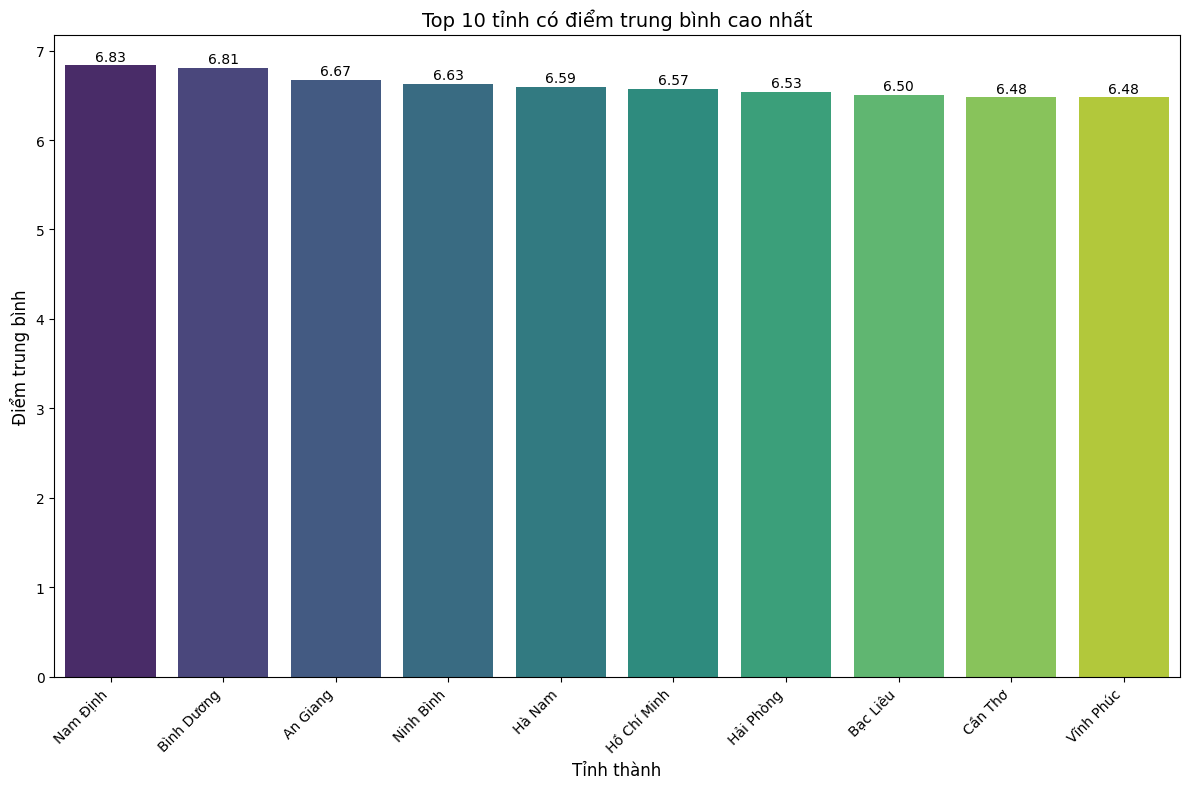

In [ ]:
# Tính điểm trung bình 6 môn
data = data_20.copy()
data['avg_subjects'] = data[subjects].mean(axis=1, skipna=True)

# Trung bình theo tỉnh
province_avg = (
    data.groupby('province')['avg_subjects']
    .mean()
    .reset_index()
    .sort_values(by='avg_subjects', ascending=False)
)

# Lấy 10 tỉnh cao nhất
top10 = province_avg.head(10)

# Vẽ barplot dọc
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top10,
    x='province',
    y='avg_subjects',
    palette='viridis'
)

# Thêm điểm số lên đầu mỗi cột
for i, row in top10.iterrows():
    ax.text(
        x=top10.index.get_loc(i),
        y=row['avg_subjects'] + 0.02,  # để lệch lên trên 1 chút
        s=f"{row['avg_subjects']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xlabel("Tỉnh thành", fontsize=12)
plt.title("Top 10 tỉnh có điểm trung bình cao nhất", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
social_science_sample = data_20.dropna(subset=['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su'])

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']:
    social_science_sample[column] = social_science_sample[column].apply(classify_score)

# P(Ngu Van High | GDCD High)
p_van_high_given_gdcd_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High')]) / len(social_science_sample[social_science_sample['gdcd'] == 'High'])

# P(GDCD High | Ngu Van High)
p_gdcd_high_given_van_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[social_science_sample['ngu_van'] == 'High'])

# P(GDCD High | Ngu Van High, Ngoai Ngu High)
p_gdcd_high_given_van_ngoai_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# P(Ngoai Ngu High | GDCD High, Ngu Van High)
p_ngoai_ngu_high_given_gdcd_van_high = len(social_science_sample[(social_science_sample['ngoai_ngu'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')])

# P(Ngu Van High | GDCD High, Ngoai Ngu High)
p_van_high_given_gdcd_ngoai_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Ngu Van High | GDCD High)': p_van_high_given_gdcd_high,
    'P(GDCD High | Ngu Van High)': p_gdcd_high_given_van_high,
    'P(GDCD High | Ngu Van High, Ngoai Ngu High)': p_gdcd_high_given_van_ngoai_high,
    'P(Ngoai Ngu High | GDCD High, Ngu Van High)': p_ngoai_ngu_high_given_gdcd_van_high,
    'P(Ngu Van High | GDCD High, Ngoai Ngu High)': p_van_high_given_gdcd_ngoai_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                      0.15158                     0.766049   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.812096   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.187649   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.535221  


P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                      0.15158                     0.766049   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.812096   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.187649   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.535221

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
natural_science_sample = data_20.dropna(subset=['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc'])

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']:
    natural_science_sample[column] = natural_science_sample[column].apply(classify_score)

# P(Toan High | Hoa Hoc High)
p_toan_high_given_hoahoc_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[natural_science_sample['hoa_hoc'] == 'High'])

# P(Toan High | Vat Li High)
p_toan_high_given_vatli_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[natural_science_sample['vat_li'] == 'High'])

# P(Toan High | Vat Li High, Hoa Hoc High)
p_toan_high_given_li_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# P(Sinh Hoc High | Hoa Hoc High, Vat Li High)
p_sinh_high_given_hoa_li_high = len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[(natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')])

# P(Toan Hoc High | Sinh Hoc High, Hoa Hoc High)
p_toan_high_given_sinh_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Toan High | Hoa Hoc High)': p_toan_high_given_hoahoc_high,
    'P(Toan High | Vat Li High)': p_toan_high_given_vatli_high,
    'P(Toan Hoc High | Vat Li High, Hoa Hoc High)': p_toan_high_given_li_hoa_high,
    'P(Sinh High | Vat Li High, Hoa Hoc High)': p_sinh_high_given_hoa_li_high,
    'P(Toan High | Sinh Hoc High, Hoa Hoc High)': p_toan_high_given_sinh_hoa_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.875791                    0.912698   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                       0.96493   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.037013   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                     0.96293  


P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.875791                    0.912698   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                       0.96493   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.037013   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                     0.96293

###Năm 2021###

In [ ]:
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928578 entries, 0 to 928577
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        928578 non-null  object 
 1   toan       918841 non-null  float64
 2   ngu_van    915863 non-null  float64
 3   ngoai_ngu  815898 non-null  float64
 4   vat_li     326384 non-null  float64
 5   hoa_hoc    327954 non-null  float64
 6   sinh_hoc   322785 non-null  float64
 7   lich_su    594598 non-null  float64
 8   dia_li     589113 non-null  float64
 9   gdcd       498287 non-null  float64
 10  province   928578 non-null  object 
 11  khối_a     323261 non-null  float64
 12  khối_b     321243 non-null  float64
 13  khối_c     576509 non-null  float64
 14  khối_d     801124 non-null  float64
dtypes: float64(13), object(2)
memory usage: 106.3+ MB


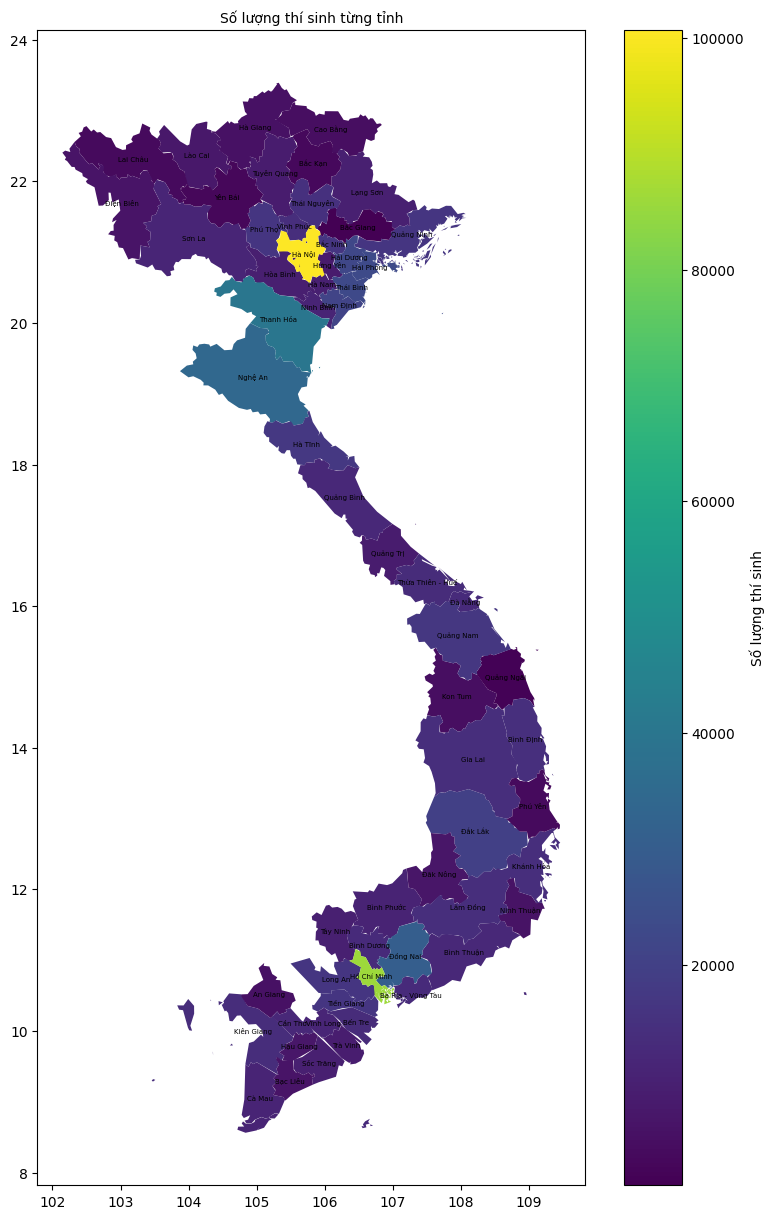

In [ ]:
# Đếm số lượng thí sinh theo từng tỉnh từ dữ liệu điểm năm 2020
province_counts = data_21['province'].value_counts().reset_index()
province_counts.columns = ['province', 'number of students']  # Đặt lại tên cột

# Đọc file bản đồ Việt Nam (GeoJSON)
vietnam_map = gpd.read_file('/content/drive/MyDrive/Phân tích dữ liệu/BTL/vietnam.geojson')
# Gộp dữ liệu bản đồ với số lượng thí sinh theo tỉnh
vietnam_map = vietnam_map.merge(province_counts, left_on='name', right_on='province')

# Khởi tạo biểu đồ kích thước lớn hơn
fig, ax = plt.subplots(1, figsize=(10,15))

# Vẽ bản đồ với cột 'number of students' được biểu diễn bằng màu sắc
vietnam_map.plot(
    column='number of students',     # Cột dùng để tô màu
    ax=ax,                           # Trục vẽ
    legend=True,                     # Hiển thị chú giải (colorbar)
    cmap='viridis',                  # Bảng màu Viridis (vàng → tím)
    legend_kwds={
        'label': "Số lượng thí sinh",         # Nhãn của colorbar
        'orientation': "vertical"             # Chiều dọc
    }
)

# Ghi nhãn tên tỉnh vào giữa mỗi khu vực
for idx, row in vietnam_map.iterrows():
    ax.annotate(
        text=row['name'],                           # Tên tỉnh
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # Tọa độ trọng tâm tỉnh
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=5, color='black'                   # Font chữ nhỏ, màu đen
    )

plt.title('Số lượng thí sinh từng tỉnh', fontsize=10)

plt.show()


In [ ]:
data_21.describe()

toan        ngu_van      ngoai_ngu         vat_li  \
count  918841.000000  915863.000000  815898.000000  326384.000000   
mean        6.619900       6.468313       5.865823       6.565941   
std         1.680991       1.362593       2.226066       1.393452   
min         0.600000       0.000000       0.000000       0.000000   
25%         5.600000       5.750000       4.000000       5.750000   
50%         7.000000       6.500000       5.600000       6.750000   
75%         8.000000       7.500000       7.800000       7.750000   
max        10.000000      10.000000      10.000000      10.000000   

             hoa_hoc       sinh_hoc        lich_su         dia_li  \
count  327954.000000  322785.000000  594598.000000  589113.000000   
mean        6.623733       5.517883       4.976845       6.960660   
std         1.600070       1.440486       1.769705       1.176759   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.500000       4.500000       3.500000       6.250000   
50%         7.000000       5.500000       4.750000       7.000000   
75%         7.750000       6.500000       6.250000       7.750000   
max        10.000000      10.000000      10.000000      10.000000   

                gdcd         khối_a         khối_b         khối_c  \
count  498287.000000  323261.000000  321243.000000  576509.000000   
mean        8.384317      20.999101      19.972539      18.344408   
std         1.151104       3.198005       3.098889       3.614376   
min         0.000000       4.050000       4.400000       0.750000   
25%         7.750000      19.100000      17.950000      16.000000   
50%         8.500000      21.400000      20.150000      18.250000   
75%         9.250000      23.350000      22.100000      20.750000   
max        10.000000      29.550000      30.000000      29.250000   

              khối_d  
count  801124.000000  
mean       19.314468  
std         4.107528  
min         4.250000  
25%        16.400000  
50%        19.500000  
75%        22.600000  
max        29.150000

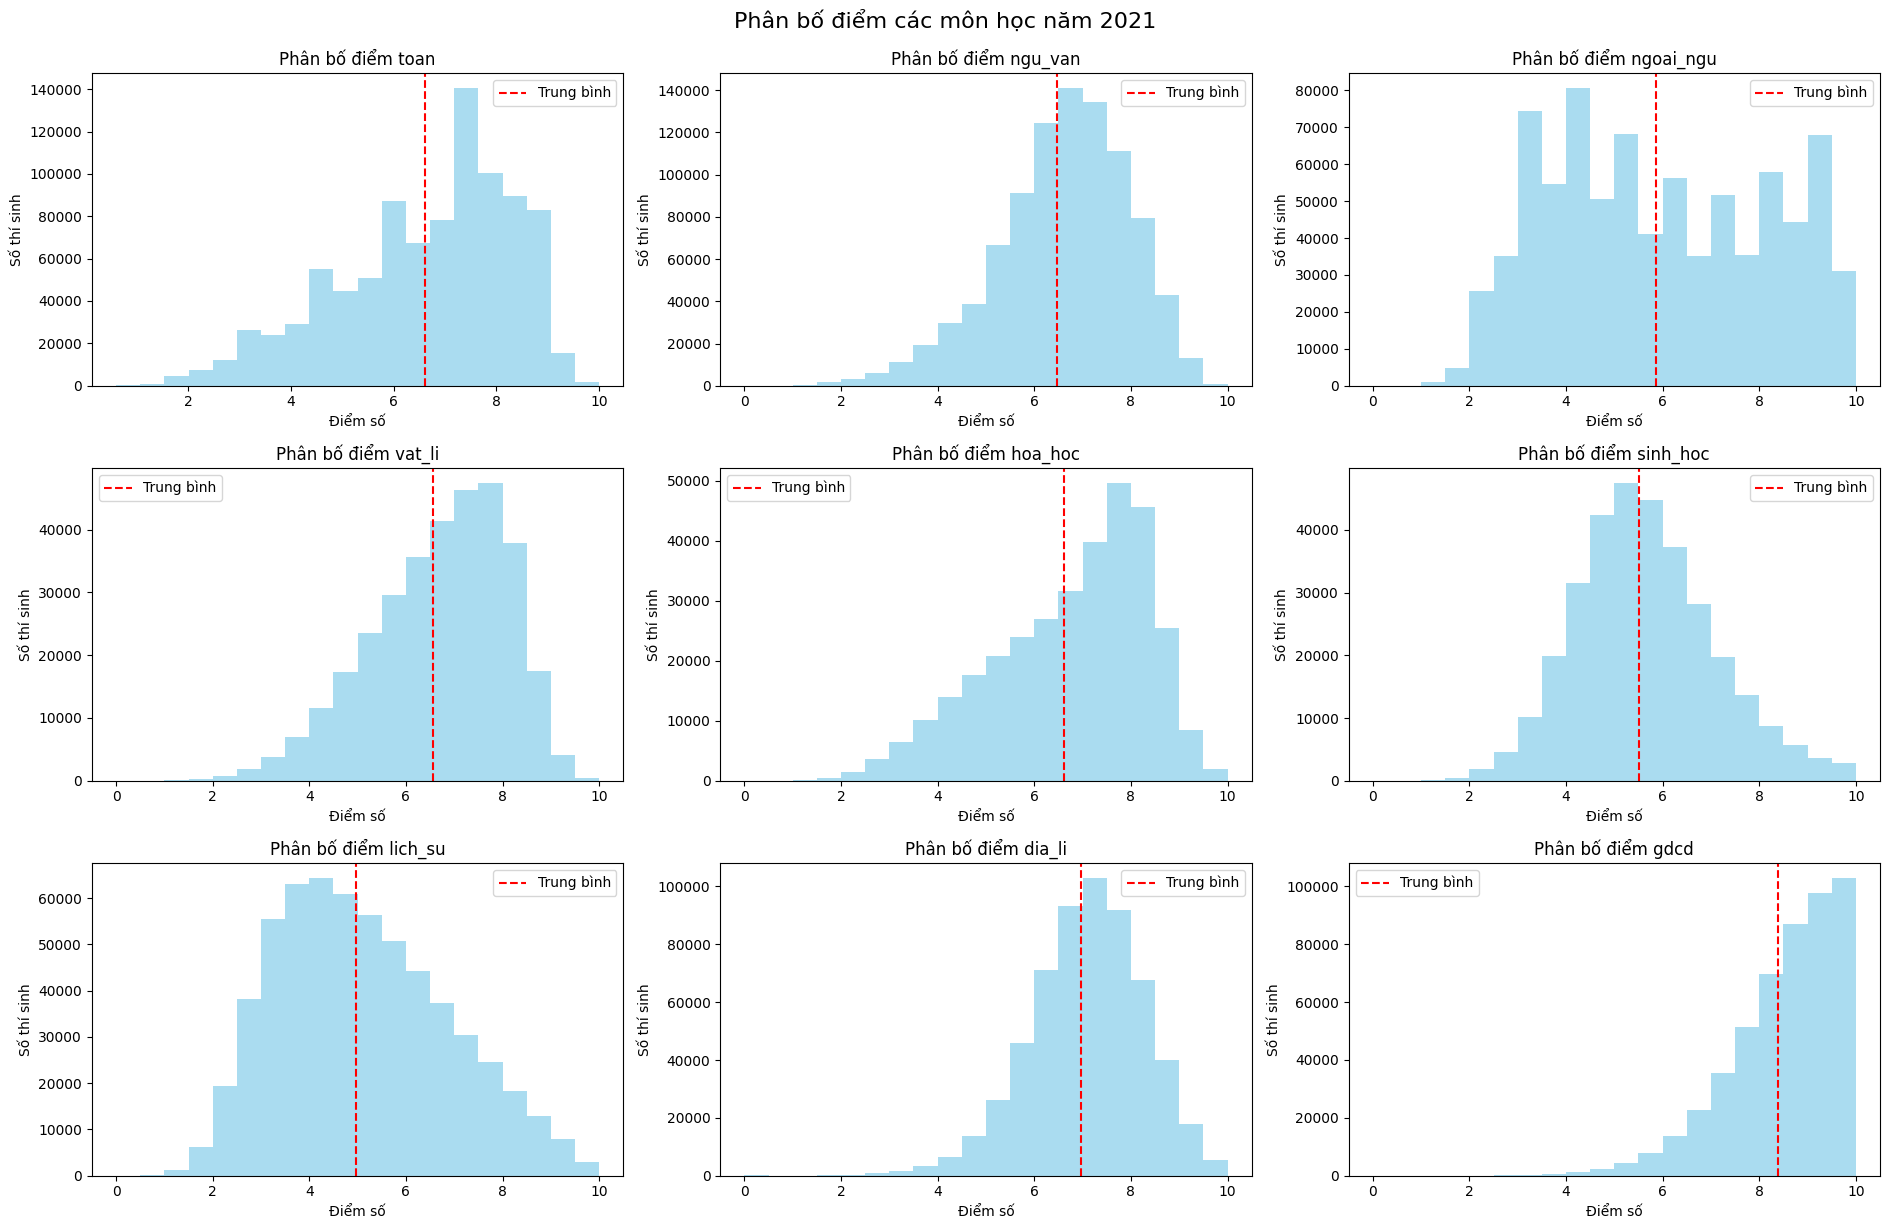

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 12))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    if subject in data_21.columns:
        axes[i].hist(data_21[subject].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Phân bố điểm {subject}')
        axes[i].set_xlabel('Điểm số')
        axes[i].set_ylabel('Số thí sinh')
        axes[i].axvline(data_21[subject].mean(), color='red', linestyle='--', label='Trung bình')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học năm 2021', fontsize=16, y=1.02)
plt.show()

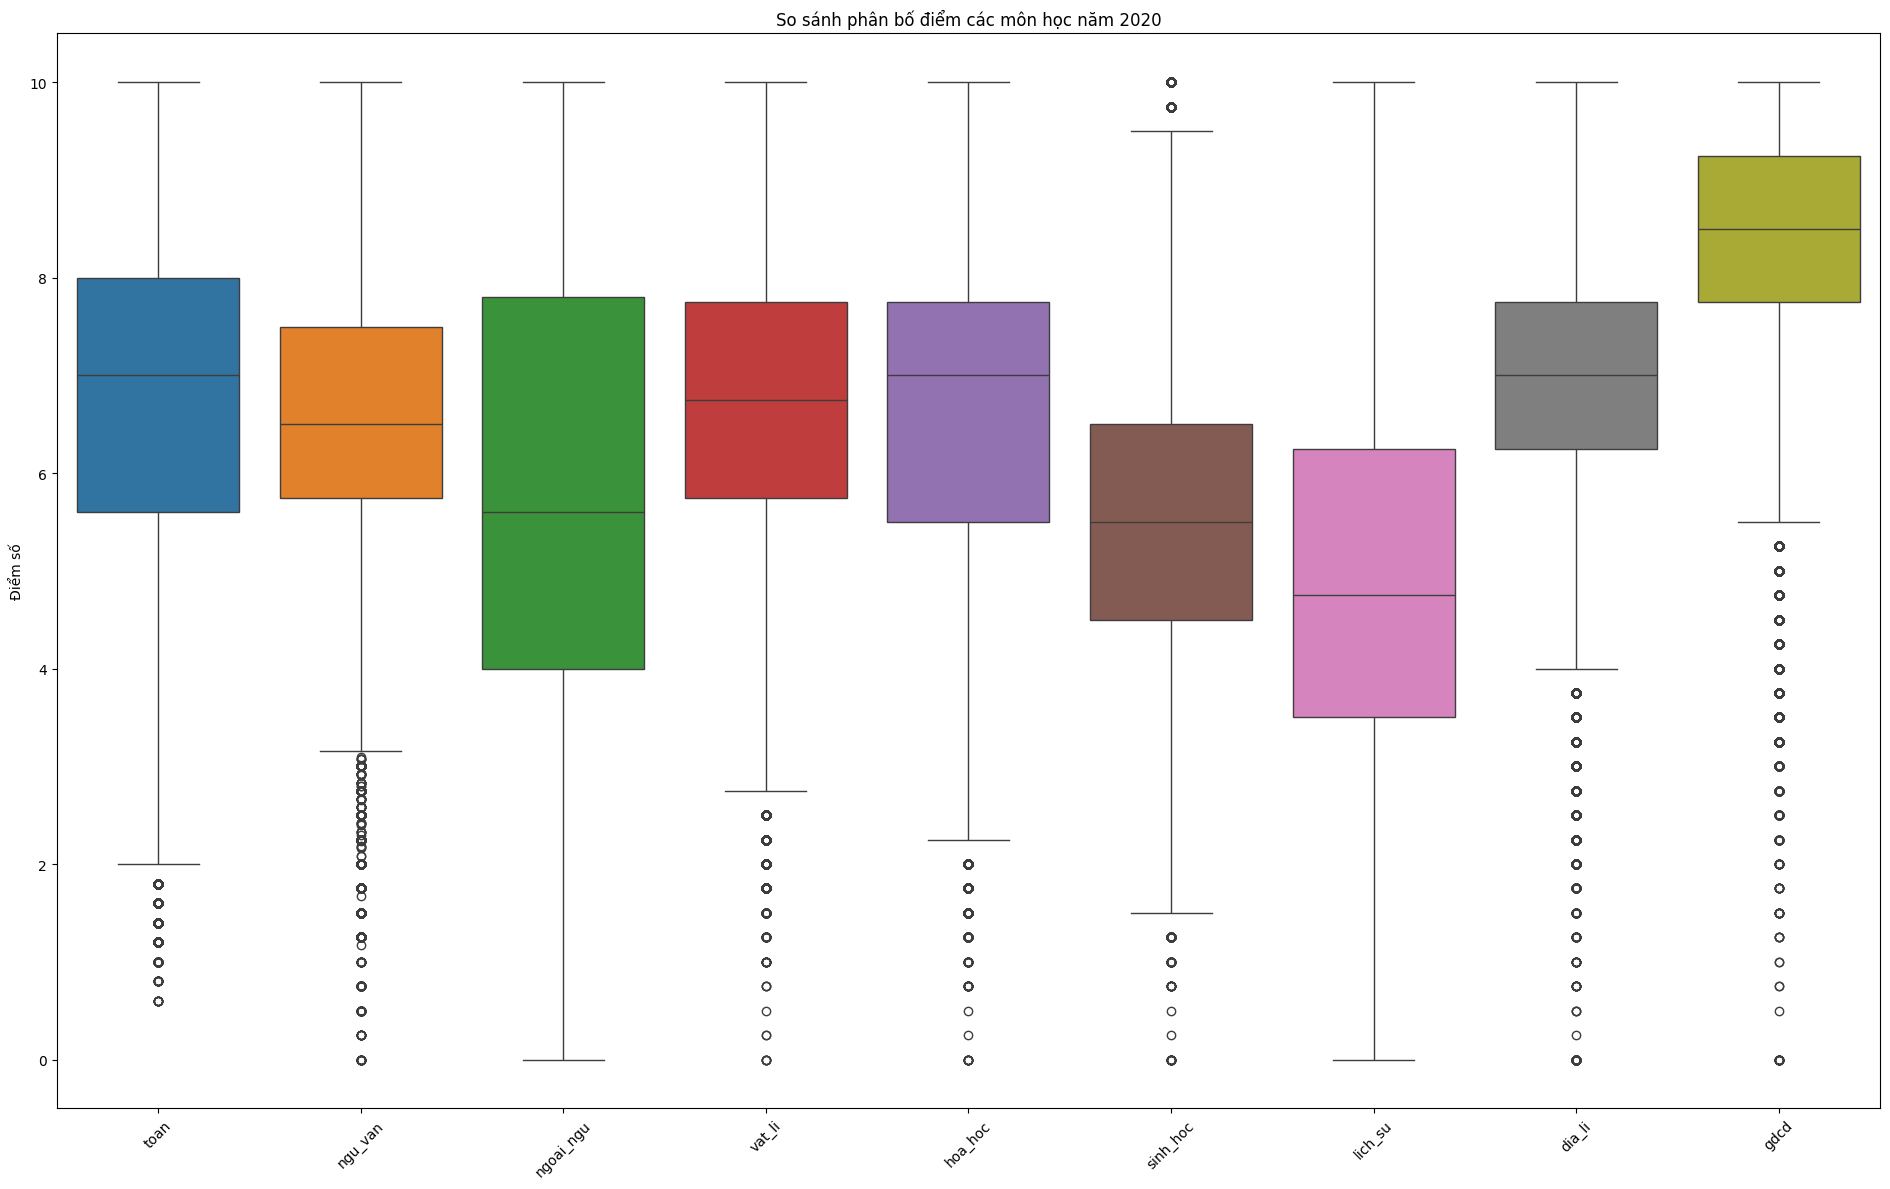

In [ ]:
data_subjects = data_21[subjects]

plt.figure(figsize=(19, 12))
sns.boxplot(data=data_subjects)
plt.title('So sánh phân bố điểm các môn học năm 2020')
plt.ylabel('Điểm số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

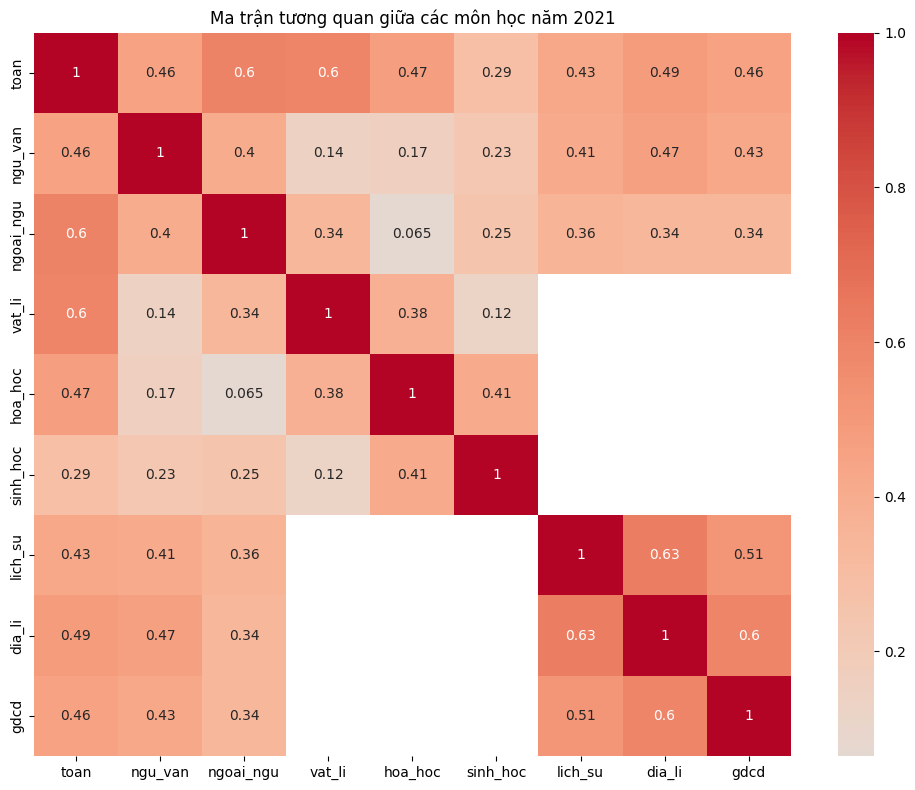

In [ ]:
# Ma trận tương quan
correlation_matrix = data_21[subjects].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các môn học năm 2021')
plt.tight_layout()
plt.show()

In [ ]:
# Tính điểm khối thi
data_21['Khối_A'] = data_21['toan'] + data_21['vat_li'] + data_21['hoa_hoc']
data_21['Khối_B'] = data_21['toan'] + data_21['hoa_hoc'] + data_21['sinh_hoc']
data_21['Khối_C'] = data_21['ngu_van'] + data_21['lich_su'] + data_21['dia_li']
data_21['Khối_D'] = data_21['toan'] + data_21['ngu_van'] + data_21['ngoai_ngu']
# Thống kê khối thi
print("=== THỐNG KÊ KHỐI THI ===")
for khoi in ['Khối_A', 'Khối_B', 'Khối_C', 'Khối_D']:
    valid_count = data_21[khoi].count()
    if valid_count > 0:
        print(f"{khoi}:")
        print(f"  Số thí sinh: {valid_count:,}")
        print(f"  Điểm trung bình: {data_21[khoi].mean():.2f}")
        print(f"  Điểm cao nhất: {data_21[khoi].max():.2f}")

=== THỐNG KÊ KHỐI THI ===
Khối_A:
  Số thí sinh: 324,791
  Điểm trung bình: 21.00
  Điểm cao nhất: 29.55
Khối_B:
  Số thí sinh: 322,740
  Điểm trung bình: 19.97
  Điểm cao nhất: 30.00
Khối_C:
  Số thí sinh: 588,736
  Điểm trung bình: 18.33
  Điểm cao nhất: 29.25
Khối_D:
  Số thí sinh: 812,704
  Điểm trung bình: 19.28
  Điểm cao nhất: 29.15


In [ ]:
# 1. Cấu hình các khối thi và môn tương ứng
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

# 2. Tính điểm trung bình và gộp với bản đồ riêng cho từng khối
score_maps = {}
for block, subject in blocks.items():
    temp = data_21.copy()
    temp['average score'] = temp[subject].mean(axis=1, skipna=True)
    avg_score_by_prov = temp.groupby('province')['average score'].mean().reset_index()

    # 💡 Sử dụng bản sao mới của vietnam_map để tránh ghi đè
    vietnam_map_copy = vietnam_map.copy()

    merged_map = vietnam_map_copy.merge(
        avg_score_by_prov,
        how='left',
        left_on='name',
        right_on='province',
        suffixes=('', '_dup')
    )

    if 'average score_dup' in merged_map.columns:
        merged_map.drop(columns=['average score_dup'], inplace=True)

    score_maps[block] = merged_map
    print(f"{block}: ", merged_map['average score'].describe())


A00:  count    62.000000
mean      6.166488
std       0.462215
min       4.831915
25%       5.915949
50%       6.238876
75%       6.517607
max       7.073571
Name: average score, dtype: float64
A01:  count    62.000000
mean      5.891201
std       0.545830
min       4.515816
25%       5.562419
50%       5.973203
75%       6.352492
max       6.880659
Name: average score, dtype: float64
B00:  count    62.000000
mean      6.066670
std       0.429907
min       4.798778
25%       5.805480
50%       6.095894
75%       6.430640
max       6.881649
Name: average score, dtype: float64
D01:  count    62.000000
mean      6.100787
std       0.463418
min       4.825537
25%       5.797496
50%       6.117598
75%       6.472311
max       6.938418
Name: average score, dtype: float64


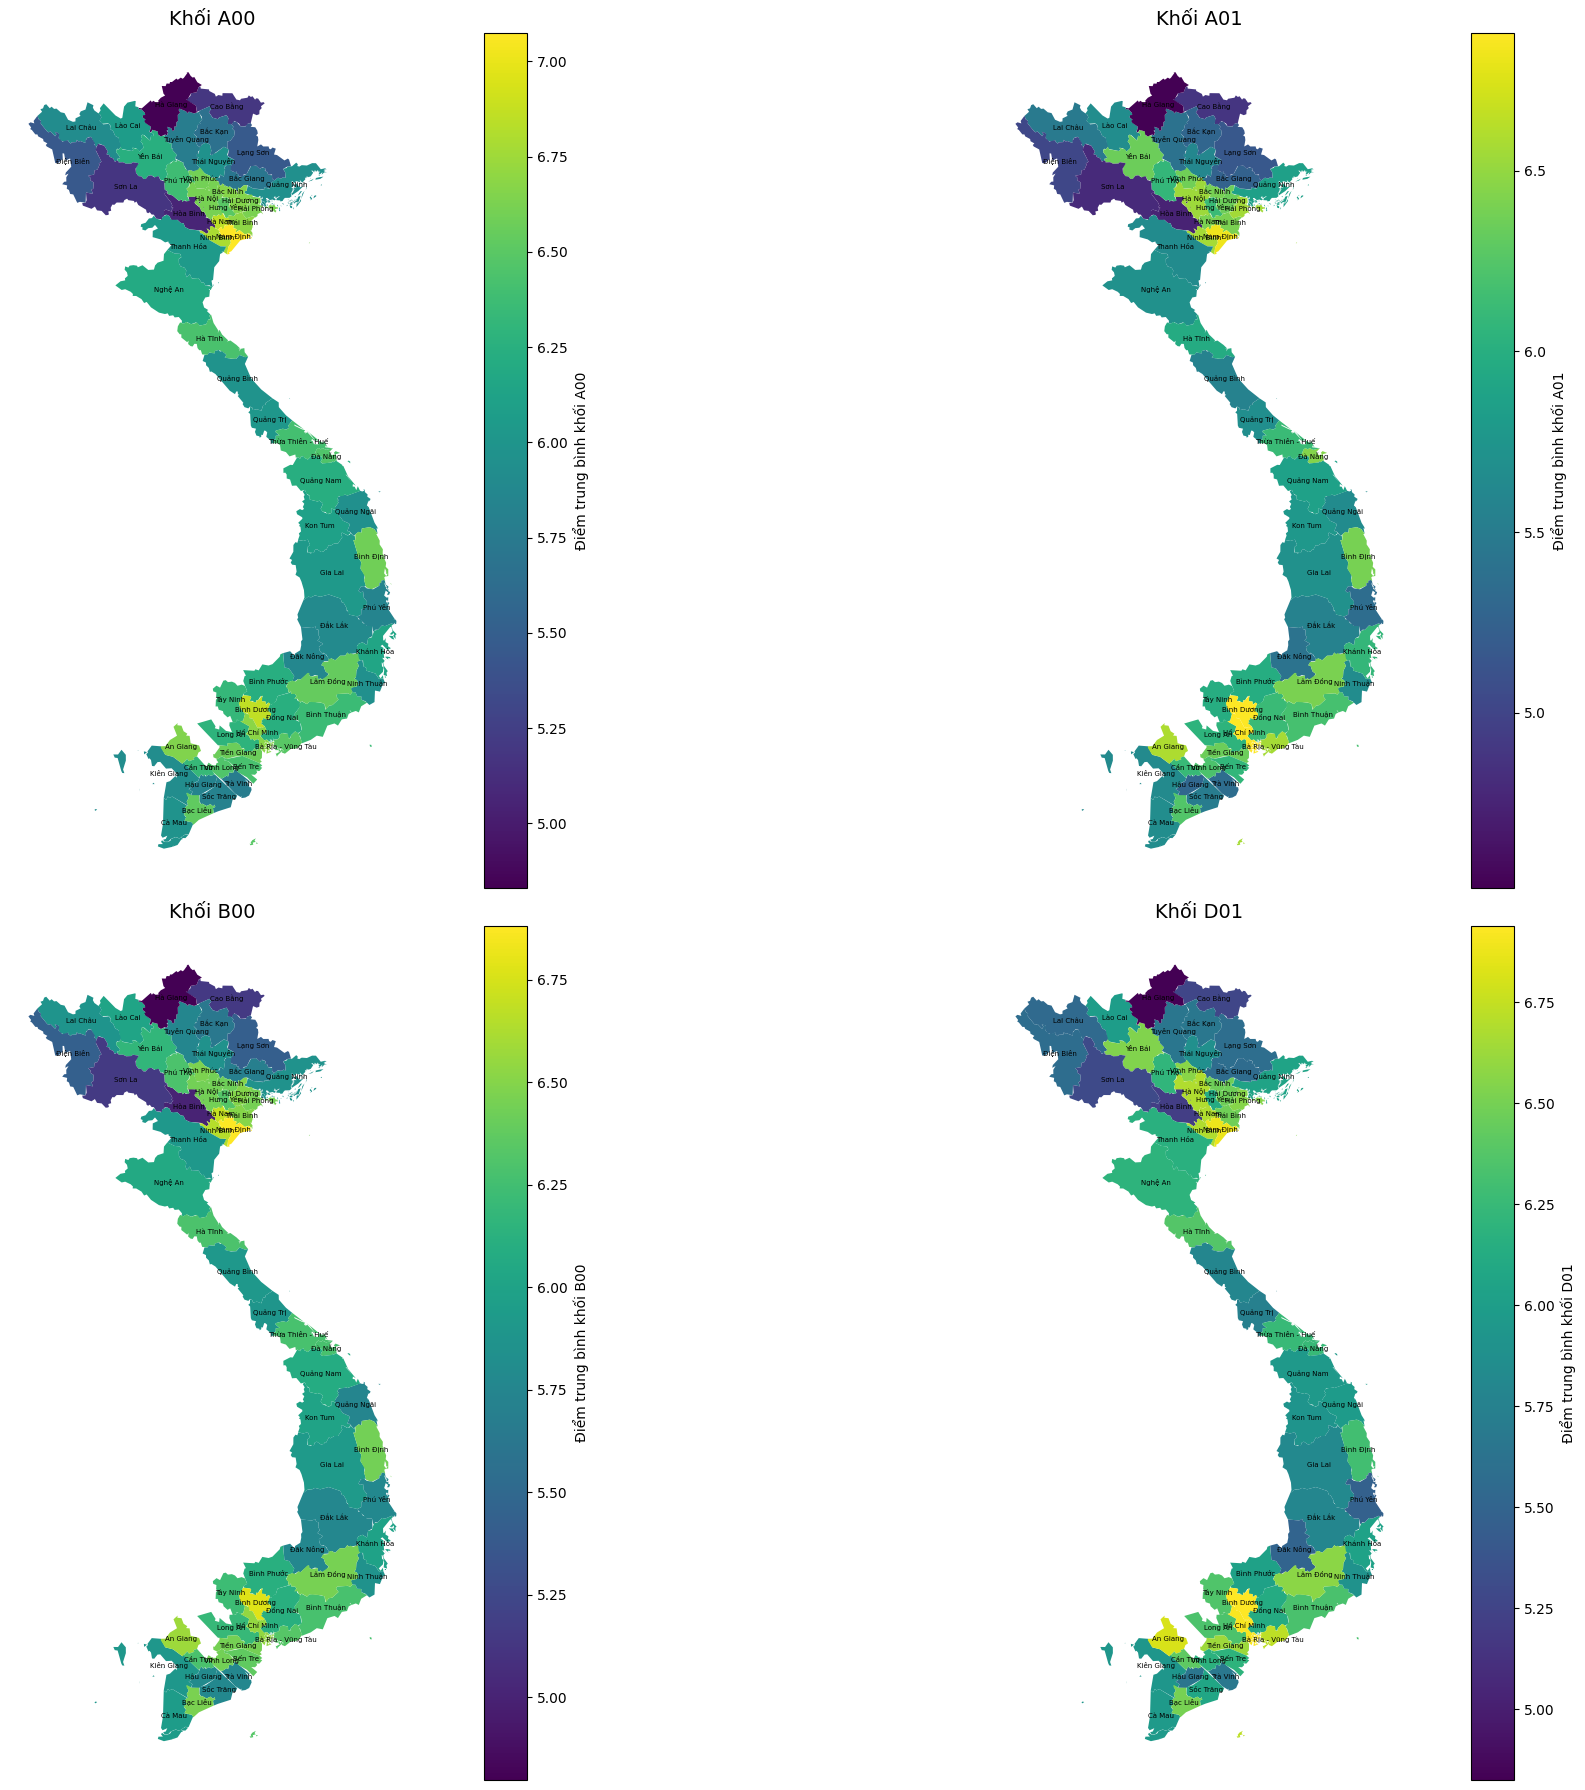

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # 2 hàng, 2 cột
axes = axes.flatten()  # Chuyển về 1D để dễ lặp

for i, block in enumerate(['A00', 'A01', 'B00', 'D01']):
    ax = axes[i]
    map_data = score_maps[block]

    map_data.plot(
        column='average score',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Điểm trung bình khối {block}", 'orientation': "vertical"}
    )

    # Ghi nhãn tên tỉnh
    for idx, row in map_data.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            centroid = row['geometry'].centroid
            ax.annotate(
                text=row['name'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=5, color='black'
            )

    ax.set_title(f"Khối {block}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


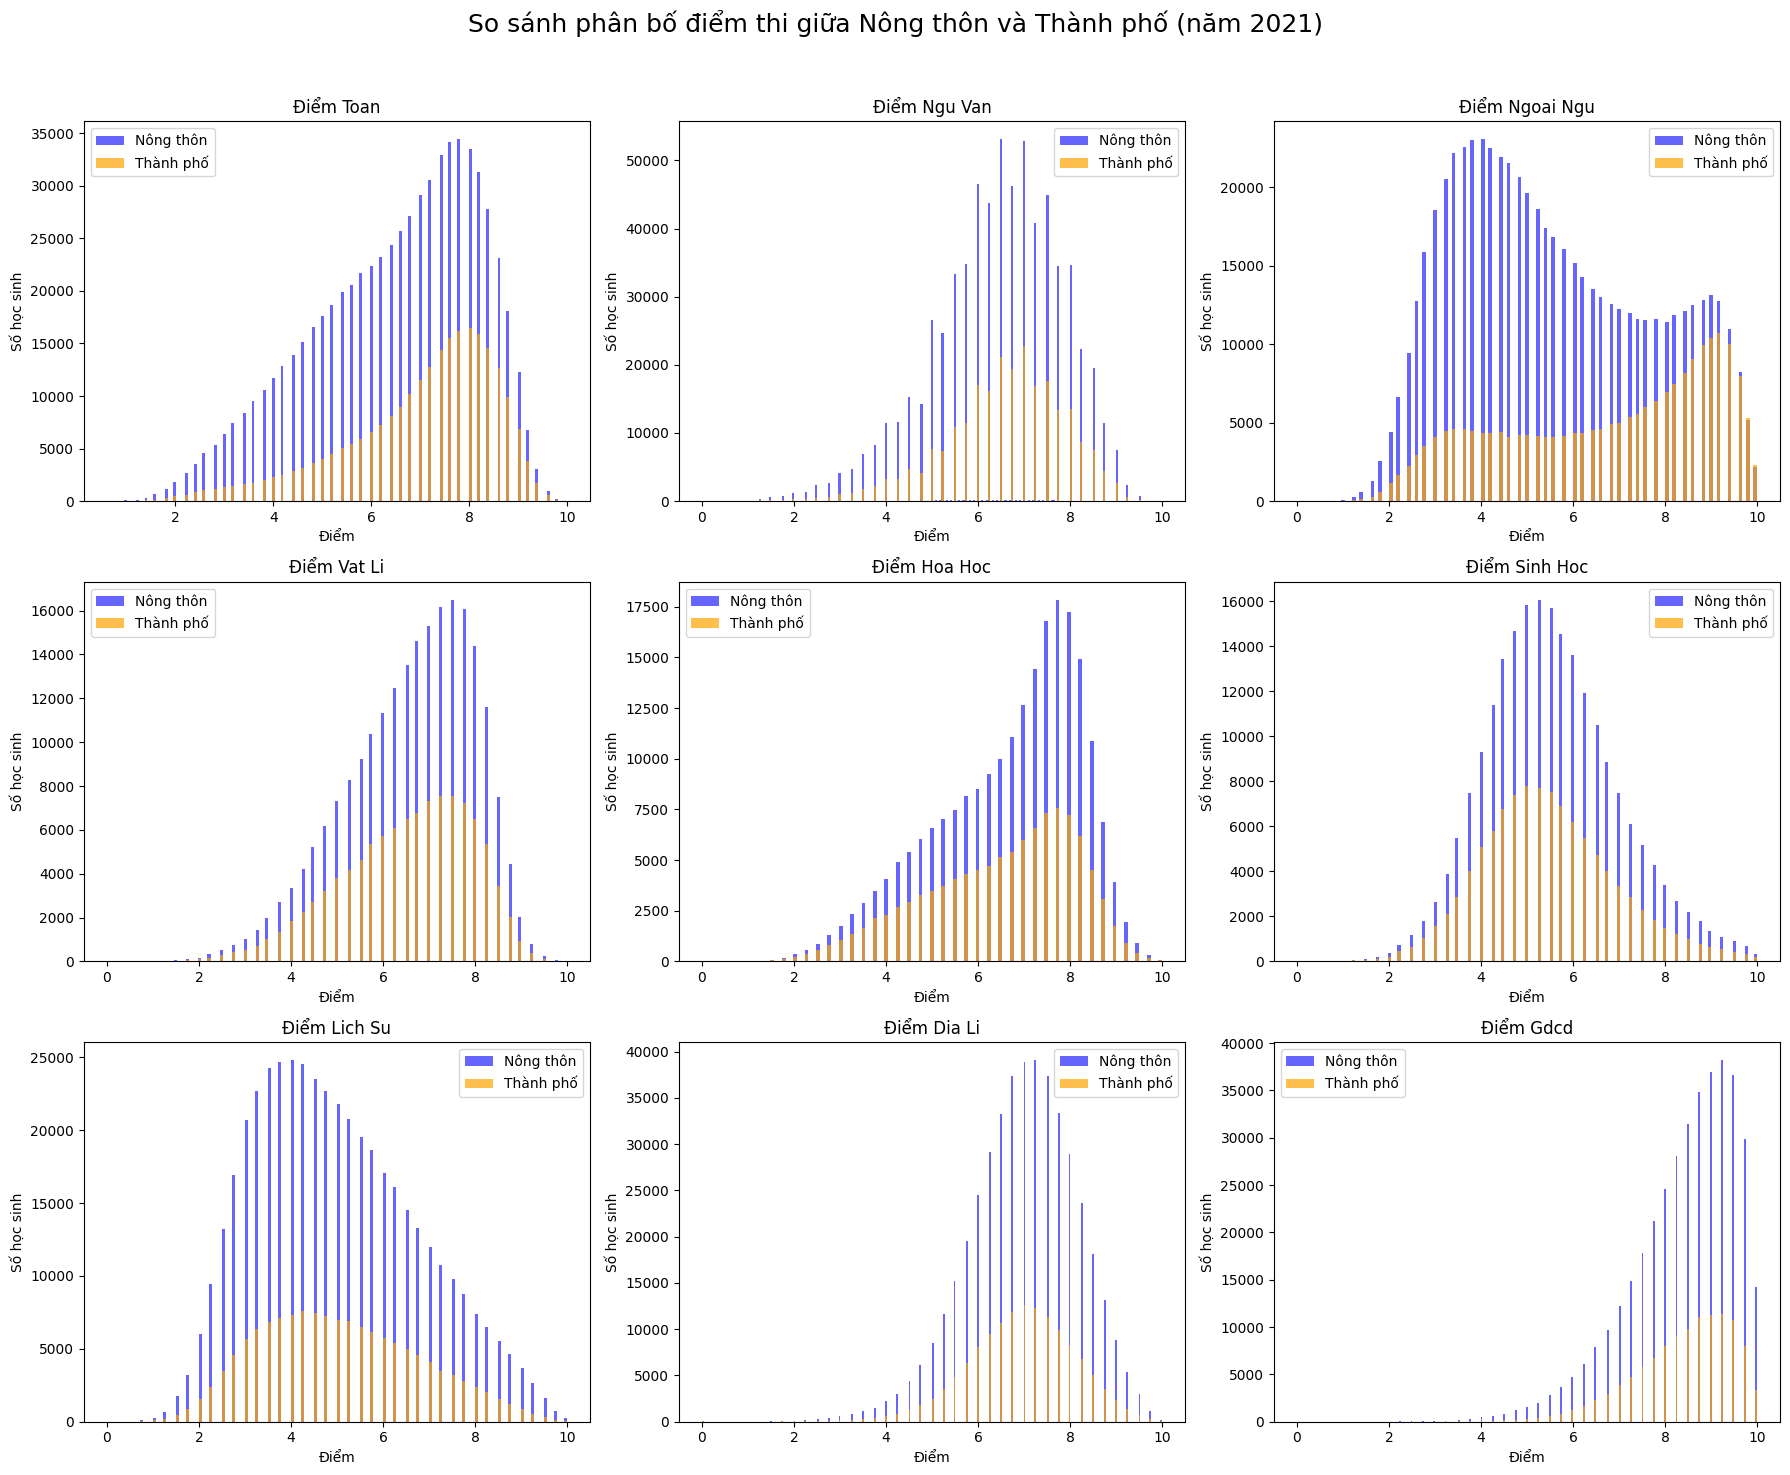

In [ ]:
# Phân nhóm tỉnh thành phố và nông thôn
df = data_21.copy()
cities = ['Hồ Chí Minh', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ', 'Bình Dương']
df_cities = df[df['province'].isin(cities)]
df_other_provinces = df[~df['province'].isin(cities)]

# Tạo 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Dữ liệu từng môn (loại bỏ NaN)
    city_scores = df_cities[subject].dropna()
    rural_scores = df_other_provinces[subject].dropna()

    # Dùng cùng bin cho 2 nhóm để dễ so sánh
    bins = 'auto'
    counts_rural, bins_rural, _ = ax.hist(rural_scores, bins=bins, color='blue', alpha=0.6, label='Nông thôn')
    ax.hist(city_scores, bins=bins_rural, color='orange', alpha=0.7, label='Thành phố')

    ax.set_title(f"Điểm {subject.replace('_', ' ').title()}")
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số học sinh')
    ax.legend()

plt.suptitle("So sánh phân bố điểm thi giữa Nông thôn và Thành phố (năm 2021)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chừa chỗ cho tiêu đề
plt.show()


/tmp/ipython-input-195-3814710736.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


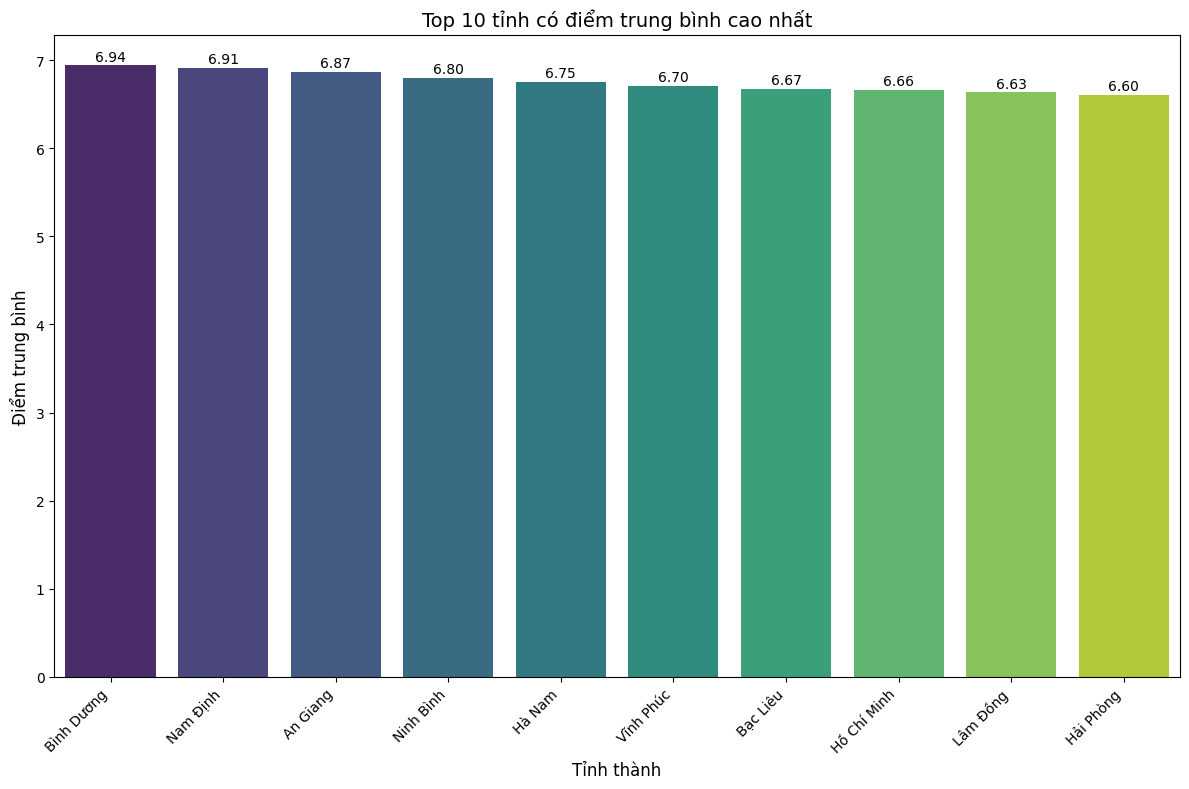

In [ ]:
# Tính điểm trung bình 6 môn
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
data = data_21.copy() #
data['avg_subjects'] = data[subjects].mean(axis=1, skipna=True)

# Trung bình theo tỉnh
province_avg = (
    data.groupby('province')['avg_subjects']
    .mean()
    .reset_index()
    .sort_values(by='avg_subjects', ascending=False)
)

# Lấy 10 tỉnh cao nhất
top10 = province_avg.head(10)

# Vẽ barplot dọc
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top10,
    x='province',
    y='avg_subjects',
    palette='viridis'
)

# Thêm điểm số lên đầu mỗi cột
for i, row in top10.iterrows():
    ax.text(
        x=top10.index.get_loc(i),
        y=row['avg_subjects'] + 0.02,  # để lệch lên trên 1 chút
        s=f"{row['avg_subjects']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xlabel("Tỉnh thành", fontsize=12)
plt.title("Top 10 tỉnh có điểm trung bình cao nhất", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
social_science_sample = data_21.dropna(subset=['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su'])

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']:
    social_science_sample[column] = social_science_sample[column].apply(classify_score)

# P(Ngu Van High | GDCD High)
p_van_high_given_gdcd_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High')]) / len(social_science_sample[social_science_sample['gdcd'] == 'High'])

# P(GDCD High | Ngu Van High)
p_gdcd_high_given_van_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[social_science_sample['ngu_van'] == 'High'])

# P(GDCD High | Ngu Van High, Ngoai Ngu High)
p_gdcd_high_given_van_ngoai_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# P(Ngoai Ngu High | GDCD High, Ngu Van High)
p_ngoai_ngu_high_given_gdcd_van_high = len(social_science_sample[(social_science_sample['ngoai_ngu'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')])

# P(Ngu Van High | GDCD High, Ngoai Ngu High)
p_van_high_given_gdcd_ngoai_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Ngu Van High | GDCD High)': p_van_high_given_gdcd_high,
    'P(GDCD High | Ngu Van High)': p_gdcd_high_given_van_high,
    'P(GDCD High | Ngu Van High, Ngoai Ngu High)': p_gdcd_high_given_van_ngoai_high,
    'P(Ngoai Ngu High | GDCD High, Ngu Van High)': p_ngoai_ngu_high_given_gdcd_van_high,
    'P(Ngu Van High | GDCD High, Ngoai Ngu High)': p_van_high_given_gdcd_ngoai_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.166228                     0.827953   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.842835   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.509529   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.415073  


P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.166228                     0.827953   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.842835   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.509529   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.415073

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
natural_science_sample = data_21.dropna(subset=['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']) #

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']:
    natural_science_sample[column] = natural_science_sample[column].apply(classify_score)

# P(Toan High | Hoa Hoc High)
p_toan_high_given_hoahoc_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[natural_science_sample['hoa_hoc'] == 'High'])

# P(Toan High | Vat Li High)
p_toan_high_given_vatli_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[natural_science_sample['vat_li'] == 'High'])

# P(Toan High | Vat Li High, Hoa Hoc High)
p_toan_high_given_li_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# P(Sinh Hoc High | Hoa Hoc High, Vat Li High)
p_sinh_high_given_hoa_li_high = len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[(natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')])

# P(Toan Hoc High | Sinh Hoc High, Hoa Hoc High)
p_toan_high_given_sinh_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Toan High | Hoa Hoc High)': p_toan_high_given_hoahoc_high,
    'P(Toan High | Vat Li High)': p_toan_high_given_vatli_high,
    'P(Toan Hoc High | Vat Li High, Hoa Hoc High)': p_toan_high_given_li_hoa_high,
    'P(Sinh High | Vat Li High, Hoa Hoc High)': p_sinh_high_given_hoa_li_high,
    'P(Toan High | Sinh Hoc High, Hoa Hoc High)': p_toan_high_given_sinh_hoa_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                       0.7654                    0.864407   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.922313   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.047963   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                     0.87966  


P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                       0.7654                    0.864407   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.922313   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.047963   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                     0.87966

###Năm 2022###

In [ ]:
data_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995441 entries, 0 to 995440
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        995441 non-null  object 
 1   toan       982726 non-null  float64
 2   ngu_van    981407 non-null  float64
 3   ngoai_ngu  870609 non-null  float64
 4   vat_li     325523 non-null  float64
 5   hoa_hoc    327367 non-null  float64
 6   sinh_hoc   322198 non-null  float64
 7   lich_su    659662 non-null  float64
 8   dia_li     657421 non-null  float64
 9   gdcd       554343 non-null  float64
 10  province   995441 non-null  object 
dtypes: float64(9), object(2)
memory usage: 83.5+ MB


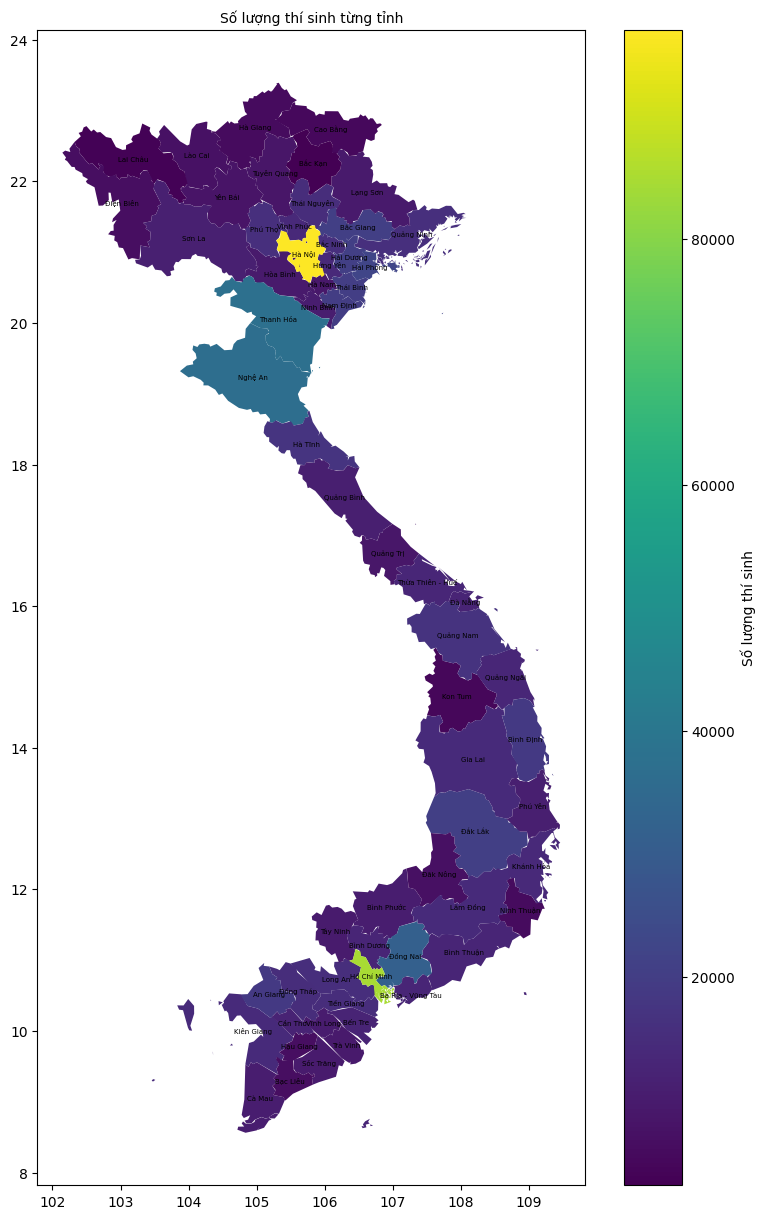

In [ ]:
# Đếm số lượng thí sinh theo từng tỉnh từ dữ liệu điểm năm 2020
province_counts = data_22['province'].value_counts().reset_index()
province_counts.columns = ['province', 'number of students']  # Đặt lại tên cột

# Đọc file bản đồ Việt Nam (GeoJSON)
vietnam_map = gpd.read_file('/content/drive/MyDrive/Phân tích dữ liệu/BTL/vietnam.geojson')

# Gộp dữ liệu bản đồ với số lượng thí sinh theo tỉnh
vietnam_map = vietnam_map.merge(province_counts, left_on='name', right_on='province')

# Khởi tạo biểu đồ kích thước lớn hơn
fig, ax = plt.subplots(1, figsize=(10,15))

# Vẽ bản đồ với cột 'number of students' được biểu diễn bằng màu sắc
vietnam_map.plot(
    column='number of students',     # Cột dùng để tô màu
    ax=ax,                           # Trục vẽ
    legend=True,                     # Hiển thị chú giải (colorbar)
    cmap='viridis',                  # Bảng màu Viridis (vàng → tím)
    legend_kwds={
        'label': "Số lượng thí sinh",         # Nhãn của colorbar
        'orientation': "vertical"             # Chiều dọc
    }
)

# Ghi nhãn tên tỉnh vào giữa mỗi khu vực
for idx, row in vietnam_map.iterrows():
    ax.annotate(
        text=row['name'],                           # Tên tỉnh
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # Tọa độ trọng tâm tỉnh
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=5, color='black'                   # Font chữ nhỏ, màu đen
    )

plt.title('Số lượng thí sinh từng tỉnh', fontsize=10)

plt.show()


In [ ]:
data_22.describe()

toan        ngu_van      ngoai_ngu         vat_li  \
count  982726.000000  981407.000000  870609.000000  325523.000000   
mean        6.466254       6.507746       5.157686       6.723779   
std         1.675435       1.379602       1.949547       1.441925   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.400000       5.580000       3.600000       5.750000   
50%         6.800000       6.500000       4.800000       7.000000   
75%         7.800000       7.500000       6.600000       7.750000   
max        10.000000      10.000000      10.000000      10.000000   

             hoa_hoc       sinh_hoc        lich_su         dia_li  \
count  327367.000000  322198.000000  659662.000000  657421.000000   
mean        6.703898       5.019109       6.343930       6.677929   
std         1.600393       1.448270       1.612879       1.215013   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.500000       4.000000       5.250000       5.750000   
50%         7.000000       4.750000       6.500000       6.750000   
75%         8.000000       6.000000       7.500000       7.500000   
max        10.000000      10.000000      10.000000      10.000000   

                gdcd  
count  554343.000000  
mean        8.033266  
std         1.067272  
min         0.000000  
25%         7.500000  
50%         8.250000  
75%         8.750000  
max        10.000000

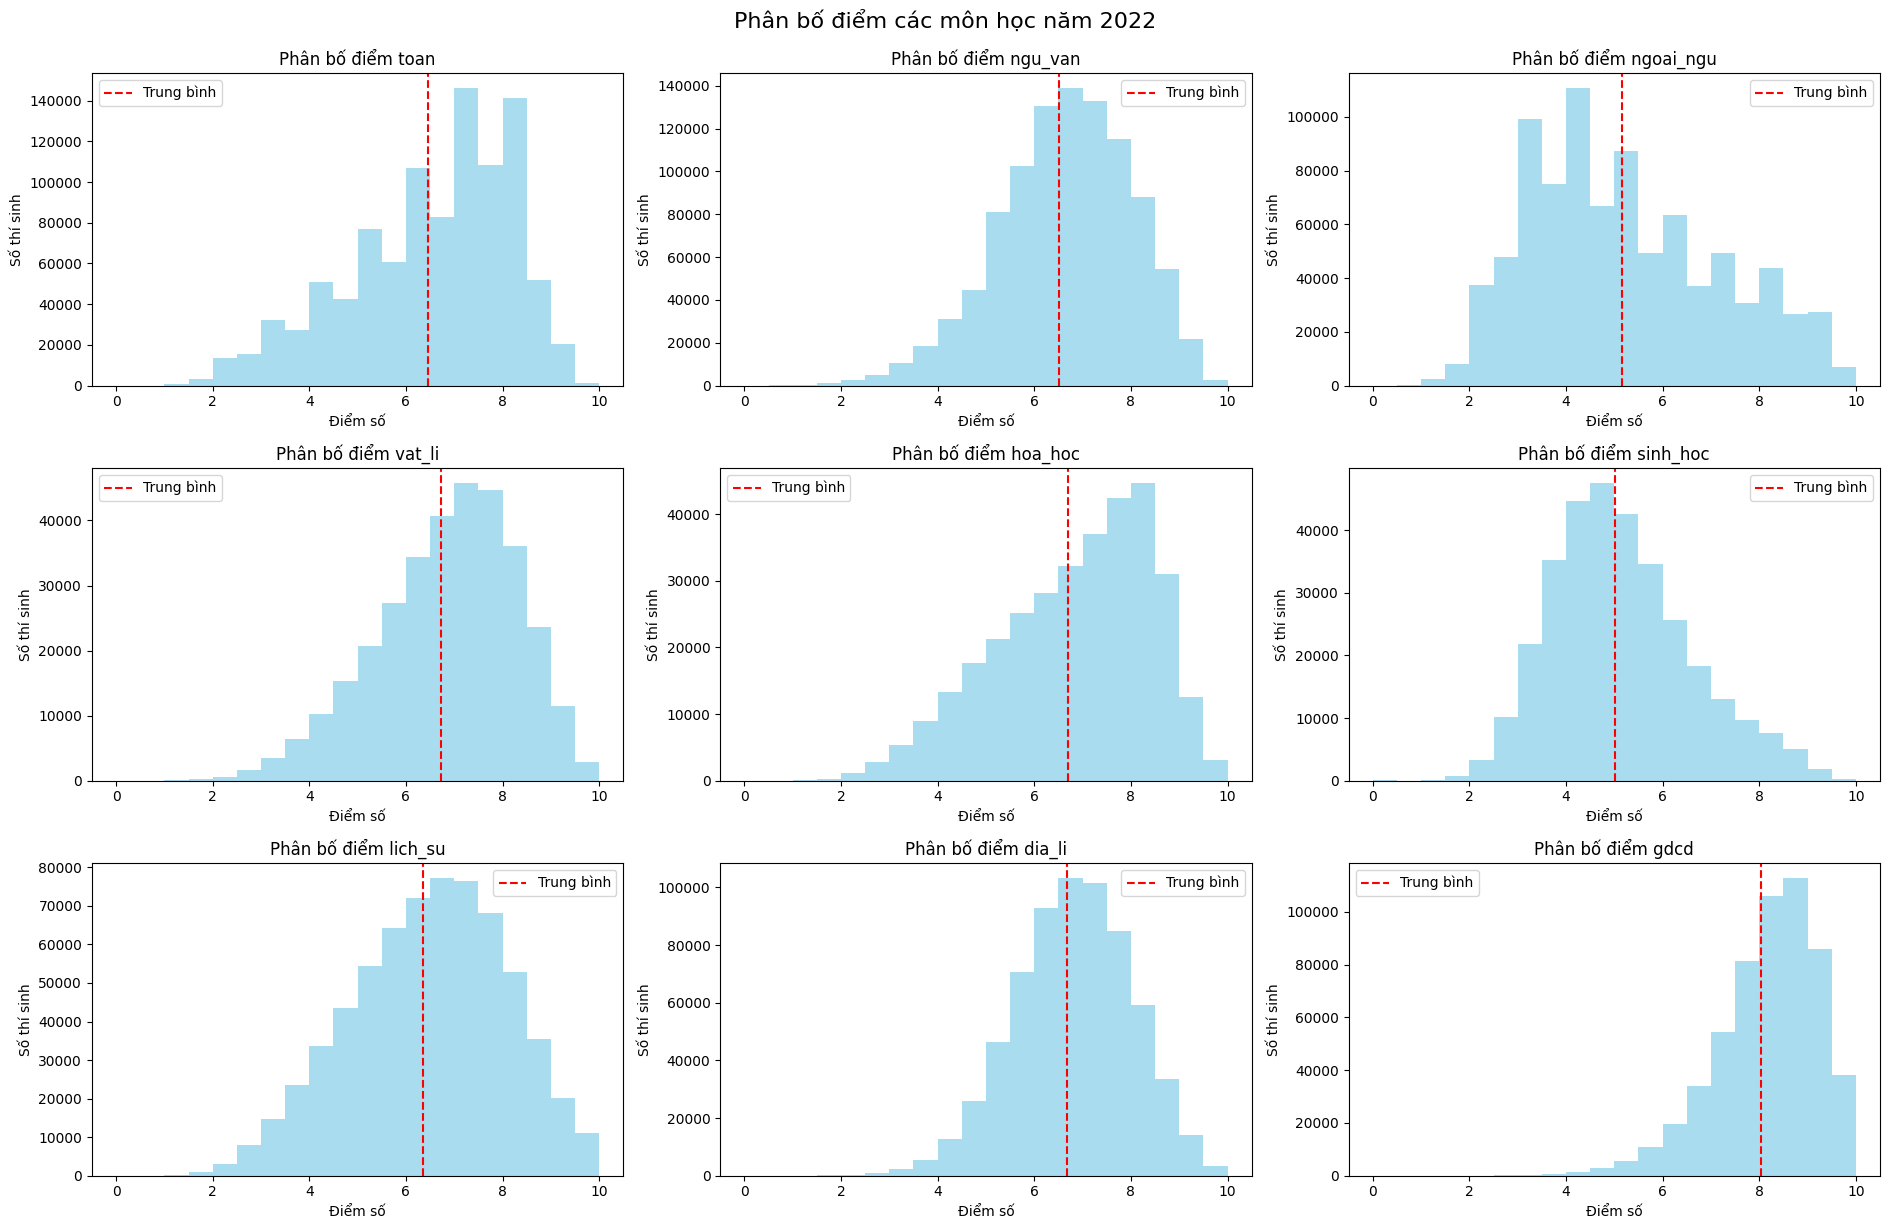

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 12))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    if subject in data_22.columns:
        axes[i].hist(data_22[subject].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Phân bố điểm {subject}')
        axes[i].set_xlabel('Điểm số')
        axes[i].set_ylabel('Số thí sinh')
        axes[i].axvline(data_22[subject].mean(), color='red', linestyle='--', label='Trung bình')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học năm 2022', fontsize=16, y=1.02)
plt.show()

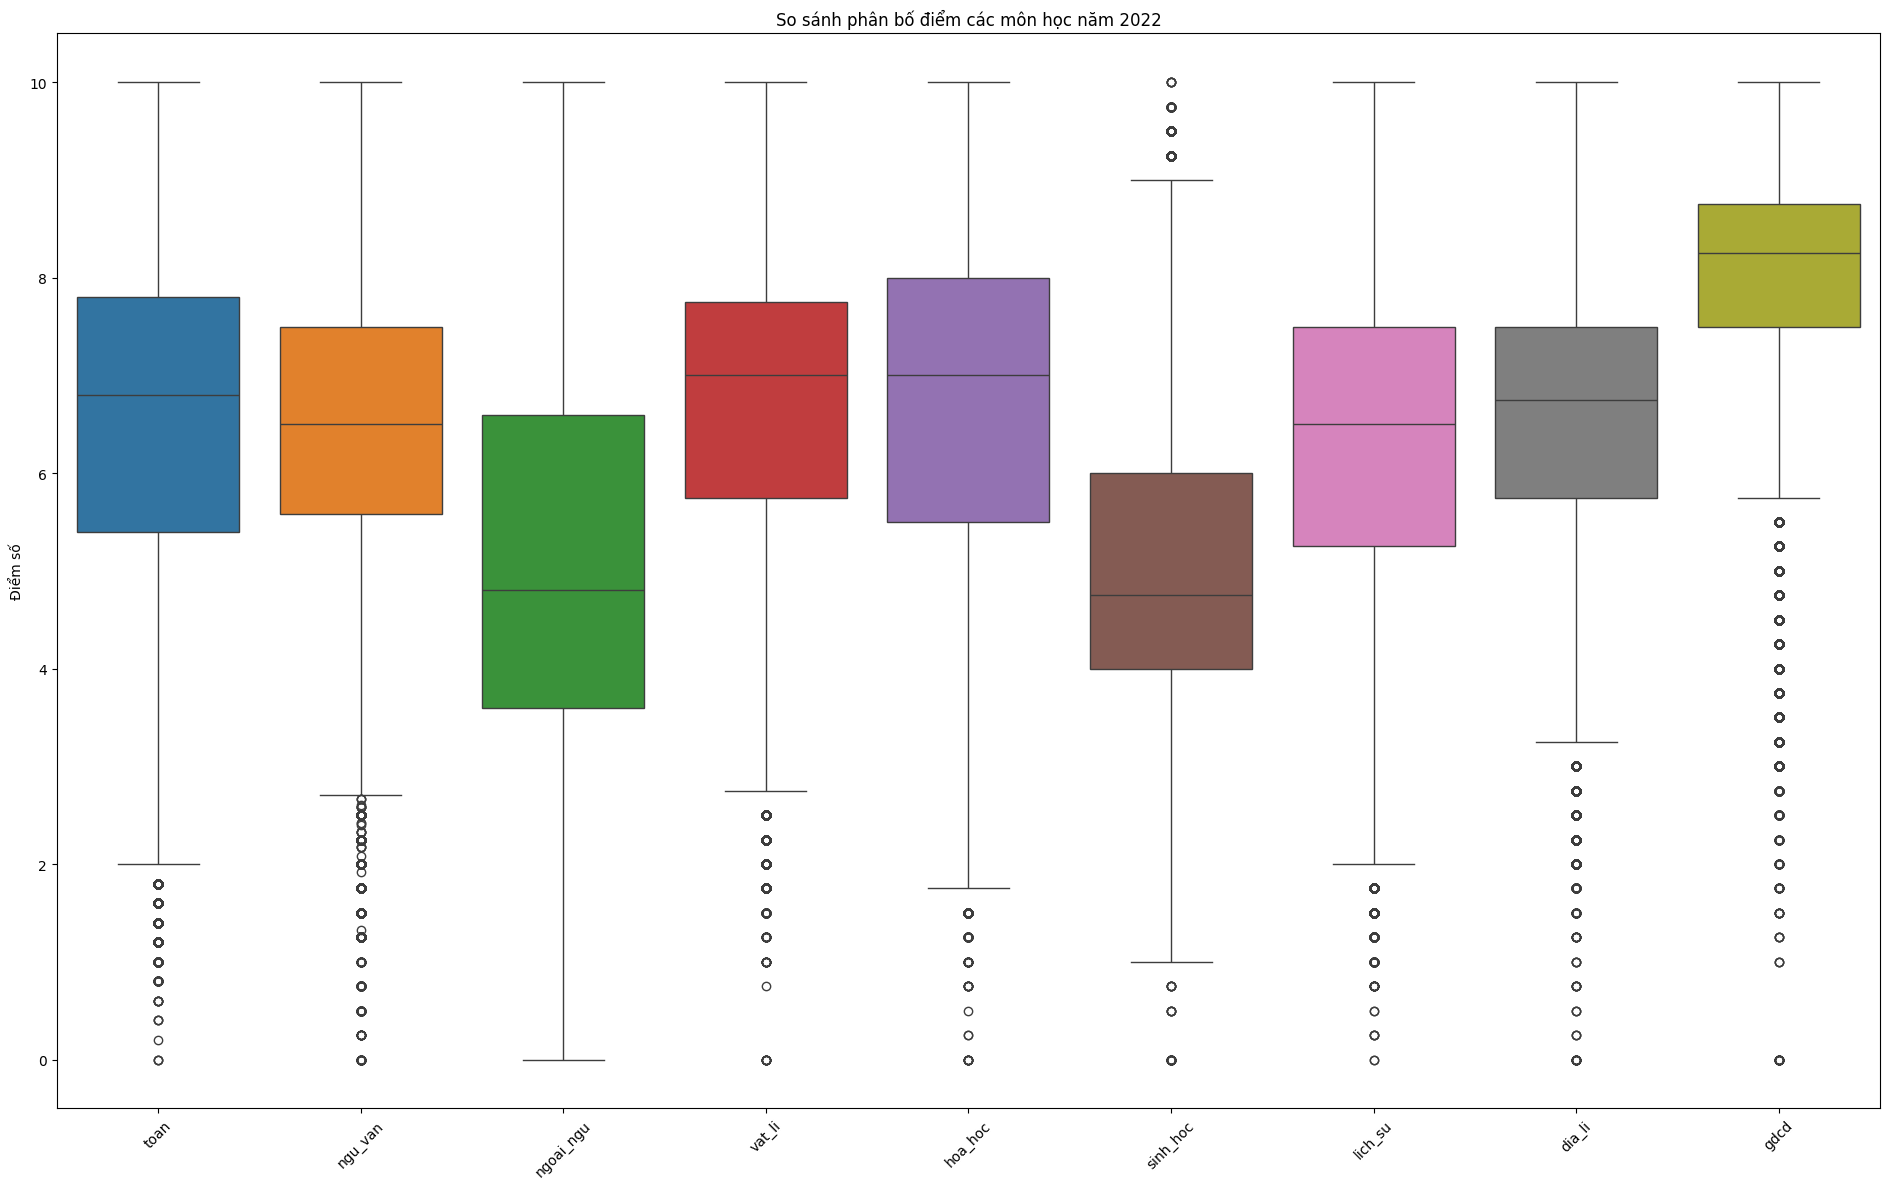

In [ ]:
data_subjects = data_22[subjects]

plt.figure(figsize=(19, 12))
sns.boxplot(data=data_subjects)
plt.title('So sánh phân bố điểm các môn học năm 2022')
plt.ylabel('Điểm số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

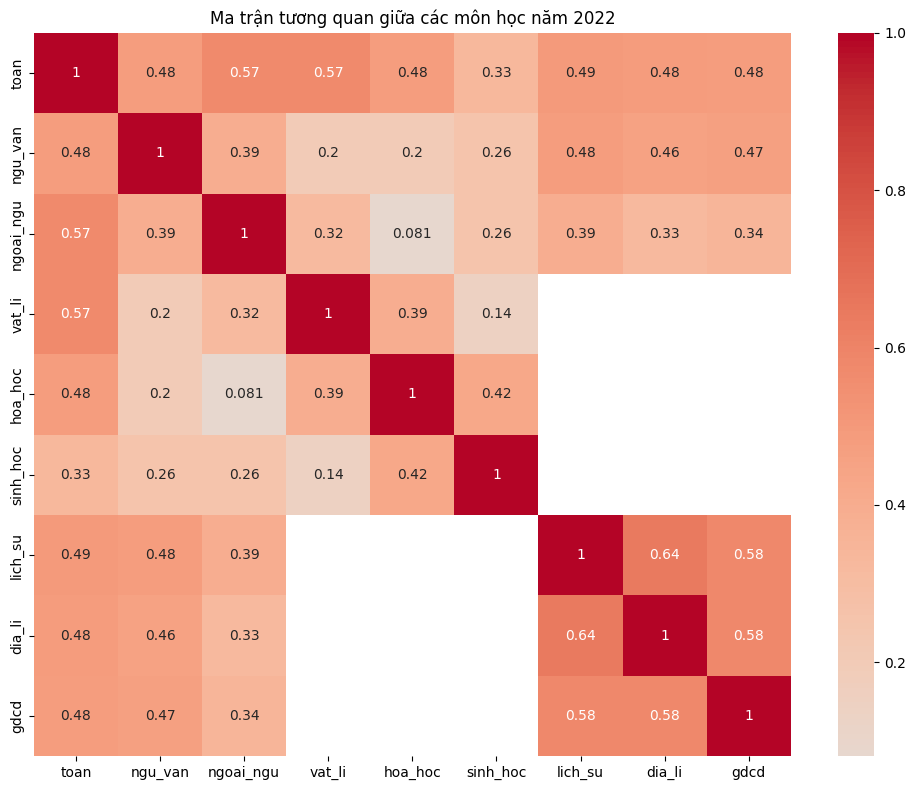

In [ ]:
# Ma trận tương quan
correlation_matrix = data_22[subjects].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các môn học năm 2022')
plt.tight_layout()
plt.show()

In [ ]:
# Tính điểm khối thi
data_22['Khối_A'] = data_22['toan'] + data_22['vat_li'] + data_22['hoa_hoc']
data_22['Khối_B'] = data_22['toan'] + data_22['hoa_hoc'] + data_22['sinh_hoc']
data_22['Khối_C'] = data_22['ngu_van'] + data_22['lich_su'] + data_22['dia_li']
data_22['Khối_D'] = data_22['toan'] + data_22['ngu_van'] + data_22['ngoai_ngu']
# Thống kê khối thi
print("=== THỐNG KÊ KHỐI THI ===")
for khoi in ['Khối_A', 'Khối_B', 'Khối_C', 'Khối_D']:
    valid_count = data_22[khoi].count()
    if valid_count > 0:
        print(f"{khoi}:")
        print(f"  Số thí sinh: {valid_count:,}")
        print(f"  Điểm trung bình: {data_22[khoi].mean():.2f}")
        print(f"  Điểm cao nhất: {data_22[khoi].max():.2f}")

=== THỐNG KÊ KHỐI THI ===
Khối_A:
  Số thí sinh: 323,673
  Điểm trung bình: 21.10
  Điểm cao nhất: 30.00
Khối_B:
  Số thí sinh: 322,124
  Điểm trung bình: 19.40
  Điểm cao nhất: 29.35
Khối_C:
  Số thí sinh: 656,942
  Điểm trung bình: 19.45
  Điểm cao nhất: 29.75
Khối_D:
  Số thí sinh: 866,730
  Điểm trung bình: 18.44
  Điểm cao nhất: 28.90


In [ ]:
# 1. Cấu hình các khối thi và môn tương ứng
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

# 2. Tính điểm trung bình và gộp với bản đồ riêng cho từng khối
score_maps = {}
for block, subject in blocks.items():
    temp = data_22.copy()
    temp['average score'] = temp[subject].mean(axis=1, skipna=True)
    avg_score_by_prov = temp.groupby('province')['average score'].mean().reset_index()

    # 💡 Sử dụng bản sao mới của vietnam_map để tránh ghi đè
    vietnam_map_copy = vietnam_map.copy()

    merged_map = vietnam_map_copy.merge(
        avg_score_by_prov,
        how='left',
        left_on='name',
        right_on='province',
        suffixes=('', '_dup')
    )

    if 'average score_dup' in merged_map.columns:
        merged_map.drop(columns=['average score_dup'], inplace=True)

    score_maps[block] = merged_map
    print(f"{block}: ", merged_map['average score'].describe())


A00:  count    63.000000
mean      6.104128
std       0.482815
min       4.640225
25%       5.785534
50%       6.162182
75%       6.418243
max       7.159816
Name: average score, dtype: float64
A01:  count    63.000000
mean      5.599195
std       0.507581
min       4.237205
25%       5.279234
50%       5.686214
75%       5.939558
max       6.658270
Name: average score, dtype: float64
B00:  count    63.000000
mean      5.942106
std       0.432366
min       4.597436
25%       5.686581
50%       5.954002
75%       6.243761
max       6.875419
Name: average score, dtype: float64
D01:  count    63.000000
mean      5.879011
std       0.472012
min       4.613045
25%       5.572113
50%       5.849799
75%       6.204389
max       6.824164
Name: average score, dtype: float64


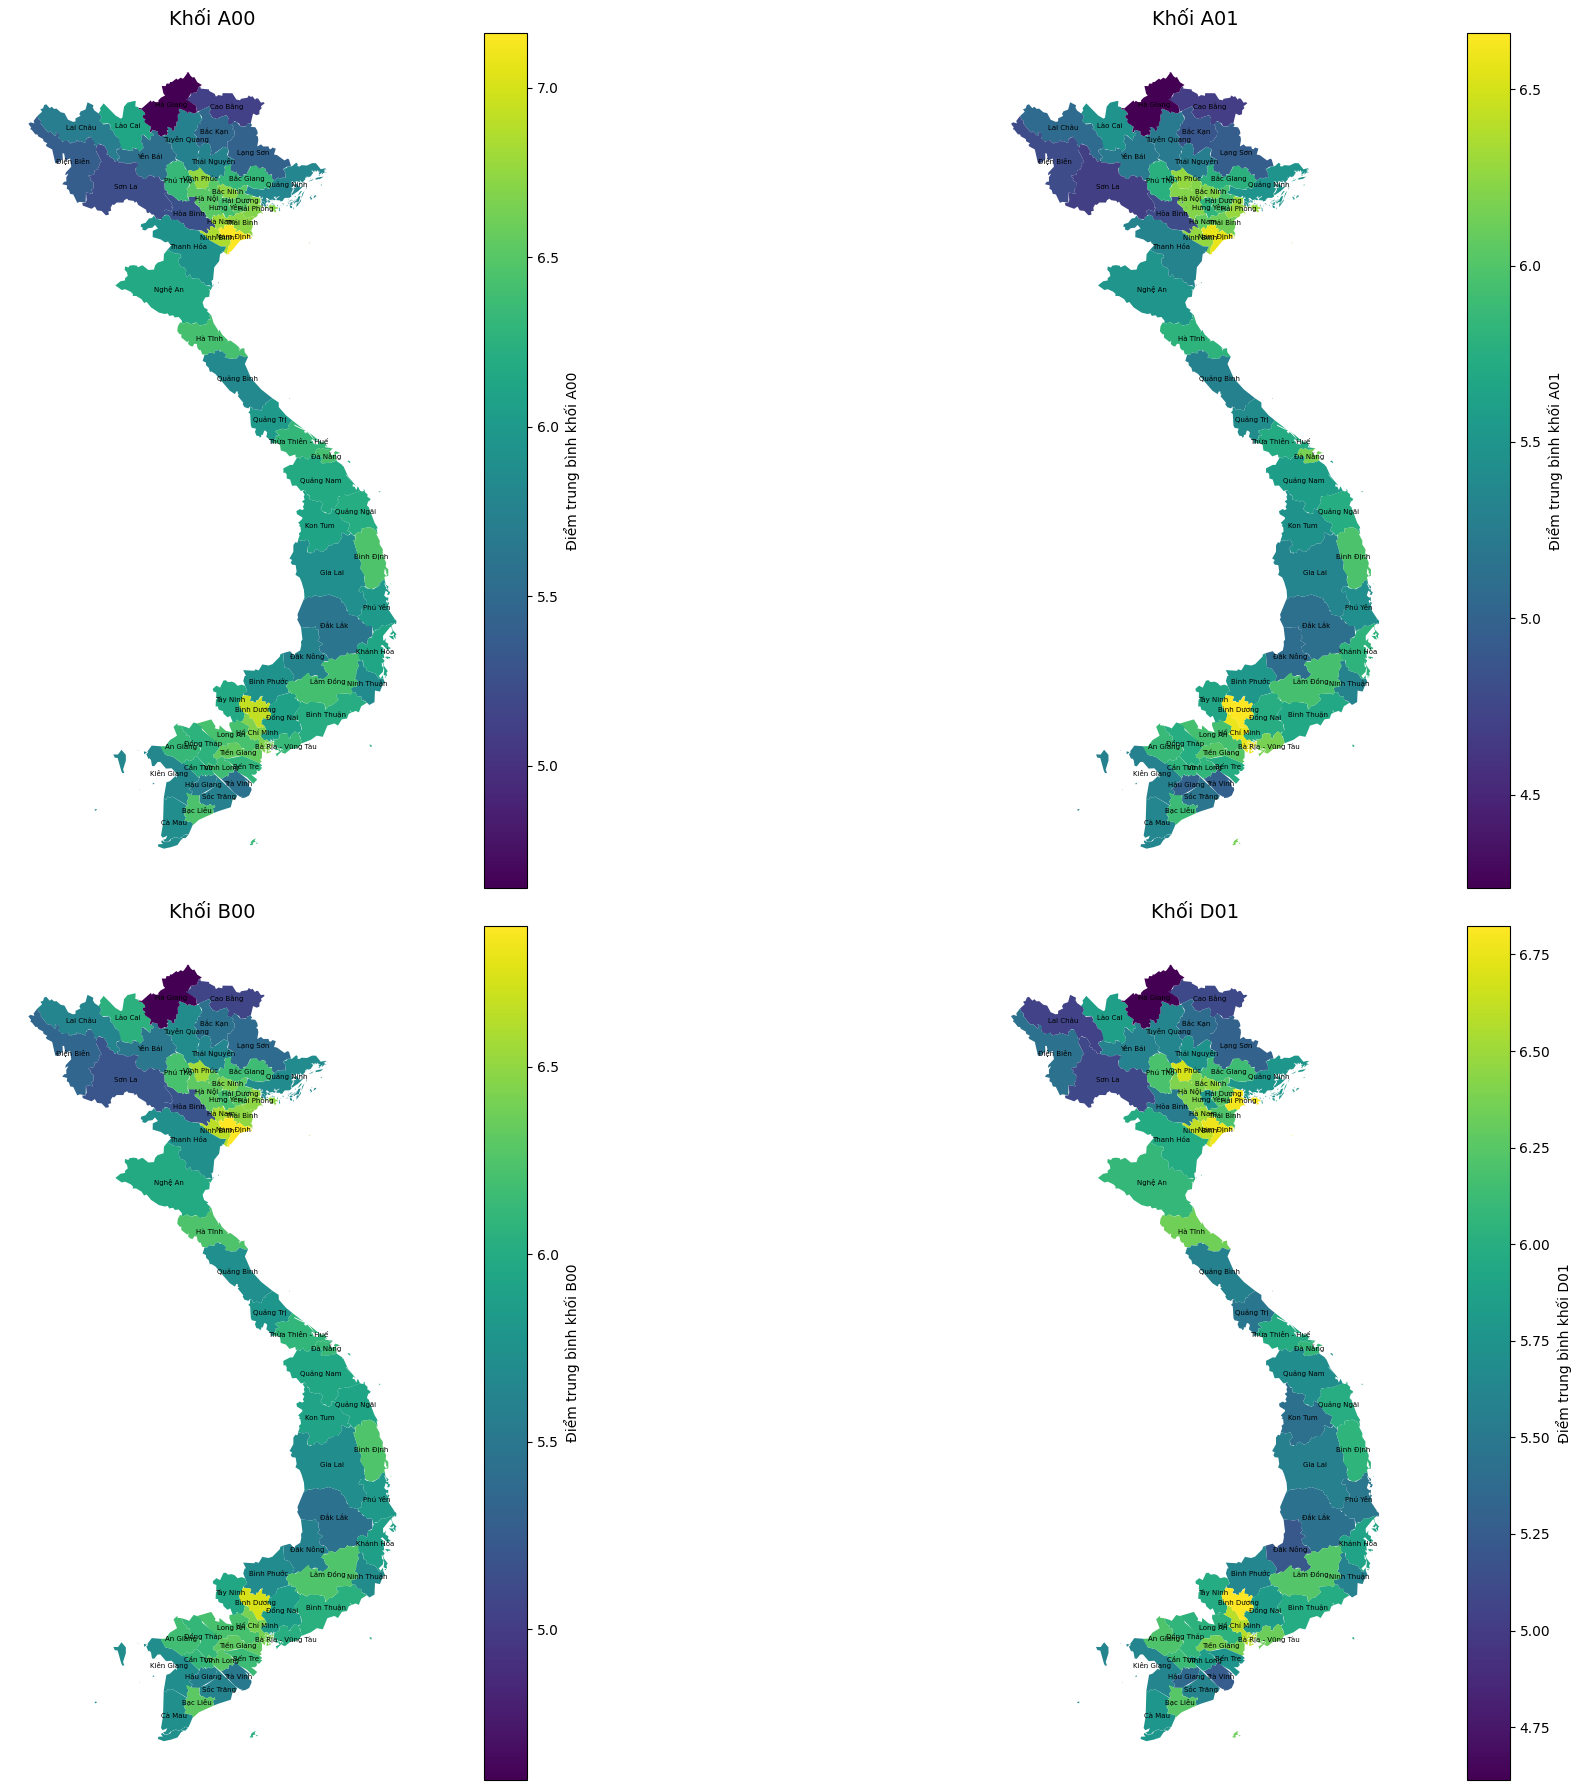

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # 2 hàng, 2 cột
axes = axes.flatten()  # Chuyển về 1D để dễ lặp

for i, block in enumerate(['A00', 'A01', 'B00', 'D01']):
    ax = axes[i]
    map_data = score_maps[block]

    map_data.plot(
        column='average score',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Điểm trung bình khối {block}", 'orientation': "vertical"}
    )

    # Ghi nhãn tên tỉnh
    for idx, row in map_data.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            centroid = row['geometry'].centroid
            ax.annotate(
                text=row['name'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=5, color='black'
            )

    ax.set_title(f"Khối {block}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


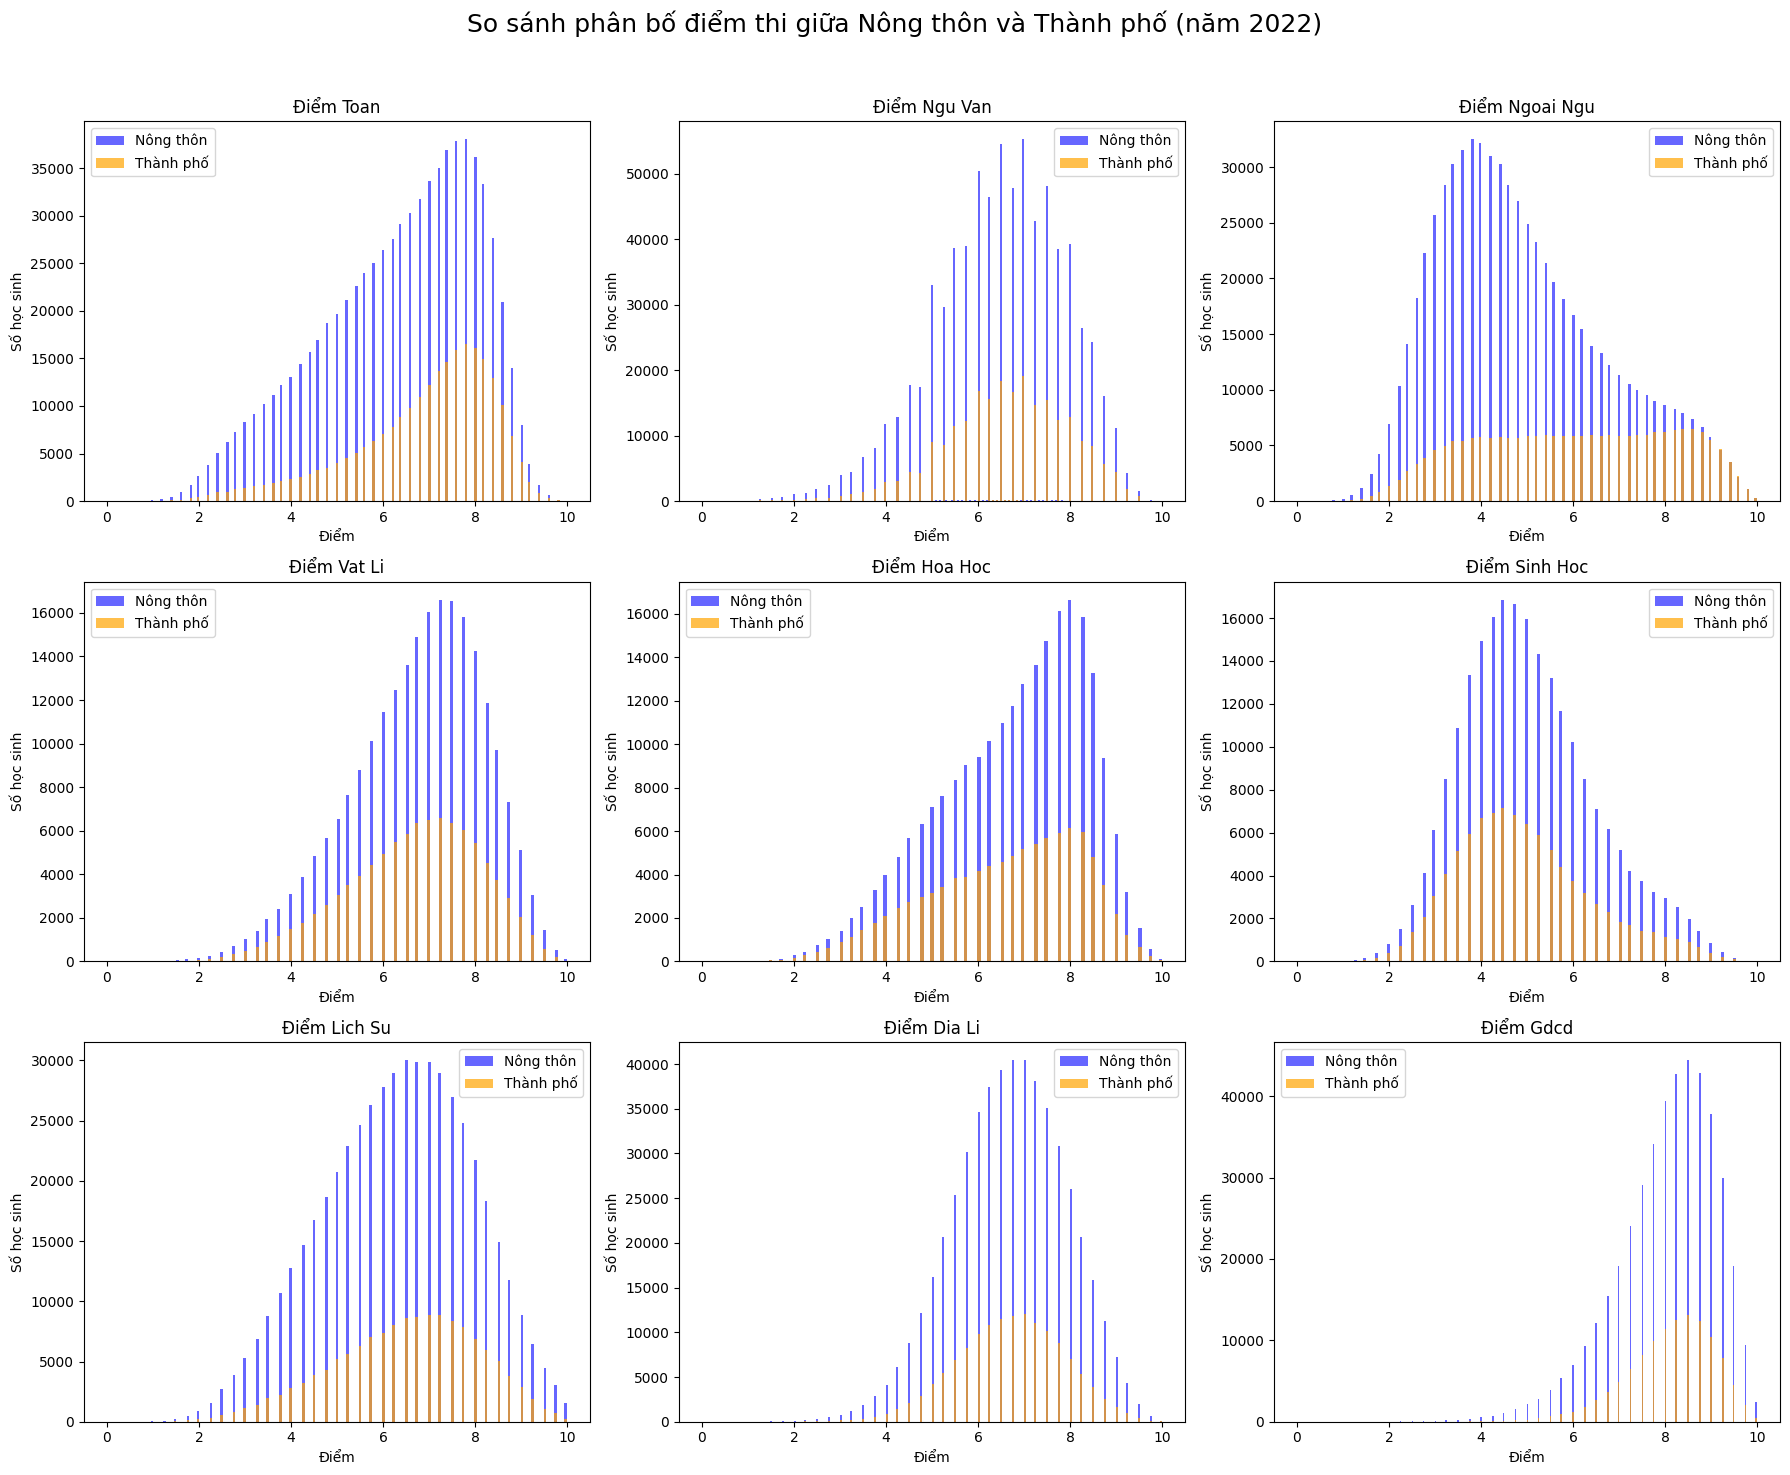

In [ ]:
# Phân nhóm tỉnh thành phố và nông thôn
df = data_22.copy()
cities = ['Hồ Chí Minh', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ', 'Bình Dương']
df_cities = df[df['province'].isin(cities)]
df_other_provinces = df[~df['province'].isin(cities)]

# Tạo 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Dữ liệu từng môn (loại bỏ NaN)
    city_scores = df_cities[subject].dropna()
    rural_scores = df_other_provinces[subject].dropna()

    # Dùng cùng bin cho 2 nhóm để dễ so sánh
    bins = 'auto'
    counts_rural, bins_rural, _ = ax.hist(rural_scores, bins=bins, color='blue', alpha=0.6, label='Nông thôn')
    ax.hist(city_scores, bins=bins_rural, color='orange', alpha=0.7, label='Thành phố')

    ax.set_title(f"Điểm {subject.replace('_', ' ').title()}")
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số học sinh')
    ax.legend()

plt.suptitle("So sánh phân bố điểm thi giữa Nông thôn và Thành phố (năm 2022)", fontsize=18) ###
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chừa chỗ cho tiêu đề
plt.show()


/tmp/ipython-input-47-1138181411.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


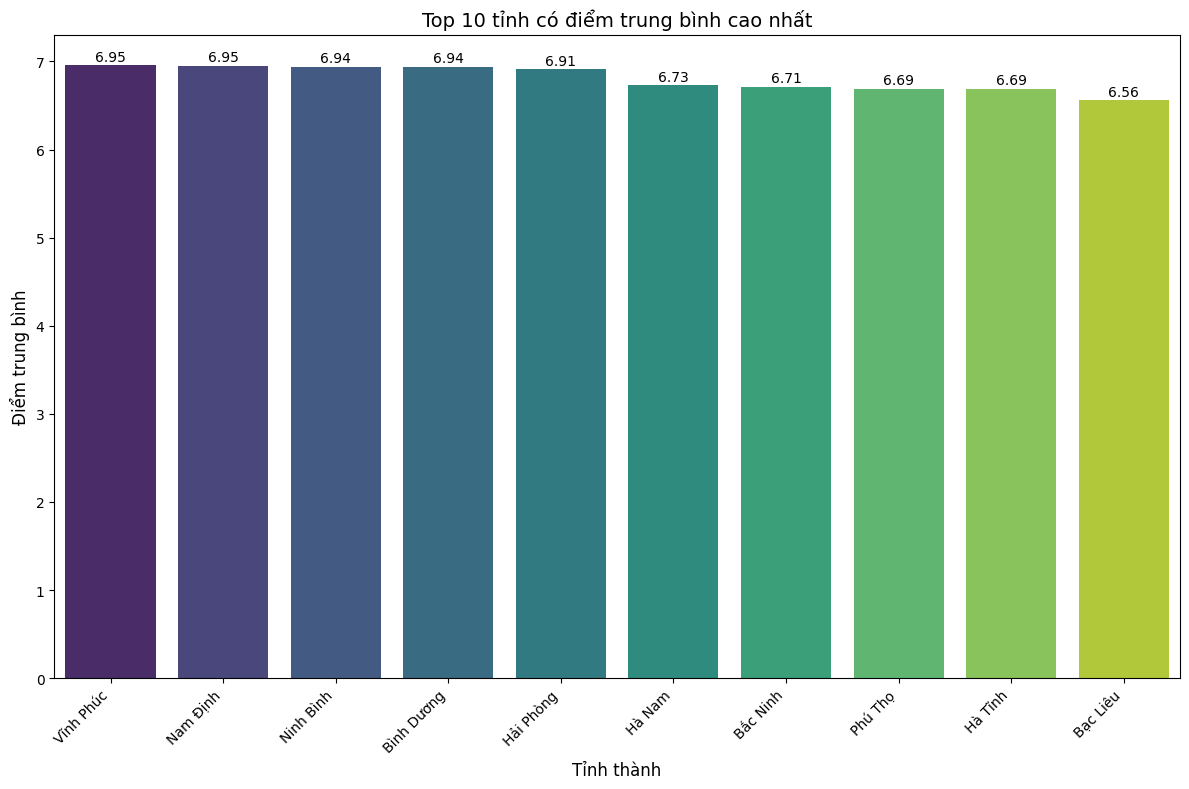

In [ ]:
# Tính điểm trung bình 6 môn
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
data = data_22.copy() ####
data['avg_subjects'] = data[subjects].mean(axis=1, skipna=True)

# Trung bình theo tỉnh
province_avg = (
    data.groupby('province')['avg_subjects']
    .mean()
    .reset_index()
    .sort_values(by='avg_subjects', ascending=False)
)

# Lấy 10 tỉnh cao nhất
top10 = province_avg.head(10)

# Vẽ barplot dọc
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top10,
    x='province',
    y='avg_subjects',
    palette='viridis'
)

# Thêm điểm số lên đầu mỗi cột
for i, row in top10.iterrows():
    ax.text(
        x=top10.index.get_loc(i),
        y=row['avg_subjects'] + 0.02,  # để lệch lên trên 1 chút
        s=f"{row['avg_subjects']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xlabel("Tỉnh thành", fontsize=12)
plt.title("Top 10 tỉnh có điểm trung bình cao nhất", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
social_science_sample = data_22.dropna(subset=['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']) ####

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']:
    social_science_sample[column] = social_science_sample[column].apply(classify_score)

# P(Ngu Van High | GDCD High)
p_van_high_given_gdcd_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High')]) / len(social_science_sample[social_science_sample['gdcd'] == 'High'])

# P(GDCD High | Ngu Van High)
p_gdcd_high_given_van_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[social_science_sample['ngu_van'] == 'High'])

# P(GDCD High | Ngu Van High, Ngoai Ngu High)
p_gdcd_high_given_van_ngoai_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# P(Ngoai Ngu High | GDCD High, Ngu Van High)
p_ngoai_ngu_high_given_gdcd_van_high = len(social_science_sample[(social_science_sample['ngoai_ngu'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')])

# P(Ngu Van High | GDCD High, Ngoai Ngu High)
p_van_high_given_gdcd_ngoai_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Ngu Van High | GDCD High)': p_van_high_given_gdcd_high,
    'P(GDCD High | Ngu Van High)': p_gdcd_high_given_van_high,
    'P(GDCD High | Ngu Van High, Ngoai Ngu High)': p_gdcd_high_given_van_ngoai_high,
    'P(Ngoai Ngu High | GDCD High, Ngu Van High)': p_ngoai_ngu_high_given_gdcd_van_high,
    'P(Ngu Van High | GDCD High, Ngoai Ngu High)': p_van_high_given_gdcd_ngoai_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.219639                     0.772822   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.791705   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.254091   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.537241  


P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.219639                     0.772822   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.791705   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.254091   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.537241

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
natural_science_sample = data_22.dropna(subset=['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']) ####

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']:
    natural_science_sample[column] = natural_science_sample[column].apply(classify_score)

# P(Toan High | Hoa Hoc High)
p_toan_high_given_hoahoc_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[natural_science_sample['hoa_hoc'] == 'High'])

# P(Toan High | Vat Li High)
p_toan_high_given_vatli_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[natural_science_sample['vat_li'] == 'High'])

# P(Toan High | Vat Li High, Hoa Hoc High)
p_toan_high_given_li_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# P(Sinh Hoc High | Hoa Hoc High, Vat Li High)
p_sinh_high_given_hoa_li_high = len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[(natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')])

# P(Toan Hoc High | Sinh Hoc High, Hoa Hoc High)
p_toan_high_given_sinh_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Toan High | Hoa Hoc High)': p_toan_high_given_hoahoc_high,
    'P(Toan High | Vat Li High)': p_toan_high_given_vatli_high,
    'P(Toan Hoc High | Vat Li High, Hoa Hoc High)': p_toan_high_given_li_hoa_high,
    'P(Sinh High | Vat Li High, Hoa Hoc High)': p_sinh_high_given_hoa_li_high,
    'P(Toan High | Sinh Hoc High, Hoa Hoc High)': p_toan_high_given_sinh_hoa_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.686611                    0.779237   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.846798   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                   0.03483   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.830925  


P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.686611                    0.779237   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.846798   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                   0.03483   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.830925

###Năm 2023###

In [ ]:
data_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022060 entries, 0 to 1022059
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sbd        1022060 non-null  object 
 1   toan       1003373 non-null  float64
 2   ngu_van    1008239 non-null  float64
 3   ngoai_ngu  880997 non-null   float64
 4   vat_li     327189 non-null   float64
 5   hoa_hoc    328118 non-null   float64
 6   sinh_hoc   324625 non-null   float64
 7   lich_su    683447 non-null   float64
 8   dia_li     682134 non-null   float64
 9   gdcd       565452 non-null   float64
 10  province   1022060 non-null  object 
dtypes: float64(9), object(2)
memory usage: 85.8+ MB


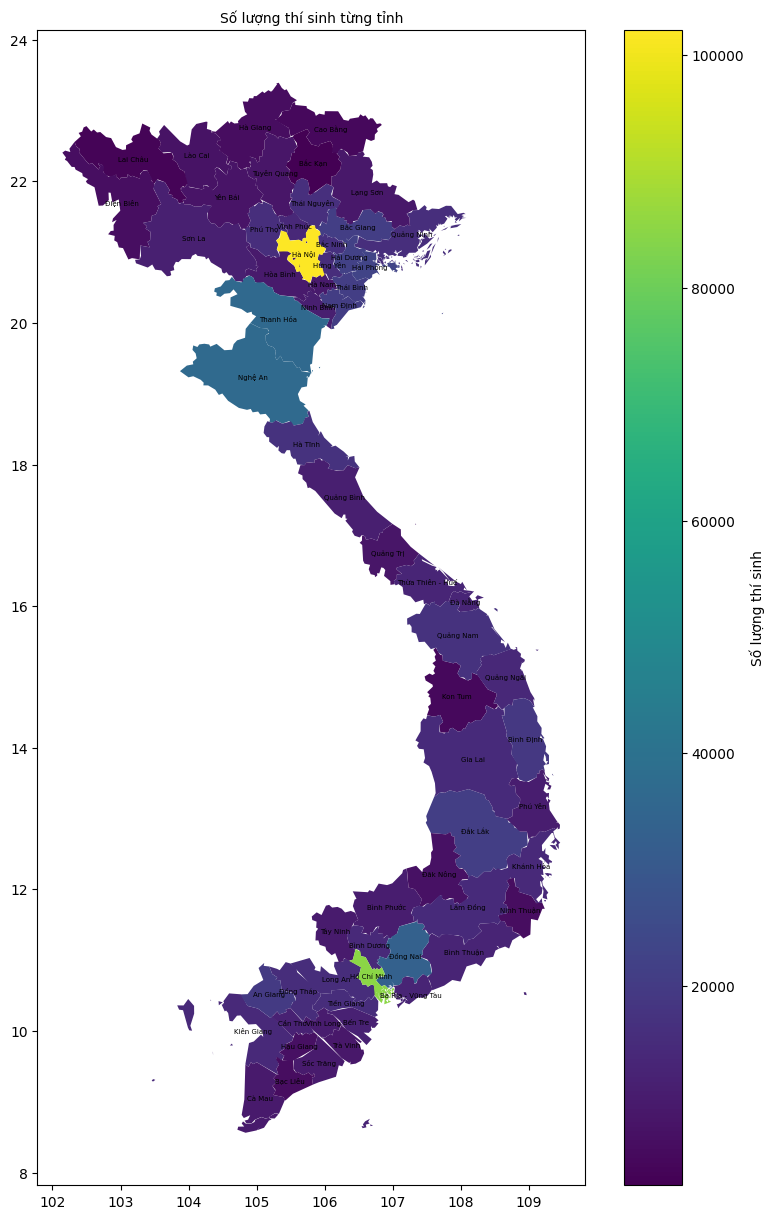

In [ ]:
# Đếm số lượng thí sinh theo từng tỉnh từ dữ liệu điểm năm 2023
province_counts = data_23['province'].value_counts().reset_index() #####
province_counts.columns = ['province', 'number of students']  # Đặt lại tên cột

# Đọc file bản đồ Việt Nam (GeoJSON)
vietnam_map = gpd.read_file('/content/drive/MyDrive/Phân tích dữ liệu/BTL/vietnam.geojson')

# Gộp dữ liệu bản đồ với số lượng thí sinh theo tỉnh
vietnam_map = vietnam_map.merge(province_counts, left_on='name', right_on='province')

# Khởi tạo biểu đồ kích thước lớn hơn
fig, ax = plt.subplots(1, figsize=(10,15))

# Vẽ bản đồ với cột 'number of students' được biểu diễn bằng màu sắc
vietnam_map.plot(
    column='number of students',     # Cột dùng để tô màu
    ax=ax,                           # Trục vẽ
    legend=True,                     # Hiển thị chú giải (colorbar)
    cmap='viridis',                  # Bảng màu Viridis (vàng → tím)
    legend_kwds={
        'label': "Số lượng thí sinh",         # Nhãn của colorbar
        'orientation': "vertical"             # Chiều dọc
    }
)

# Ghi nhãn tên tỉnh vào giữa mỗi khu vực
for idx, row in vietnam_map.iterrows():
    ax.annotate(
        text=row['name'],                           # Tên tỉnh
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # Tọa độ trọng tâm tỉnh
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=5, color='black'                   # Font chữ nhỏ, màu đen
    )

plt.title('Số lượng thí sinh từng tỉnh', fontsize=10)

plt.show()


In [ ]:
data_23.describe()

toan       ngu_van      ngoai_ngu         vat_li  \
count  1.003373e+06  1.008239e+06  880997.000000  327189.000000   
mean   6.250557e+00  6.858194e+00       5.462410       6.573900   
std    1.633336e+00  1.326471e+00       1.966353       1.486819   
min    0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    5.200000e+00  6.000000e+00       4.000000       5.500000   
50%    6.600000e+00  7.000000e+00       5.200000       6.750000   
75%    7.600000e+00  7.750000e+00       7.000000       7.750000   
max    1.000000e+01  1.000000e+01      10.000000      10.000000   

             hoa_hoc       sinh_hoc        lich_su         dia_li  \
count  328118.000000  324625.000000  683447.000000  682134.000000   
mean        6.744646       6.394933       6.025629       6.147523   
std         1.428468       1.206772       1.552931       1.168732   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.750000       5.500000       5.000000       5.500000   
50%         7.000000       6.500000       6.000000       6.250000   
75%         7.750000       7.250000       7.250000       7.000000   
max        10.000000      10.000000      10.000000      10.000000   

                gdcd  
count  565452.000000  
mean        8.285805  
std         1.137638  
min         0.000000  
25%         7.750000  
50%         8.500000  
75%         9.250000  
max        10.000000

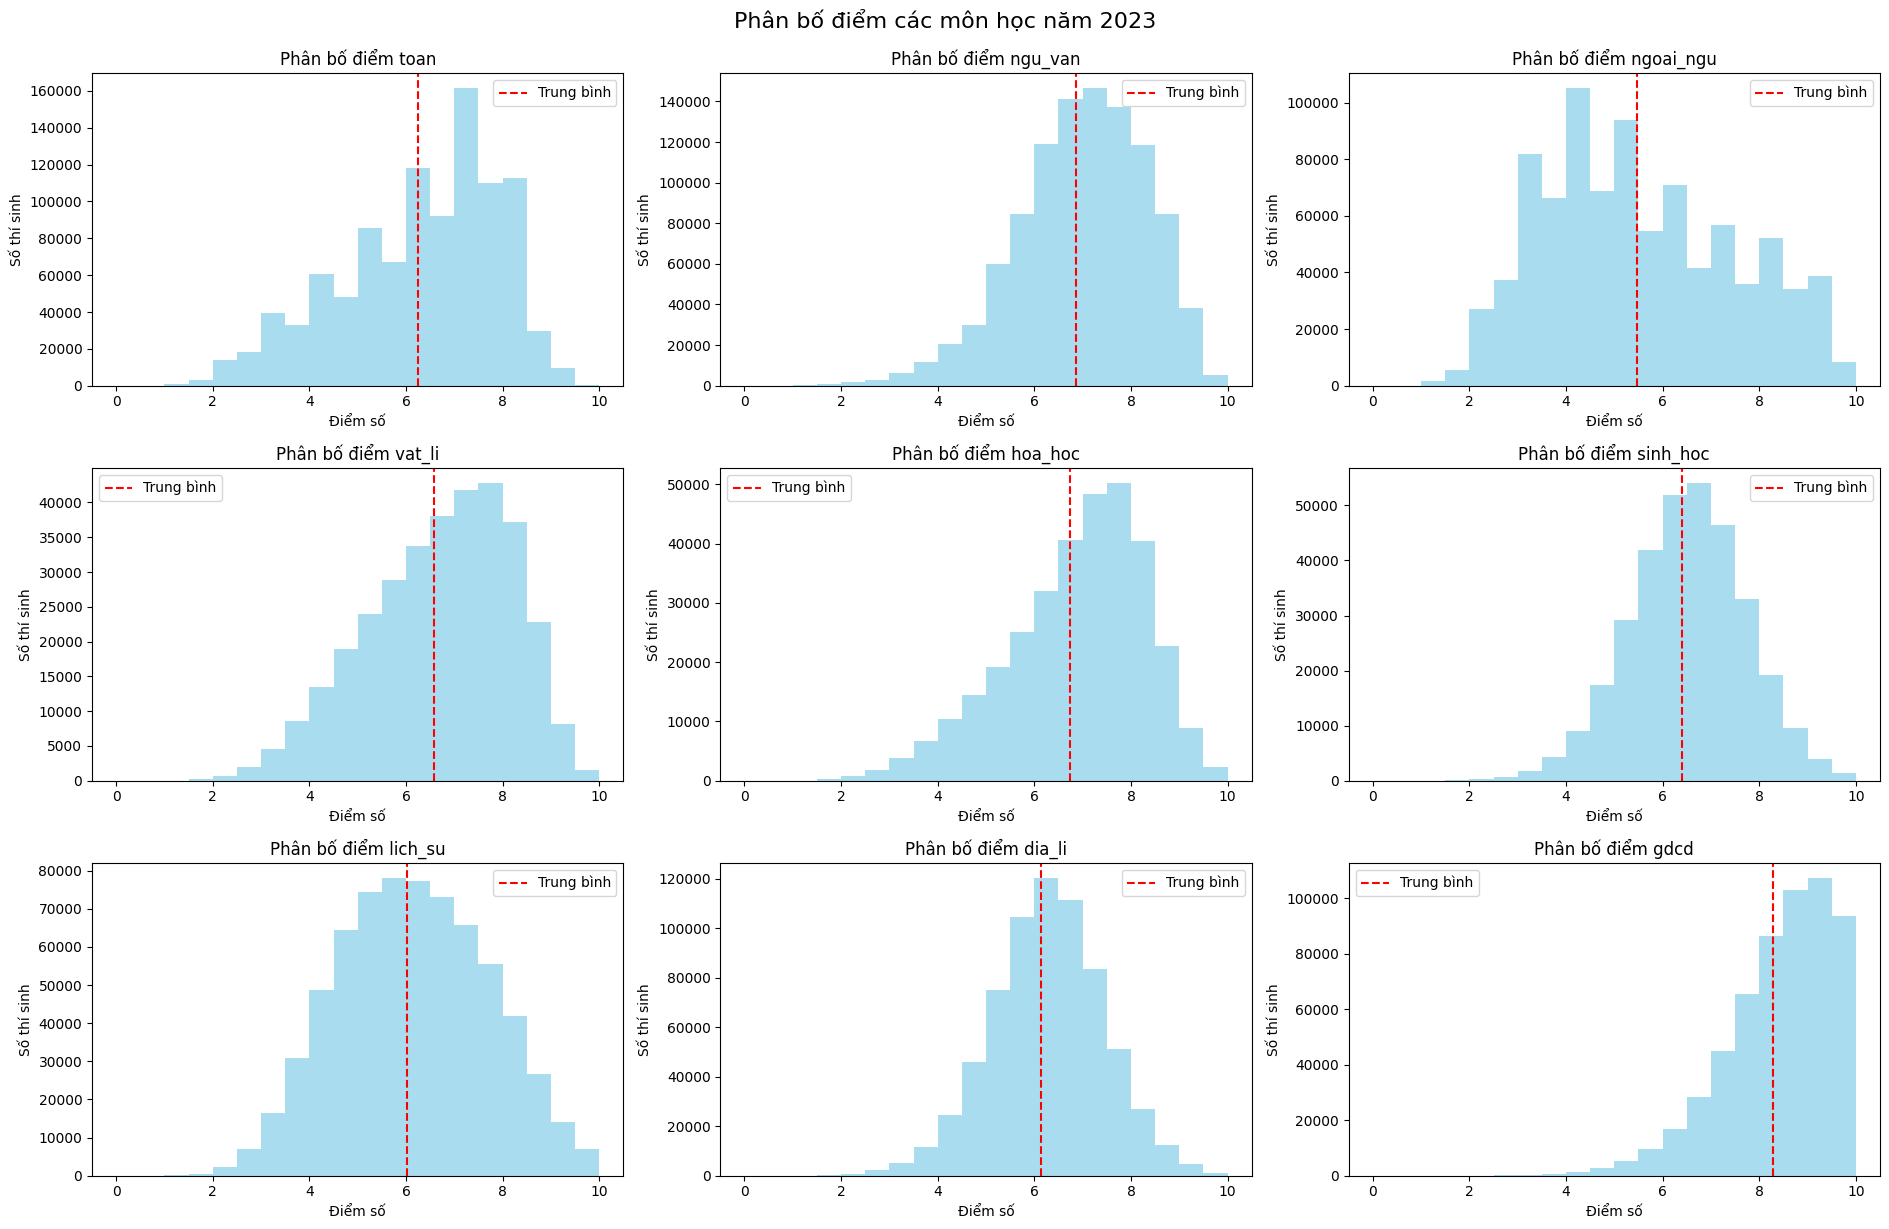

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 12))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    if subject in data_23.columns:
        axes[i].hist(data_23[subject].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Phân bố điểm {subject}')
        axes[i].set_xlabel('Điểm số')
        axes[i].set_ylabel('Số thí sinh')
        axes[i].axvline(data_23[subject].mean(), color='red', linestyle='--', label='Trung bình')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học năm 2023', fontsize=16, y=1.02) #####
plt.show()

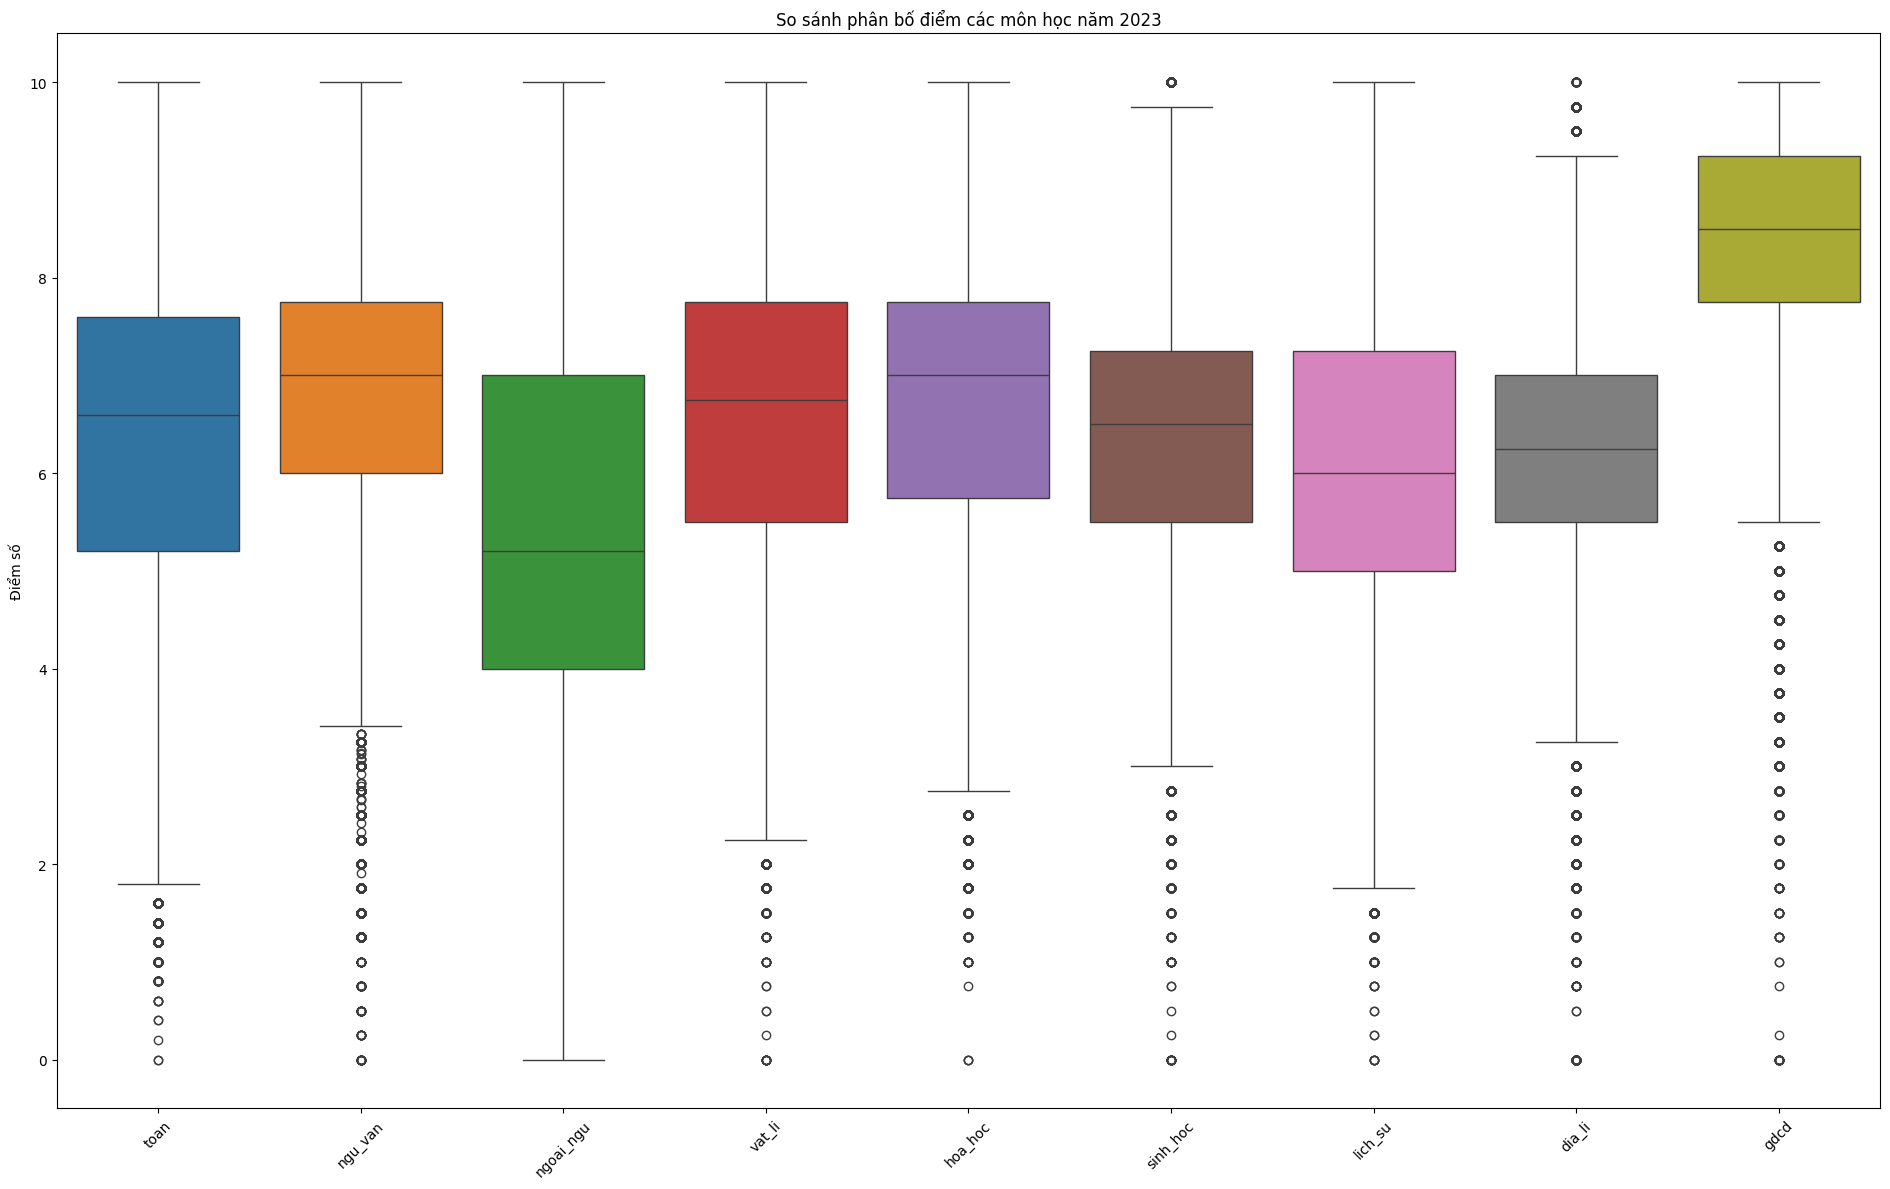

In [ ]:
data_subjects = data_23[subjects]

plt.figure(figsize=(19, 12))
sns.boxplot(data=data_subjects)
plt.title('So sánh phân bố điểm các môn học năm 2023')
plt.ylabel('Điểm số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

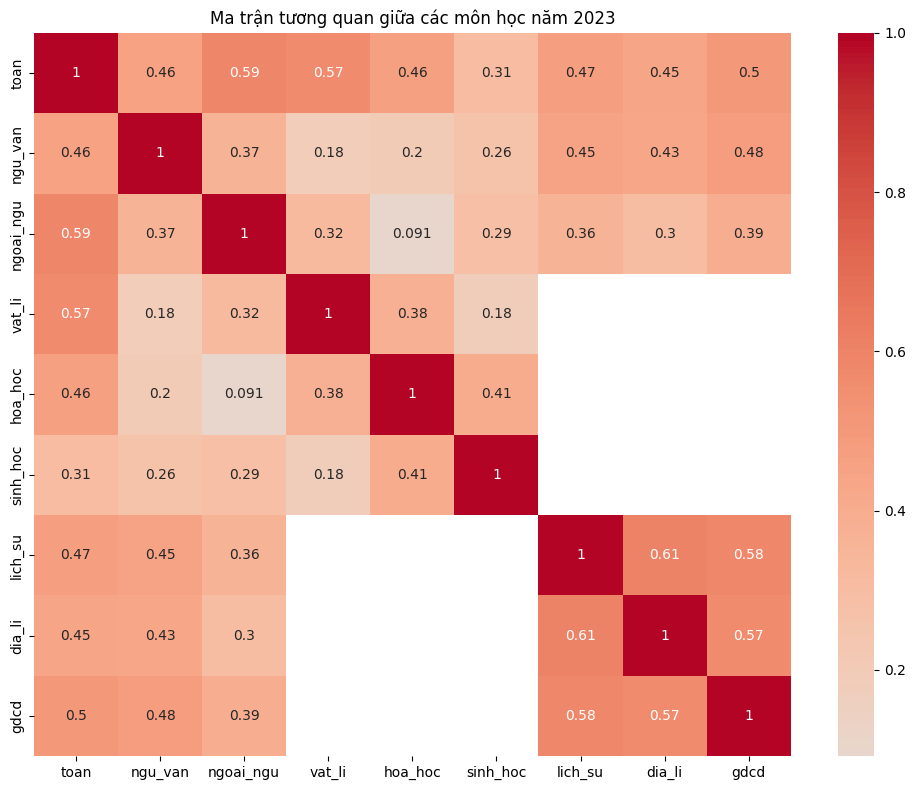

In [ ]:
# Ma trận tương quan
correlation_matrix = data_23[subjects].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các môn học năm 2023') ####
plt.tight_layout()
plt.show()

In [ ]:
# Tính điểm khối thi
data_23['Khối_A'] = data_23['toan'] + data_23['vat_li'] + data_23['hoa_hoc']
data_23['Khối_B'] = data_23['toan'] + data_23['hoa_hoc'] + data_23['sinh_hoc']
data_23['Khối_C'] = data_23['ngu_van'] + data_23['lich_su'] + data_23['dia_li']
data_23['Khối_D'] = data_23['toan'] + data_23['ngu_van'] + data_23['ngoai_ngu']
# Thống kê khối thi
print("=== THỐNG KÊ KHỐI THI ===")
for khoi in ['Khối_A', 'Khối_B', 'Khối_C', 'Khối_D']:
    valid_count = data_23[khoi].count()
    if valid_count > 0:
        print(f"{khoi}:")
        print(f"  Số thí sinh: {valid_count:,}")
        print(f"  Điểm trung bình: {data_23[khoi].mean():.2f}")
        print(f"  Điểm cao nhất: {data_23[khoi].max():.2f}")

=== THỐNG KÊ KHỐI THI ===
Khối_A:
  Số thí sinh: 325,902
  Điểm trung bình: 20.77
  Điểm cao nhất: 29.35
Khối_B:
  Số thí sinh: 324,554
  Điểm trung bình: 20.60
  Điểm cao nhất: 29.80
Khối_C:
  Số thí sinh: 681,723
  Điểm trung bình: 18.97
  Điểm cao nhất: 29.50
Khối_D:
  Số thí sinh: 878,007
  Điểm trung bình: 18.90
  Điểm cao nhất: 28.90


In [ ]:
# 1. Cấu hình các khối thi và môn tương ứng
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

# 2. Tính điểm trung bình và gộp với bản đồ riêng cho từng khối
score_maps = {}
for block, subject in blocks.items():
    temp = data_23.copy() #####
    temp['average score'] = temp[subject].mean(axis=1, skipna=True)
    avg_score_by_prov = temp.groupby('province')['average score'].mean().reset_index()

    # 💡 Sử dụng bản sao mới của vietnam_map để tránh ghi đè
    vietnam_map_copy = vietnam_map.copy()

    merged_map = vietnam_map_copy.merge(
        avg_score_by_prov,
        how='left',
        left_on='name',
        right_on='province',
        suffixes=('', '_dup')
    )

    if 'average score_dup' in merged_map.columns:
        merged_map.drop(columns=['average score_dup'], inplace=True)

    score_maps[block] = merged_map
    print(f"{block}: ", merged_map['average score'].describe())


A00:  count    63.000000
mean      5.904387
std       0.519606
min       4.278183
25%       5.562622
50%       5.967387
75%       6.228176
max       6.940357
Name: average score, dtype: float64
A01:  count    63.000000
mean      5.566050
std       0.542816
min       4.054815
25%       5.242321
50%       5.681315
75%       5.885053
max       6.741872
Name: average score, dtype: float64
B00:  count    63.000000
mean      5.894202
std       0.510205
min       4.272304
25%       5.572742
50%       5.948807
75%       6.246733
max       6.881344
Name: average score, dtype: float64
D01:  count    63.000000
mean      6.000541
std       0.487864
min       4.510787
25%       5.713065
50%       6.032548
75%       6.322203
max       6.954473
Name: average score, dtype: float64


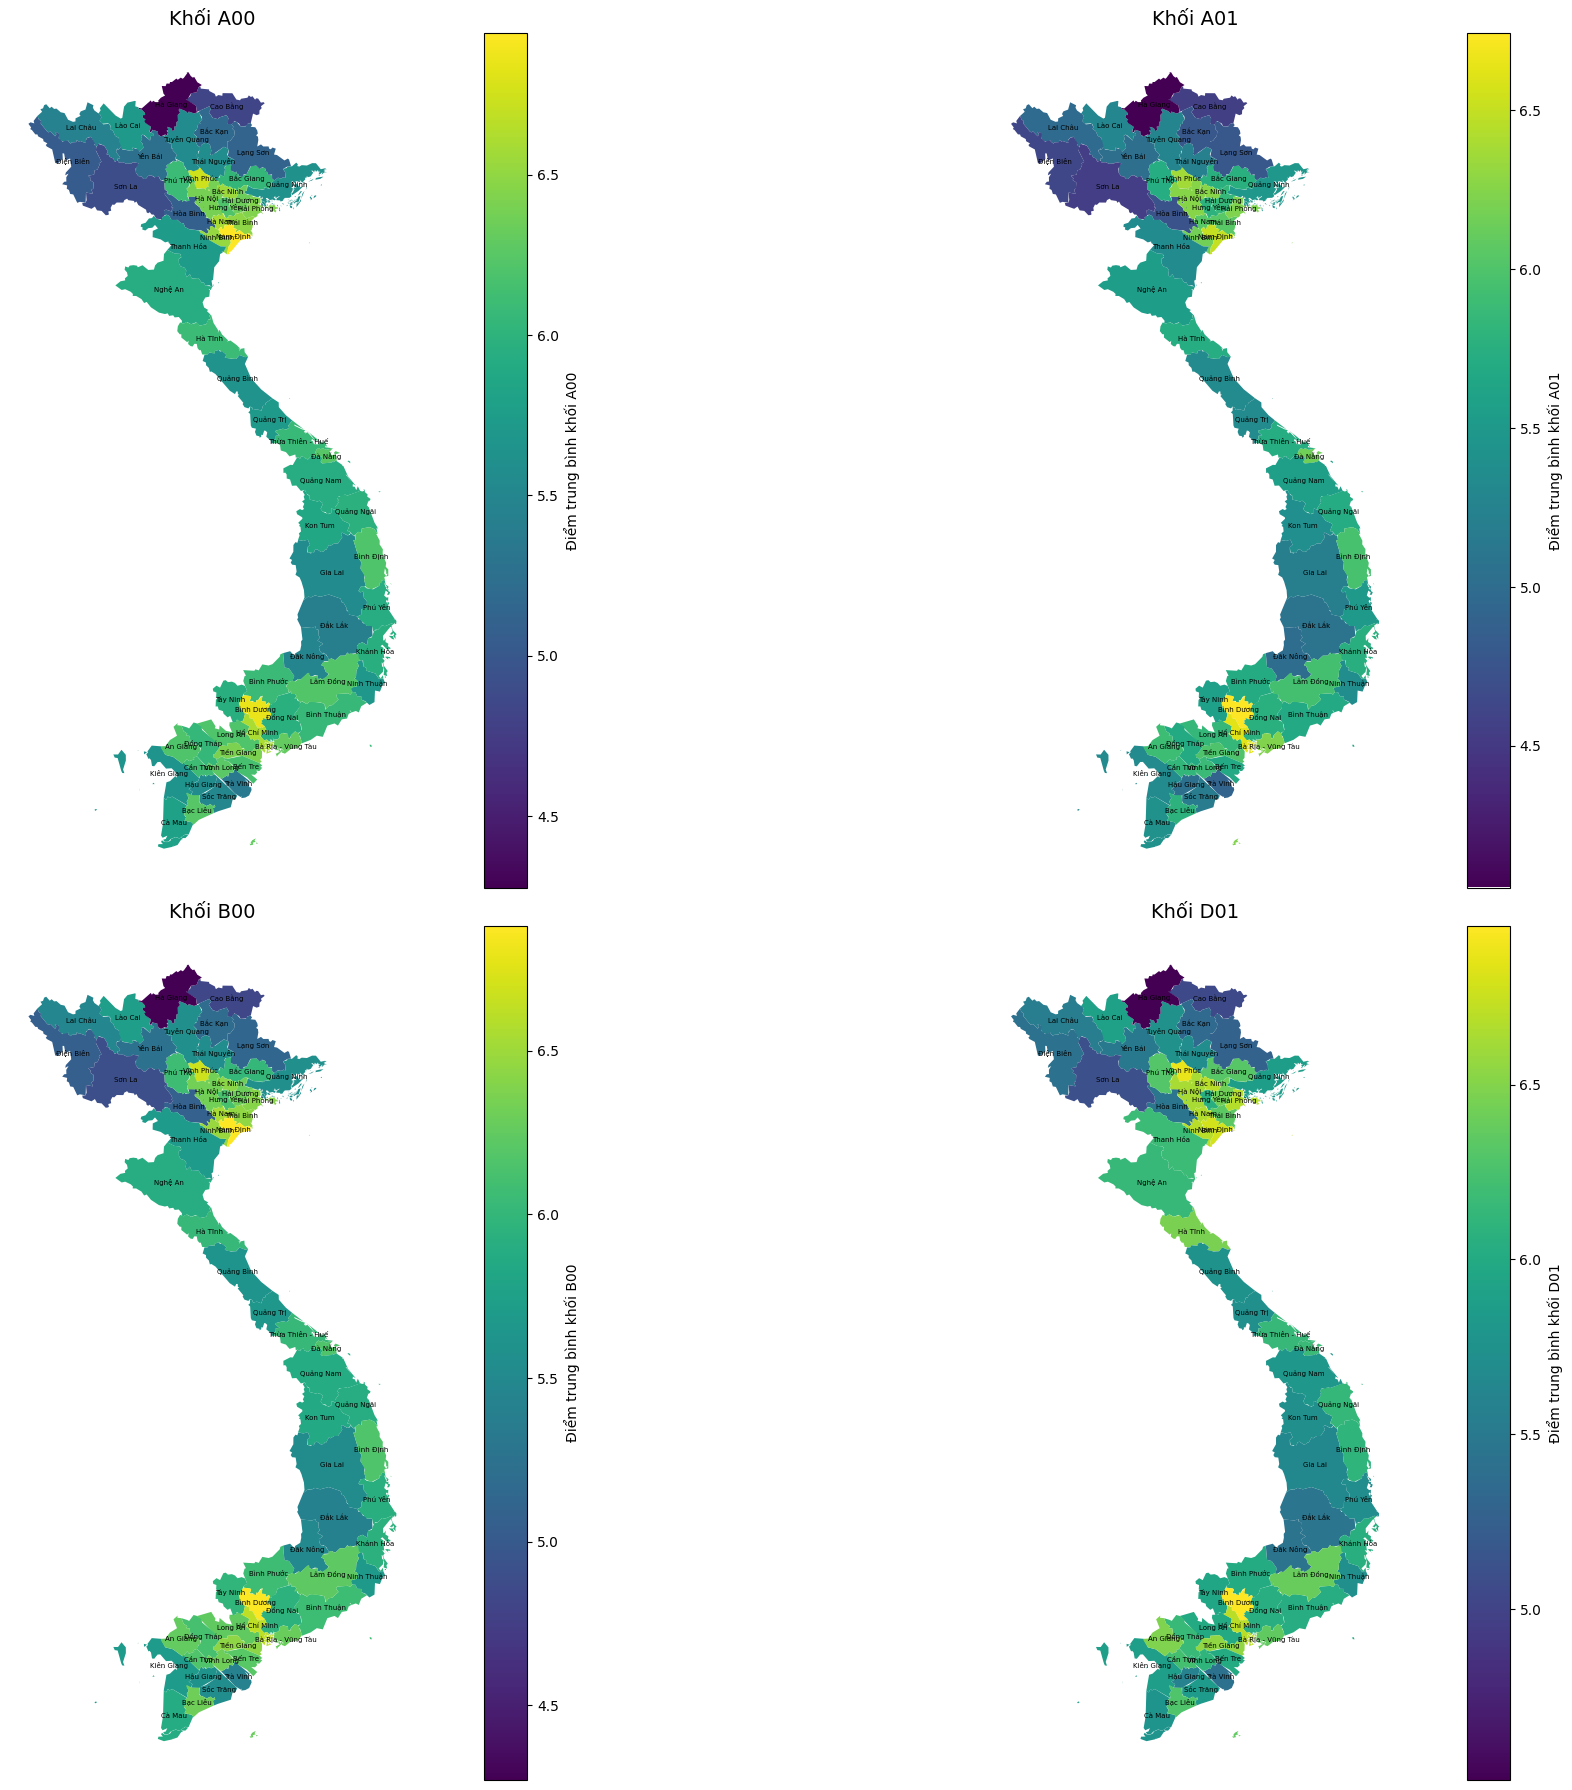

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # 2 hàng, 2 cột
axes = axes.flatten()  # Chuyển về 1D để dễ lặp

for i, block in enumerate(['A00', 'A01', 'B00', 'D01']):
    ax = axes[i]
    map_data = score_maps[block]

    map_data.plot(
        column='average score',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Điểm trung bình khối {block}", 'orientation': "vertical"}
    )

    # Ghi nhãn tên tỉnh
    for idx, row in map_data.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            centroid = row['geometry'].centroid
            ax.annotate(
                text=row['name'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=5, color='black'
            )

    ax.set_title(f"Khối {block}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


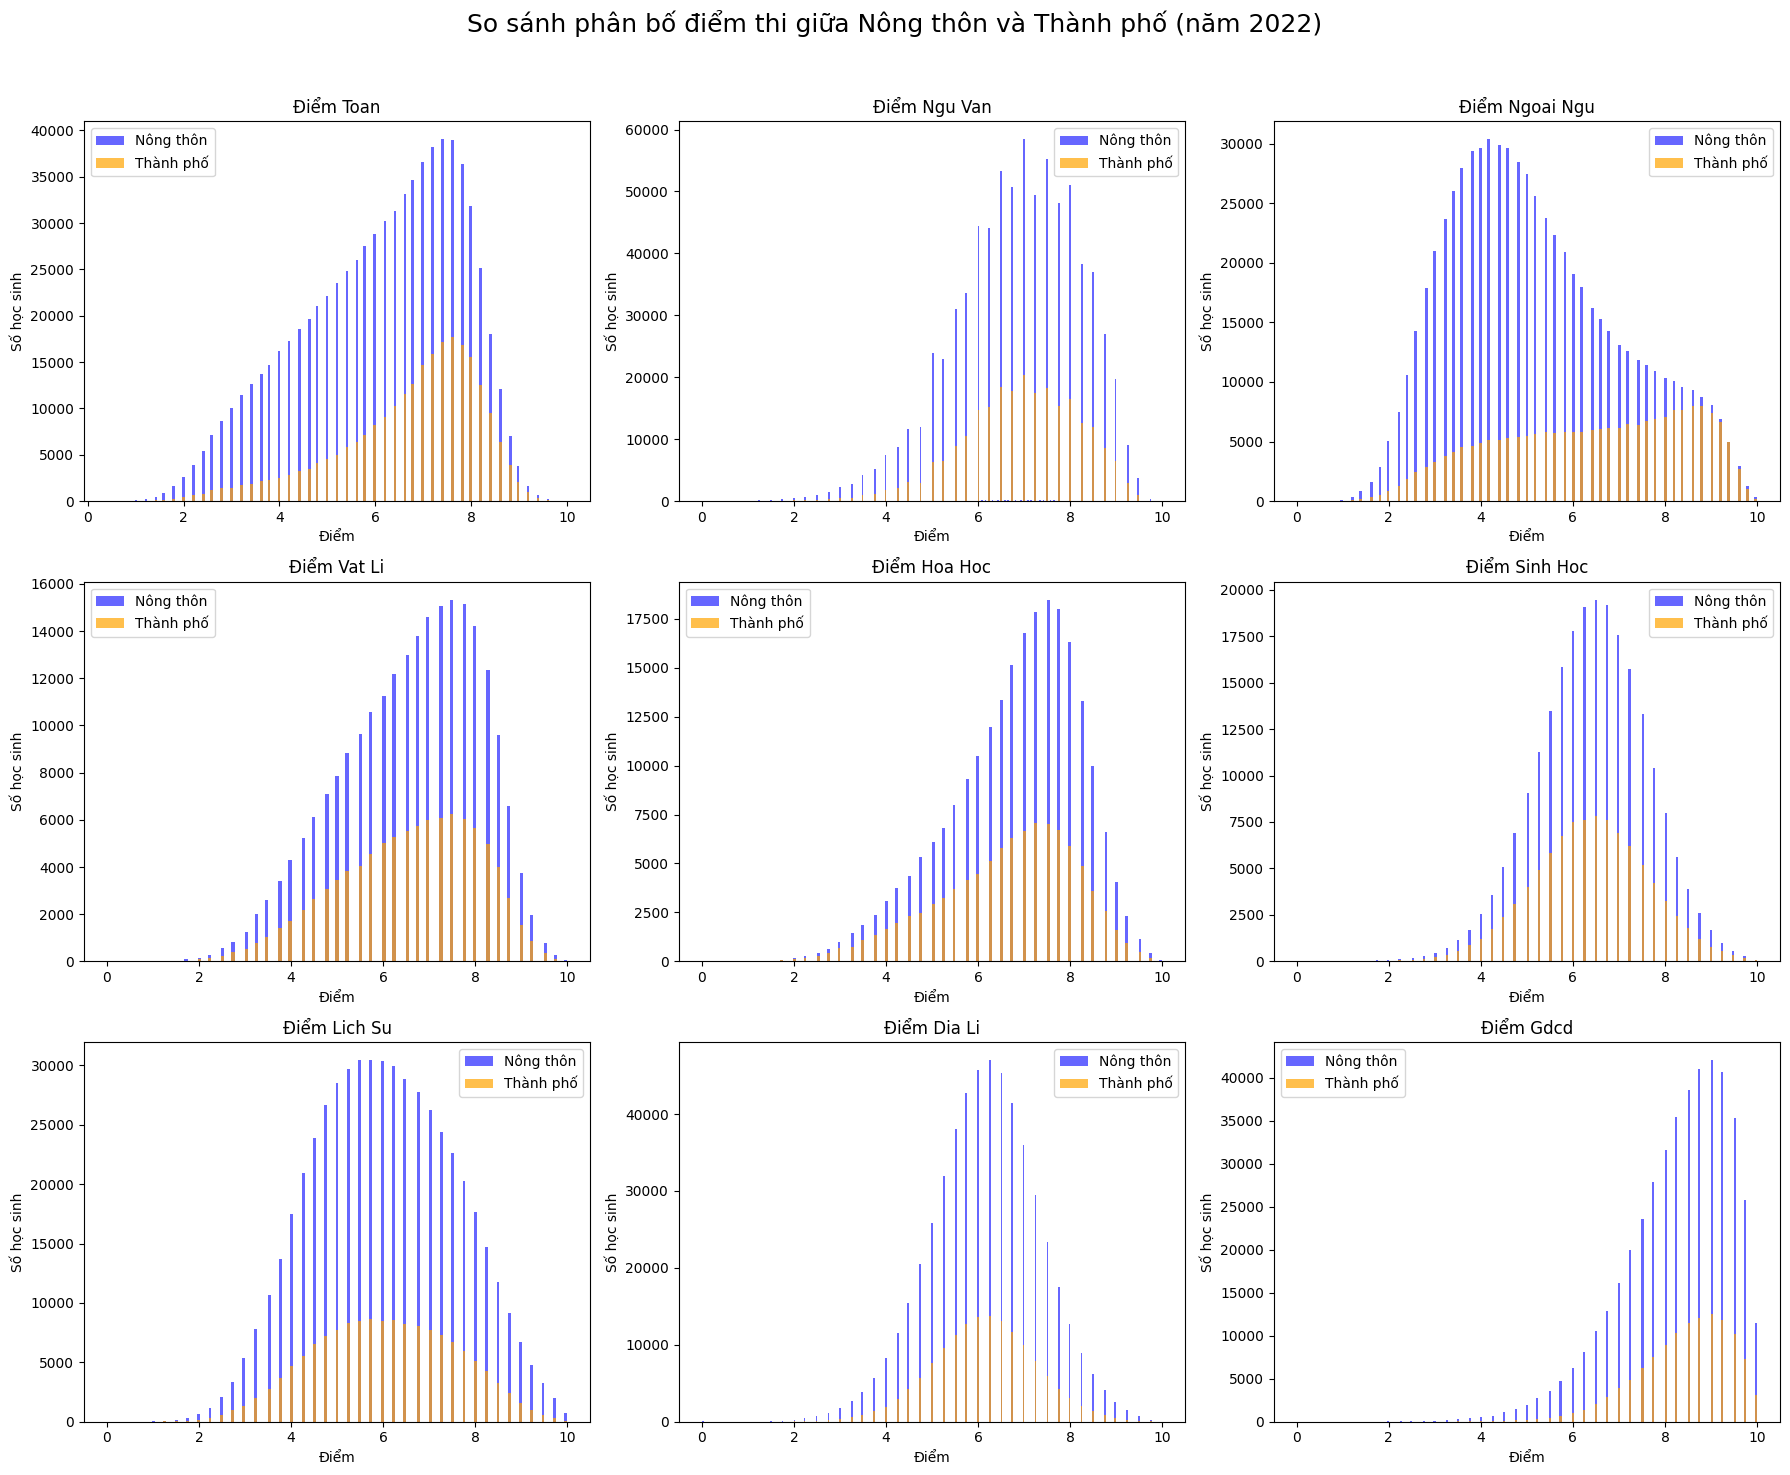

In [ ]:
# Phân nhóm tỉnh thành phố và nông thôn
df = data_23.copy()
cities = ['Hồ Chí Minh', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ', 'Bình Dương']
df_cities = df[df['province'].isin(cities)]
df_other_provinces = df[~df['province'].isin(cities)]

# Tạo 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Dữ liệu từng môn (loại bỏ NaN)
    city_scores = df_cities[subject].dropna()
    rural_scores = df_other_provinces[subject].dropna()

    # Dùng cùng bin cho 2 nhóm để dễ so sánh
    bins = 'auto'
    counts_rural, bins_rural, _ = ax.hist(rural_scores, bins=bins, color='blue', alpha=0.6, label='Nông thôn')
    ax.hist(city_scores, bins=bins_rural, color='orange', alpha=0.7, label='Thành phố')

    ax.set_title(f"Điểm {subject.replace('_', ' ').title()}")
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số học sinh')
    ax.legend()

plt.suptitle("So sánh phân bố điểm thi giữa Nông thôn và Thành phố (năm 2022)", fontsize=18) ###
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chừa chỗ cho tiêu đề
plt.show()


/tmp/ipython-input-60-349925124.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


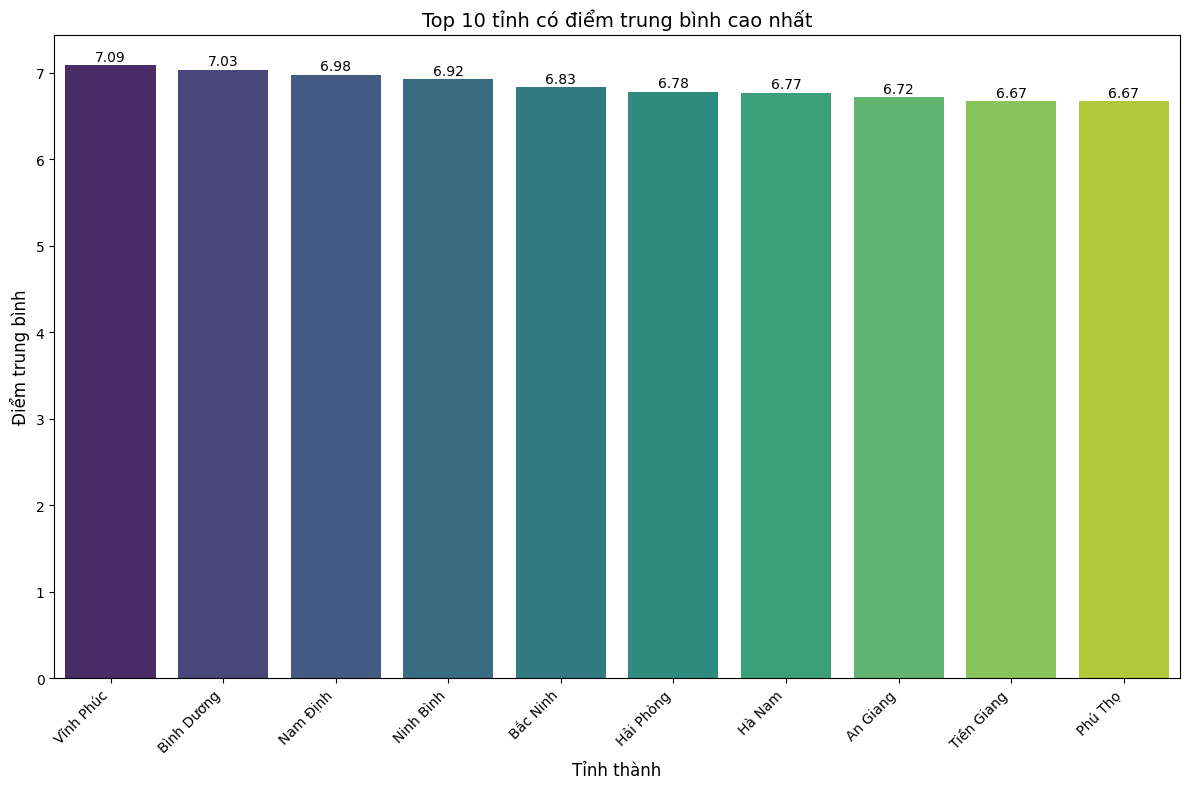

In [ ]:
# Tính điểm trung bình 6 môn
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
data = data_23.copy() ####
data['avg_subjects'] = data[subjects].mean(axis=1, skipna=True)

# Trung bình theo tỉnh
province_avg = (
    data.groupby('province')['avg_subjects']
    .mean()
    .reset_index()
    .sort_values(by='avg_subjects', ascending=False)
)

# Lấy 10 tỉnh cao nhất
top10 = province_avg.head(10)

# Vẽ barplot dọc
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top10,
    x='province',
    y='avg_subjects',
    palette='viridis'
)

# Thêm điểm số lên đầu mỗi cột
for i, row in top10.iterrows():
    ax.text(
        x=top10.index.get_loc(i),
        y=row['avg_subjects'] + 0.02,  # để lệch lên trên 1 chút
        s=f"{row['avg_subjects']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xlabel("Tỉnh thành", fontsize=12)
plt.title("Top 10 tỉnh có điểm trung bình cao nhất", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
social_science_sample = data_23.dropna(subset=['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su'])

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']:
    social_science_sample[column] = social_science_sample[column].apply(classify_score)

# P(Ngu Van High | GDCD High)
p_van_high_given_gdcd_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High')]) / len(social_science_sample[social_science_sample['gdcd'] == 'High'])

# P(GDCD High | Ngu Van High)
p_gdcd_high_given_van_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[social_science_sample['ngu_van'] == 'High'])

# P(GDCD High | Ngu Van High, Ngoai Ngu High)
p_gdcd_high_given_van_ngoai_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# P(Ngoai Ngu High | GDCD High, Ngu Van High)
p_ngoai_ngu_high_given_gdcd_van_high = len(social_science_sample[(social_science_sample['ngoai_ngu'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')])

# P(Ngu Van High | GDCD High, Ngoai Ngu High)
p_van_high_given_gdcd_ngoai_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Ngu Van High | GDCD High)': p_van_high_given_gdcd_high,
    'P(GDCD High | Ngu Van High)': p_gdcd_high_given_van_high,
    'P(GDCD High | Ngu Van High, Ngoai Ngu High)': p_gdcd_high_given_van_ngoai_high,
    'P(Ngoai Ngu High | GDCD High, Ngu Van High)': p_ngoai_ngu_high_given_gdcd_van_high,
    'P(Ngu Van High | GDCD High, Ngoai Ngu High)': p_van_high_given_gdcd_ngoai_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                      0.30303                     0.836761   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.891445   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.260898   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.611879  


P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                      0.30303                     0.836761   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.891445   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.260898   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.611879

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
natural_science_sample = data_23.dropna(subset=['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']) ####

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']:
    natural_science_sample[column] = natural_science_sample[column].apply(classify_score)

# P(Toan High | Hoa Hoc High)
p_toan_high_given_hoahoc_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[natural_science_sample['hoa_hoc'] == 'High'])

# P(Toan High | Vat Li High)
p_toan_high_given_vatli_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[natural_science_sample['vat_li'] == 'High'])

# P(Toan High | Vat Li High, Hoa Hoc High)
p_toan_high_given_li_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# P(Sinh Hoc High | Hoa Hoc High, Vat Li High)
p_sinh_high_given_hoa_li_high = len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[(natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')])

# P(Toan Hoc High | Sinh Hoc High, Hoa Hoc High)
p_toan_high_given_sinh_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Toan High | Hoa Hoc High)': p_toan_high_given_hoahoc_high,
    'P(Toan High | Vat Li High)': p_toan_high_given_vatli_high,
    'P(Toan Hoc High | Vat Li High, Hoa Hoc High)': p_toan_high_given_li_hoa_high,
    'P(Sinh High | Vat Li High, Hoa Hoc High)': p_sinh_high_given_hoa_li_high,
    'P(Toan High | Sinh Hoc High, Hoa Hoc High)': p_toan_high_given_sinh_hoa_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.535602                    0.601562   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.716214   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.115378   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.626306  


P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.535602                    0.601562   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.716214   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.115378   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.626306

###Năm 2024###

In [ ]:
data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sbd        1061605 non-null  object 
 1   toan       1045613 non-null  float64
 2   ngu_van    1050101 non-null  float64
 3   ngoai_ngu  912705 non-null   float64
 4   vat_li     345615 non-null   float64
 5   hoa_hoc    346518 non-null   float64
 6   sinh_hoc   342378 non-null   float64
 7   lich_su    706214 non-null   float64
 8   dia_li     704682 non-null   float64
 9   gdcd       583609 non-null   float64
 10  province   1061605 non-null  object 
dtypes: float64(9), object(2)
memory usage: 89.1+ MB


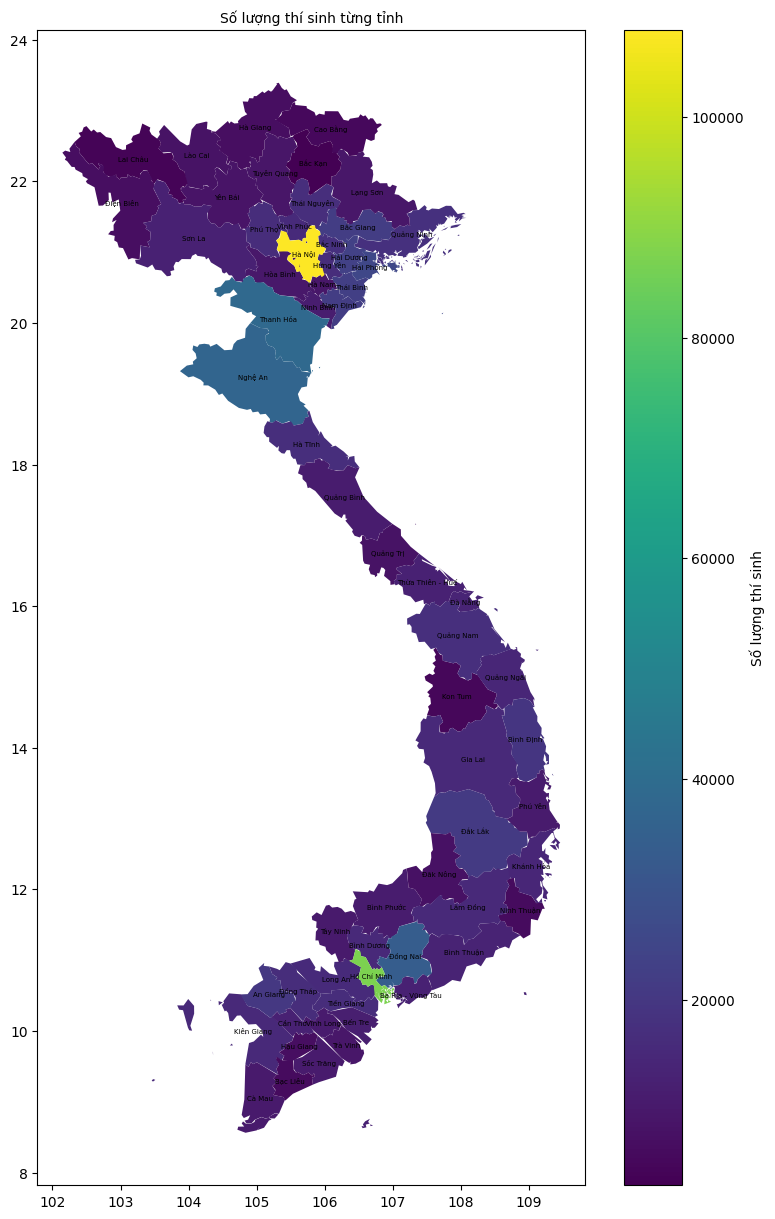

In [ ]:
# Đếm số lượng thí sinh theo từng tỉnh từ dữ liệu điểm năm 2020
province_counts = data_24['province'].value_counts().reset_index()
province_counts.columns = ['province', 'number of students']  # Đặt lại tên cột

# Đọc file bản đồ Việt Nam (GeoJSON)
vietnam_map = gpd.read_file('/content/drive/MyDrive/Phân tích dữ liệu/BTL/vietnam.geojson')

# Gộp dữ liệu bản đồ với số lượng thí sinh theo tỉnh
vietnam_map = vietnam_map.merge(province_counts, left_on='name', right_on='province')

# Khởi tạo biểu đồ kích thước lớn hơn
fig, ax = plt.subplots(1, figsize=(10,15))

# Vẽ bản đồ với cột 'number of students' được biểu diễn bằng màu sắc
vietnam_map.plot(
    column='number of students',     # Cột dùng để tô màu
    ax=ax,                           # Trục vẽ
    legend=True,                     # Hiển thị chú giải (colorbar)
    cmap='viridis',                  # Bảng màu Viridis (vàng → tím)
    legend_kwds={
        'label': "Số lượng thí sinh",         # Nhãn của colorbar
        'orientation': "vertical"             # Chiều dọc
    }
)

# Ghi nhãn tên tỉnh vào giữa mỗi khu vực
for idx, row in vietnam_map.iterrows():
    ax.annotate(
        text=row['name'],                           # Tên tỉnh
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # Tọa độ trọng tâm tỉnh
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=5, color='black'                   # Font chữ nhỏ, màu đen
    )

plt.title('Số lượng thí sinh từng tỉnh', fontsize=10)

plt.show()


In [ ]:
data_24.describe()

toan       ngu_van      ngoai_ngu         vat_li       hoa_hoc  \
count  1.045613e+06  1.050101e+06  912705.000000  345615.000000  346518.00000   
mean   6.447309e+00  7.231146e+00       5.521938       6.666866       6.68083   
std    1.556900e+00  1.330057e+00       1.880657       1.631129       1.64147   
min    0.000000e+00  0.000000e+00       0.000000       0.000000       0.00000   
25%    5.400000e+00  6.500000e+00       4.000000       5.500000       5.50000   
50%    6.800000e+00  7.500000e+00       5.200000       7.000000       6.75000   
75%    7.600000e+00  8.250000e+00       7.000000       8.000000       8.00000   
max    9.800000e+00  1.000000e+01      10.000000      10.000000      10.00000   

            sinh_hoc        lich_su         dia_li           gdcd  
count  342378.000000  706214.000000  704682.000000  583609.000000  
mean        6.284079       6.570343       7.193541       8.156503  
std         1.244849       1.462804       1.283945       1.042644  
min         0.000000       0.000000       0.000000       0.000000  
25%         5.500000       5.500000       6.500000       7.500000  
50%         6.250000       6.500000       7.250000       8.250000  
75%         7.250000       7.500000       8.000000       9.000000  
max        10.000000      10.000000      10.000000      10.000000

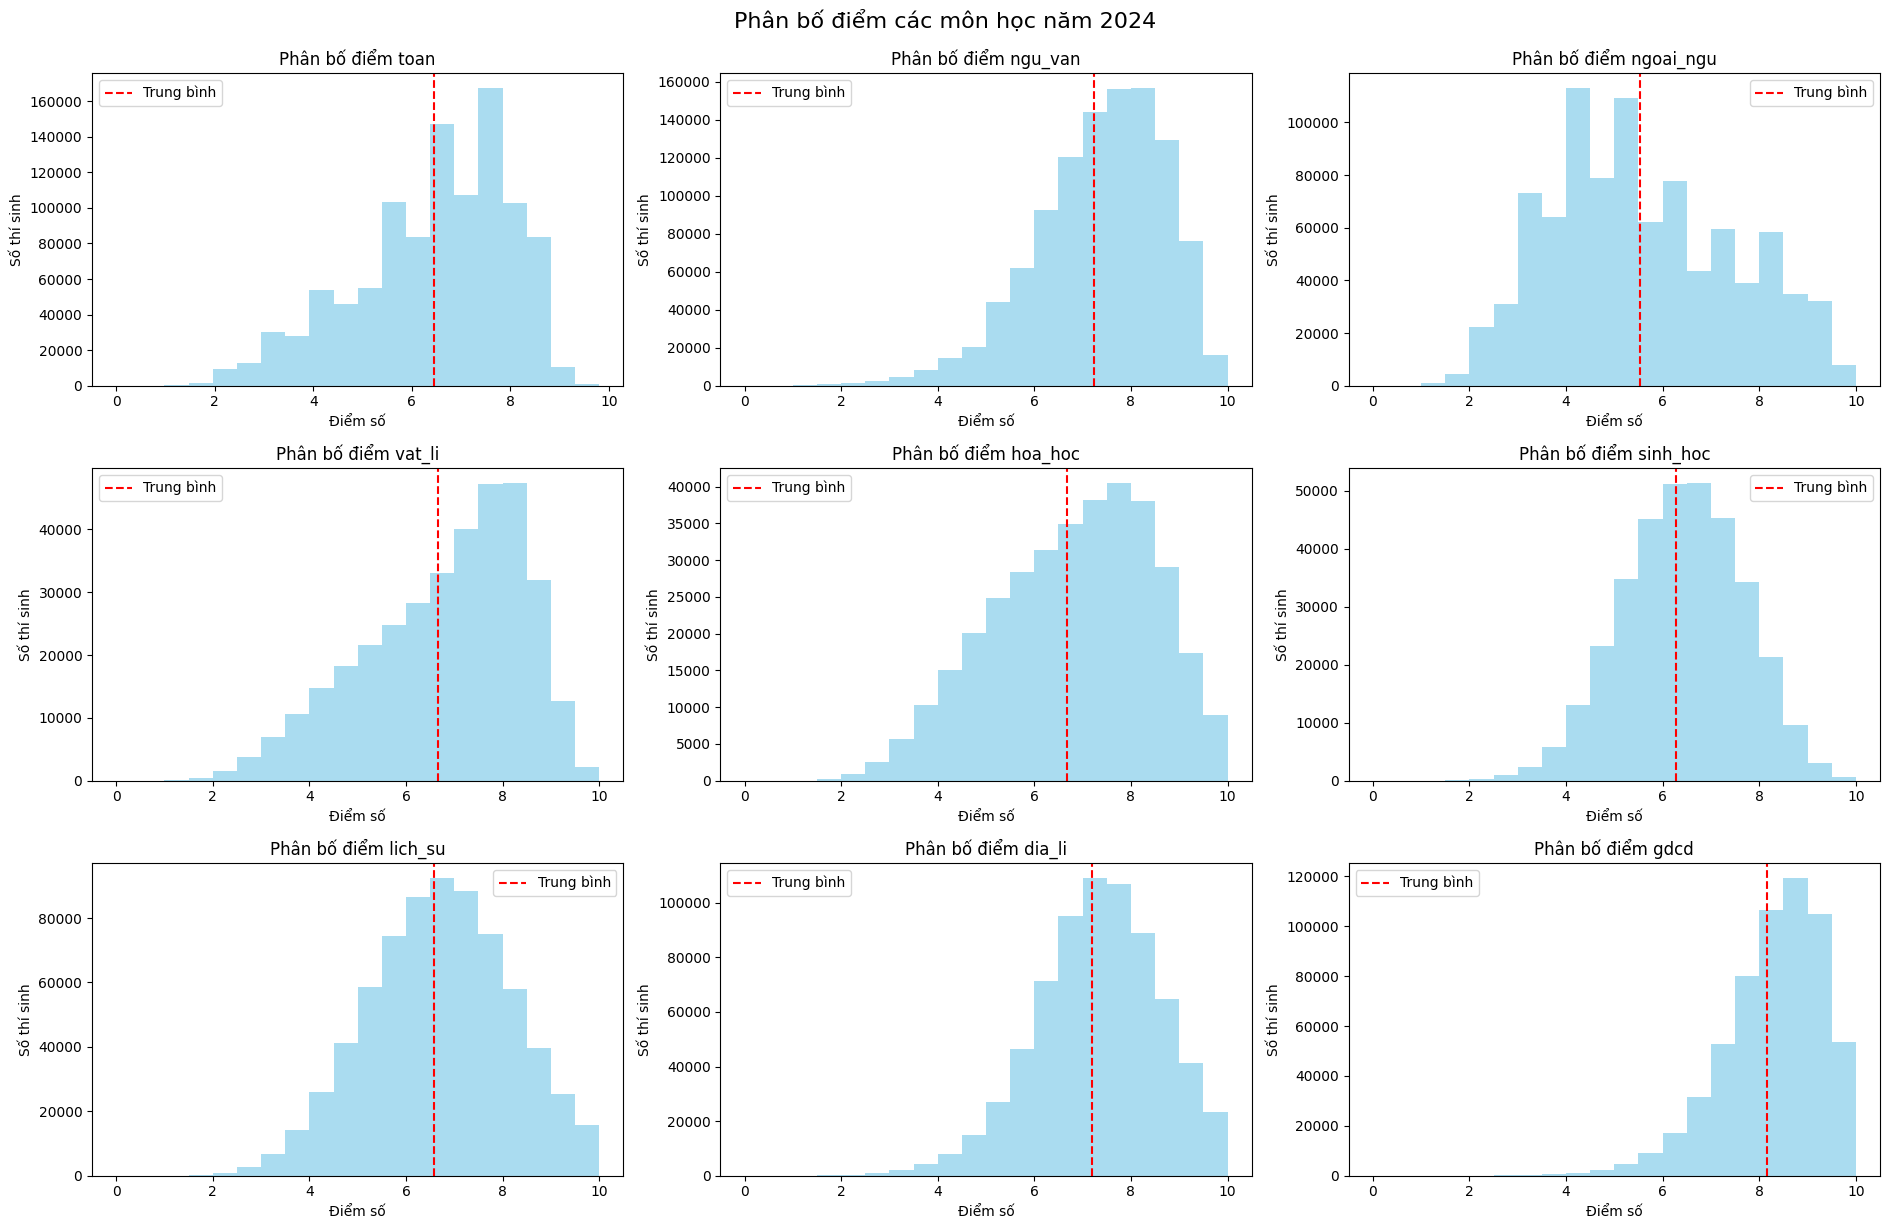

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 12))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    if subject in data_24.columns:
        axes[i].hist(data_24[subject].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Phân bố điểm {subject}')
        axes[i].set_xlabel('Điểm số')
        axes[i].set_ylabel('Số thí sinh')
        axes[i].axvline(data_24[subject].mean(), color='red', linestyle='--', label='Trung bình')
        axes[i].legend()

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học năm 2024', fontsize=16, y=1.02)
plt.show()

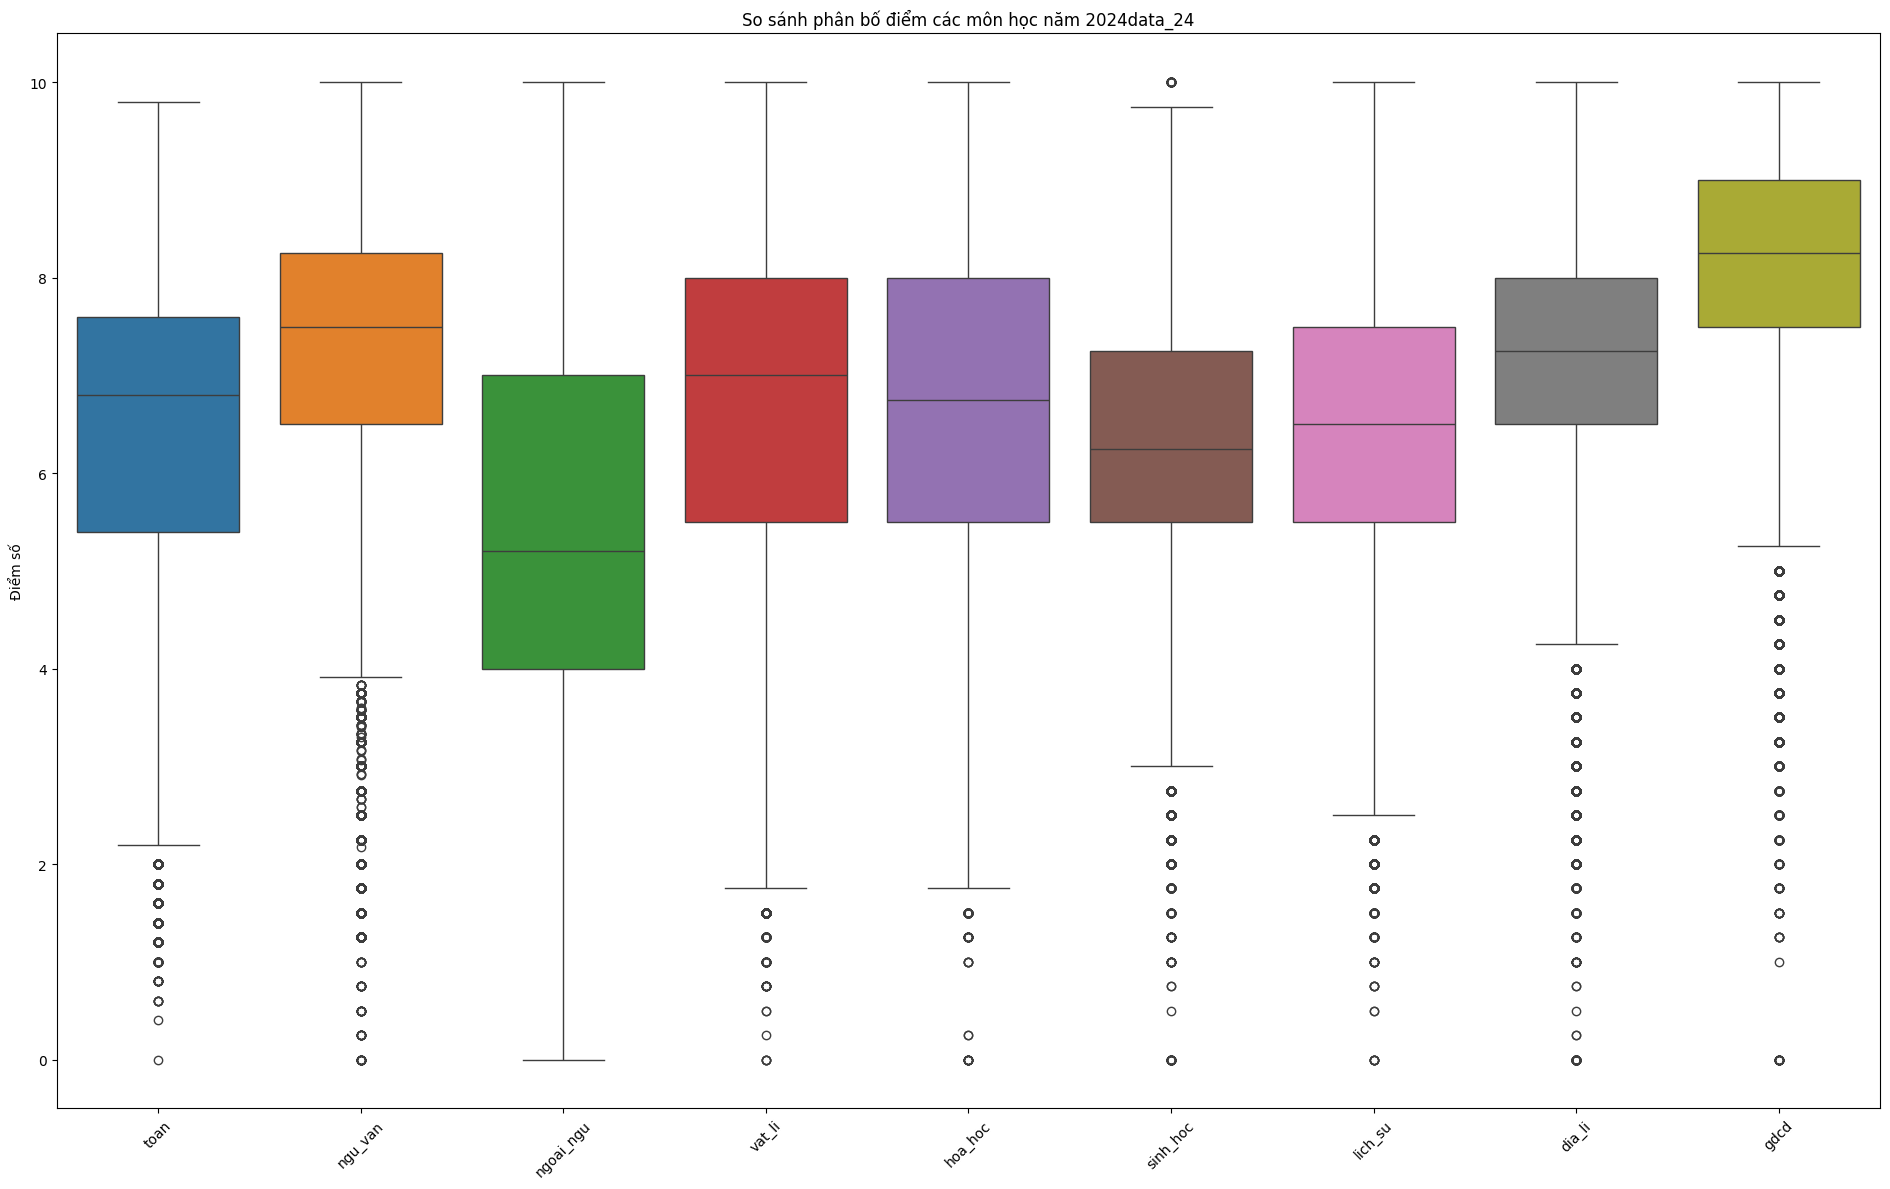

In [ ]:
data_subjects = data_24[subjects]

plt.figure(figsize=(19, 12))
sns.boxplot(data=data_subjects)
plt.title('So sánh phân bố điểm các môn học năm 2024data_24')
plt.ylabel('Điểm số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

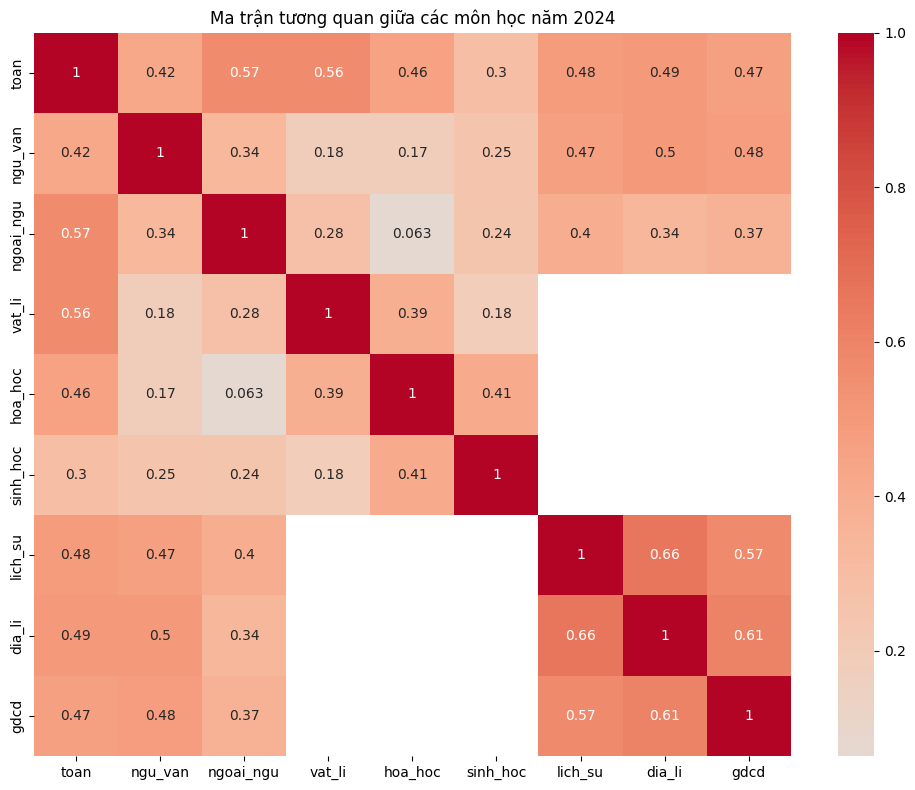

In [ ]:
# Ma trận tương quan
correlation_matrix = data_24[subjects].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các môn học năm 2024')
plt.tight_layout()
plt.show()

In [ ]:
# Tính điểm khối thi
data_24['Khối_A'] = data_24['toan'] + data_24['vat_li'] + data_24['hoa_hoc']
data_24['Khối_B'] = data_24['toan'] + data_24['hoa_hoc'] + data_24['sinh_hoc']
data_24['Khối_C'] = data_24['ngu_van'] + data_24['lich_su'] + data_24['dia_li']
data_24['Khối_D'] = data_24['toan'] + data_24['ngu_van'] + data_24['ngoai_ngu']
# Thống kê khối thi
print("=== THỐNG KÊ KHỐI THI ===")
for khoi in ['Khối_A', 'Khối_B', 'Khối_C', 'Khối_D']:
    valid_count = data_24[khoi].count()
    if valid_count > 0:
        print(f"{khoi}:")
        print(f"  Số thí sinh: {valid_count:,}")
        print(f"  Điểm trung bình: {data_24[khoi].mean():.2f}")
        print(f"  Điểm cao nhất: {data_24[khoi].max():.2f}")

=== THỐNG KÊ KHỐI THI ===
Khối_A:
  Số thí sinh: 343,800
  Điểm trung bình: 20.90
  Điểm cao nhất: 29.60
Khối_B:
  Số thí sinh: 342,291
  Điểm trung bình: 20.53
  Điểm cao nhất: 29.55
Khối_C:
  Số thí sinh: 704,008
  Điểm trung bình: 20.95
  Điểm cao nhất: 29.75
Khối_D:
  Số thí sinh: 908,866
  Điểm trung bình: 19.51
  Điểm cao nhất: 28.75


In [ ]:
# 1. Cấu hình các khối thi và môn tương ứng
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

# 2. Tính điểm trung bình và gộp với bản đồ riêng cho từng khối
score_maps = {}
for block, subject in blocks.items():
    temp = data_24.copy()
    temp['average score'] = temp[subject].mean(axis=1, skipna=True)
    avg_score_by_prov = temp.groupby('province')['average score'].mean().reset_index()

    # 💡 Sử dụng bản sao mới của vietnam_map để tránh ghi đè
    vietnam_map_copy = vietnam_map.copy()

    merged_map = vietnam_map_copy.merge(
        avg_score_by_prov,
        how='left',
        left_on='name',
        right_on='province',
        suffixes=('', '_dup')
    )

    if 'average score_dup' in merged_map.columns:
        merged_map.drop(columns=['average score_dup'], inplace=True)

    score_maps[block] = merged_map
    print(f"{block}: ", merged_map['average score'].describe())


A00:  count    63.000000
mean      6.090854
std       0.494862
min       4.530911
25%       5.826619
50%       6.171264
75%       6.400053
max       7.070960
Name: average score, dtype: float64
A01:  count    63.000000
mean      5.719101
std       0.529876
min       4.227557
25%       5.394769
50%       5.798628
75%       6.036658
max       6.818603
Name: average score, dtype: float64
B00:  count    63.000000
mean      6.059028
std       0.477854
min       4.533283
25%       5.783057
50%       6.074240
75%       6.372991
max       6.994912
Name: average score, dtype: float64
D01:  count    63.000000
mean      6.219991
std       0.482899
min       4.928471
25%       5.896144
50%       6.217019
75%       6.614255
max       7.085051
Name: average score, dtype: float64


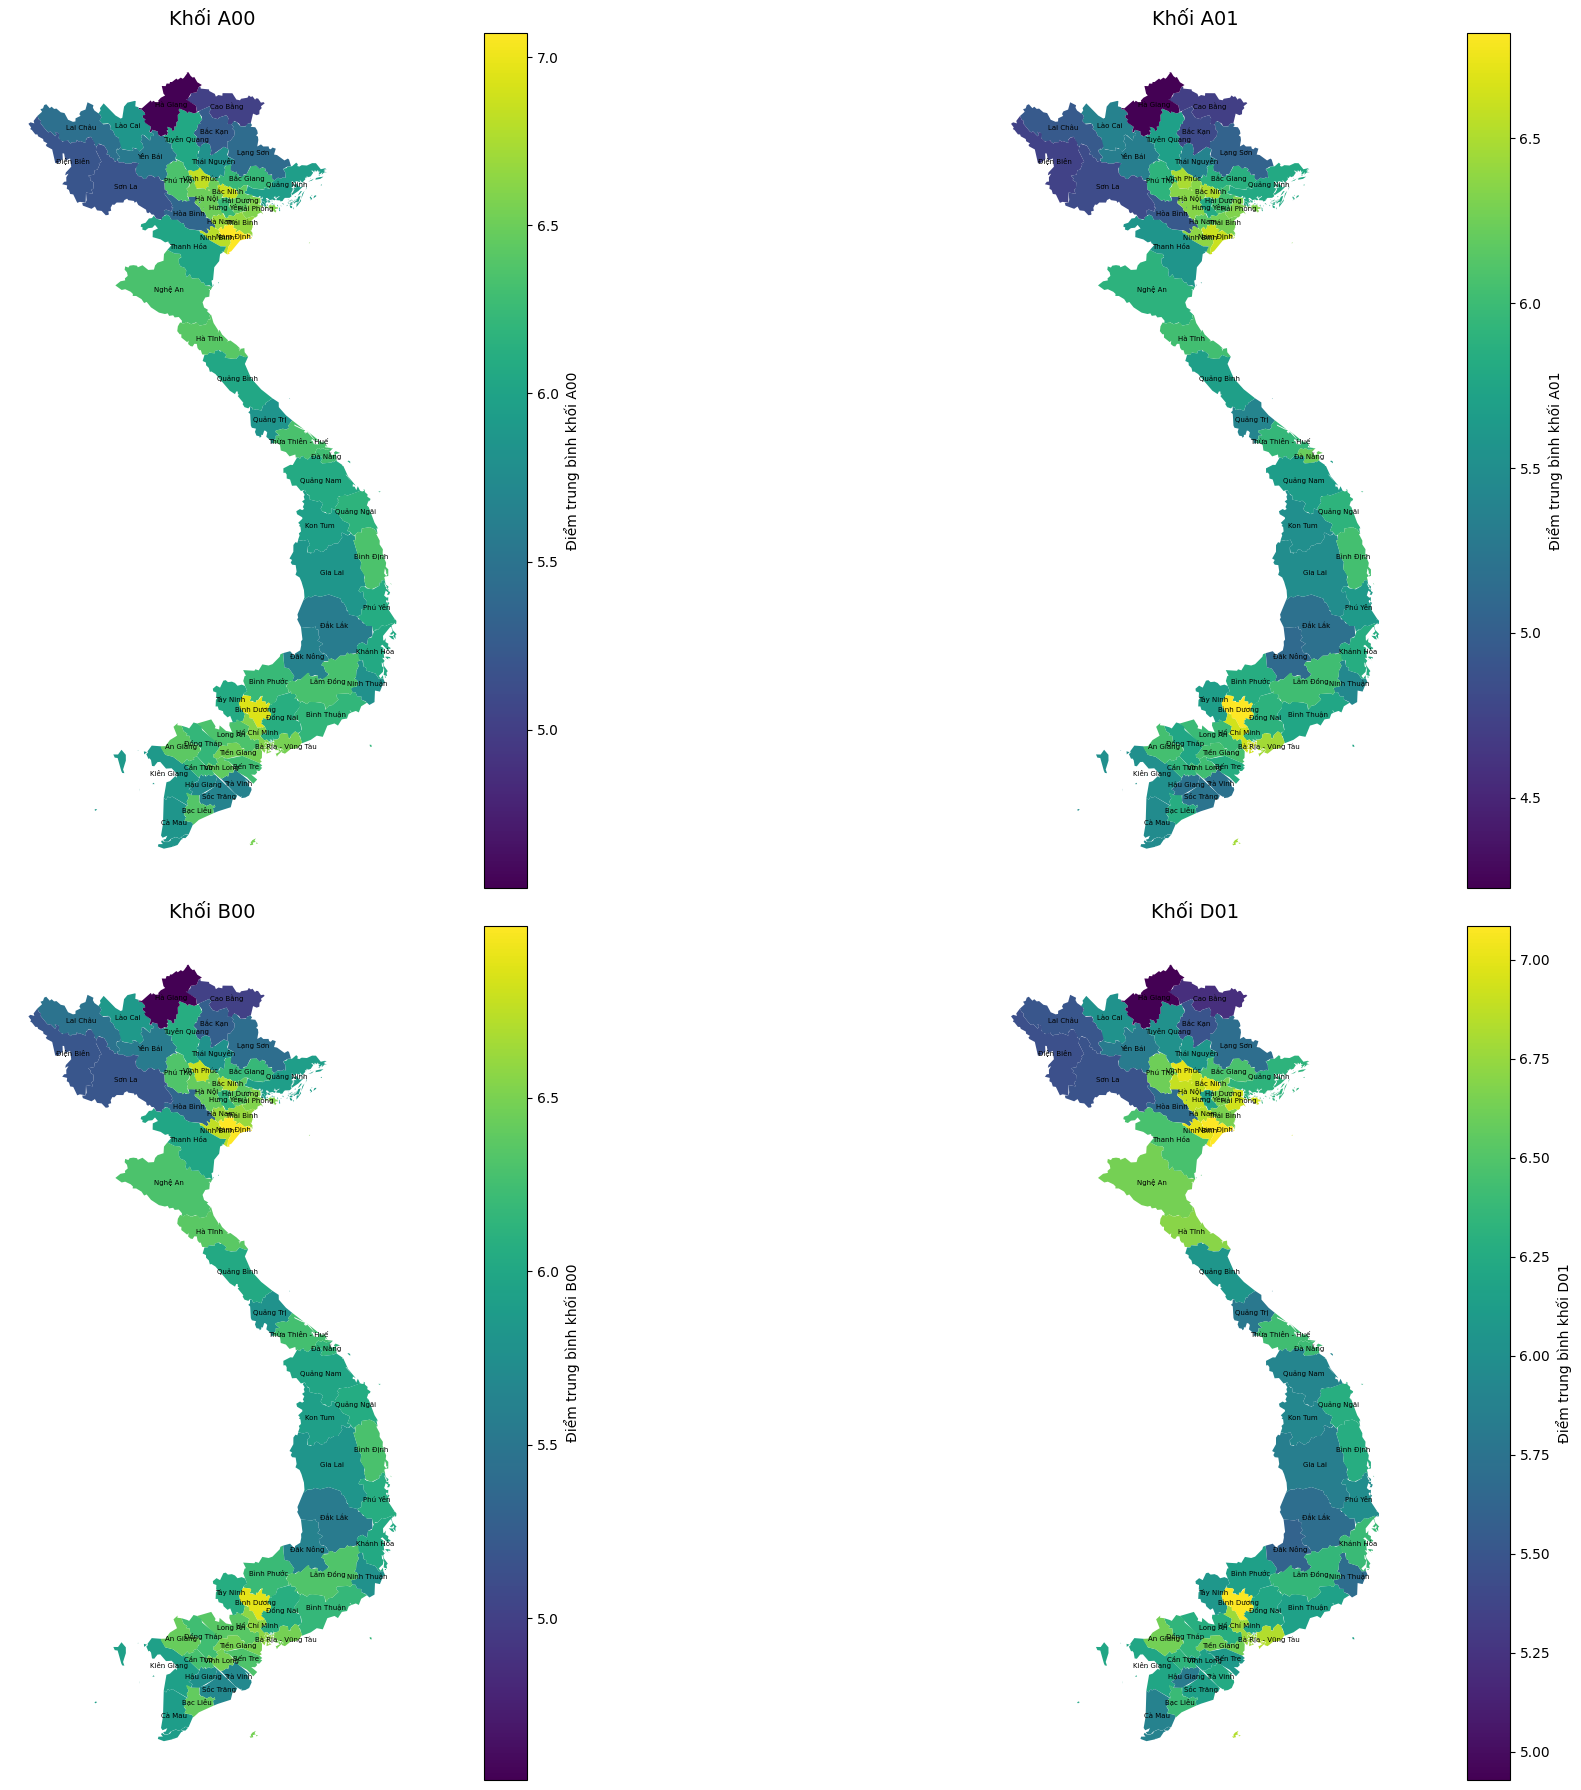

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(24, 18))  # 2 hàng, 2 cột
axes = axes.flatten()  # Chuyển về 1D để dễ lặp

for i, block in enumerate(['A00', 'A01', 'B00', 'D01']):
    ax = axes[i]
    map_data = score_maps[block]

    map_data.plot(
        column='average score',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Điểm trung bình khối {block}", 'orientation': "vertical"}
    )

    # Ghi nhãn tên tỉnh
    for idx, row in map_data.iterrows():
        if isinstance(row['geometry'], (Polygon, MultiPolygon)):
            centroid = row['geometry'].centroid
            ax.annotate(
                text=row['name'],
                xy=(centroid.x, centroid.y),
                ha='center', va='center',
                fontsize=5, color='black'
            )

    ax.set_title(f"Khối {block}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


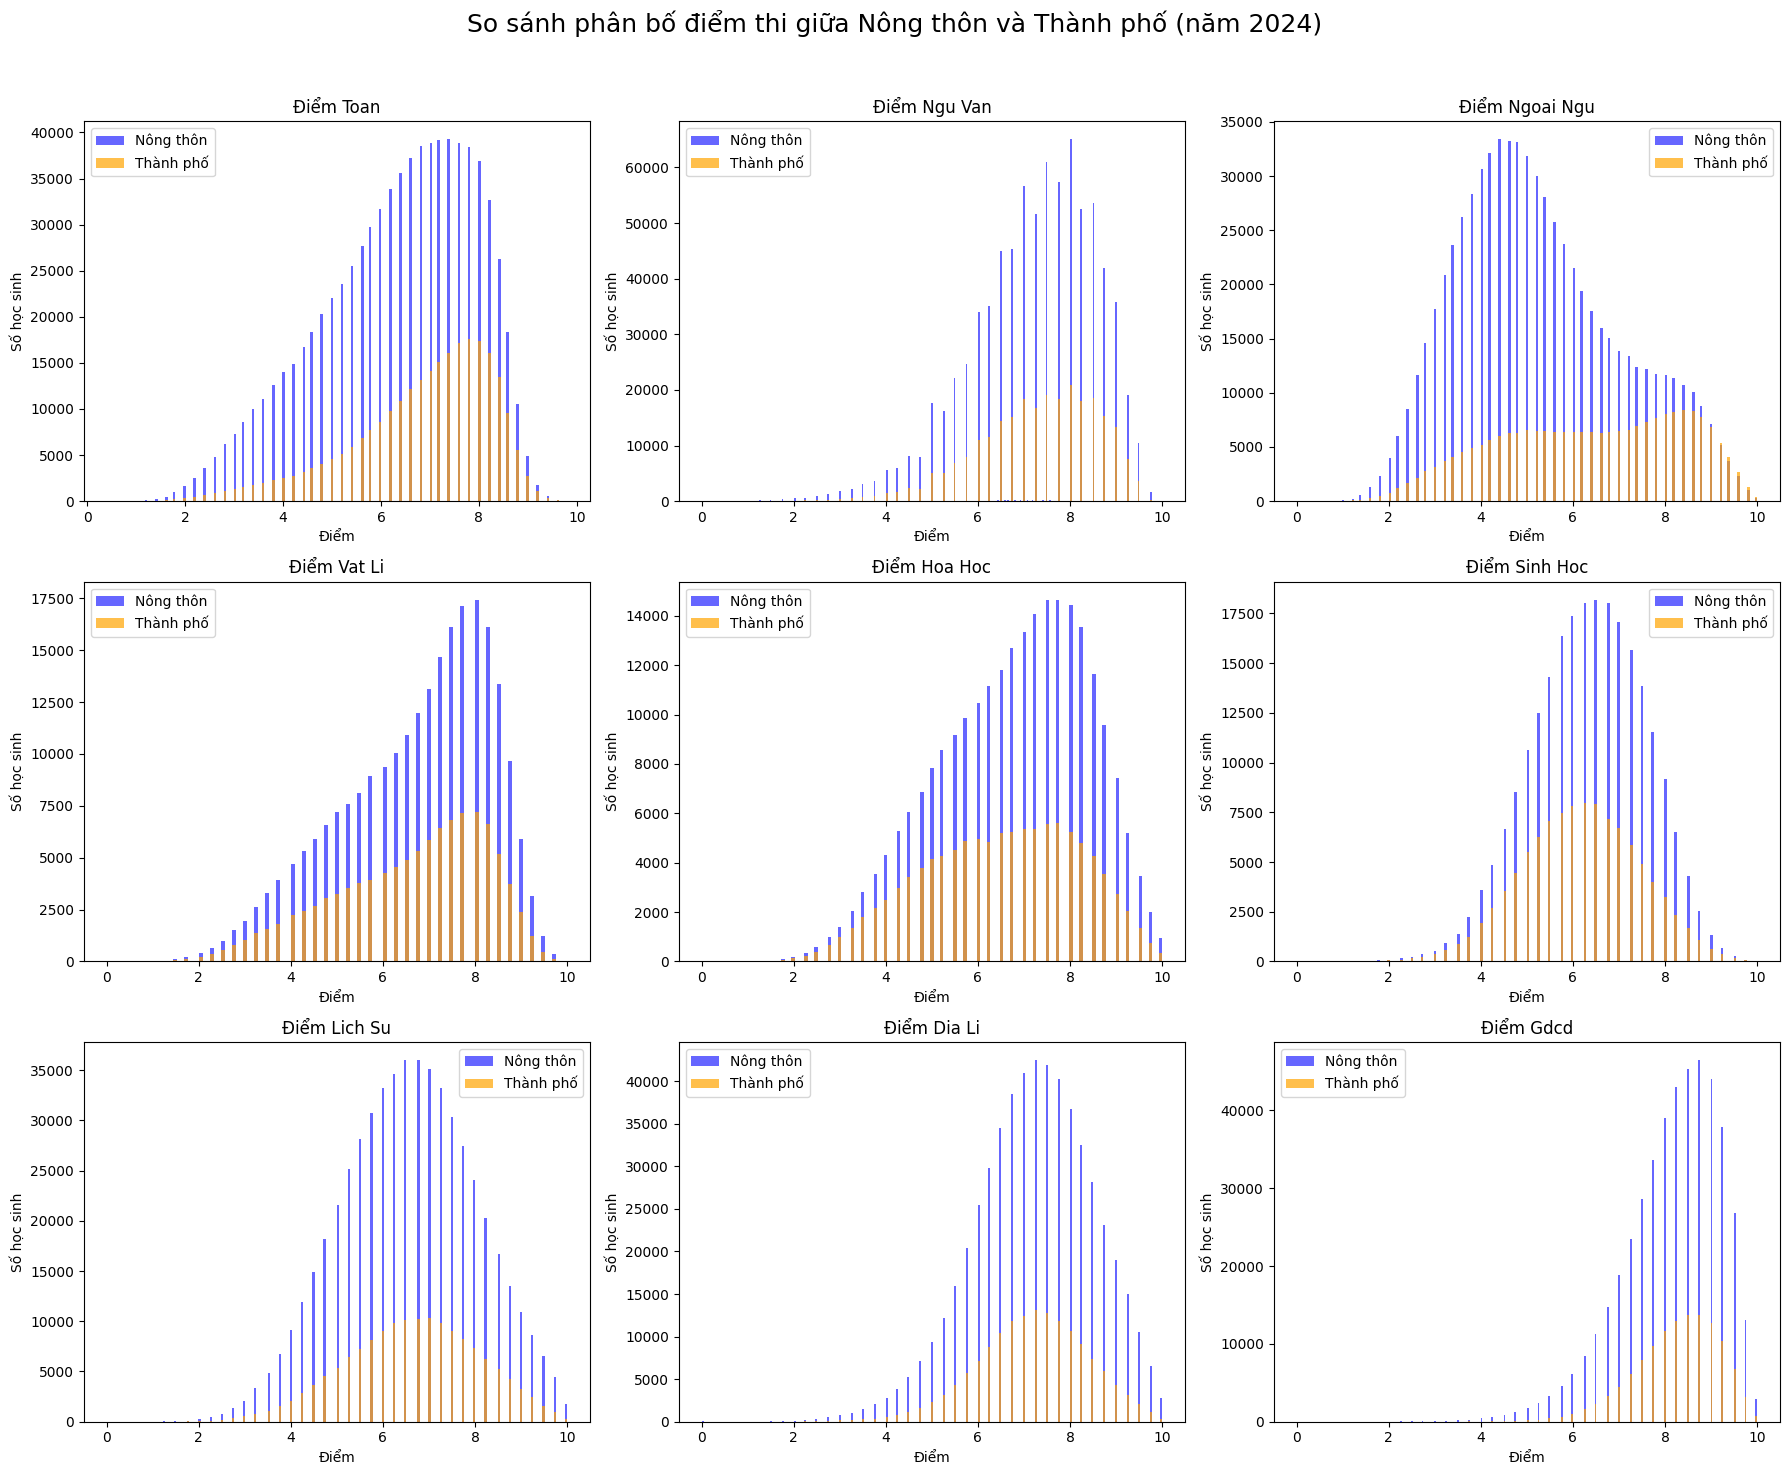

In [ ]:
# Phân nhóm tỉnh thành phố và nông thôn
df = data_24.copy() ####
cities = ['Hồ Chí Minh', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ', 'Bình Dương']
df_cities = df[df['province'].isin(cities)]
df_other_provinces = df[~df['province'].isin(cities)]

# Tạo 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Dữ liệu từng môn (loại bỏ NaN)
    city_scores = df_cities[subject].dropna()
    rural_scores = df_other_provinces[subject].dropna()

    # Dùng cùng bin cho 2 nhóm để dễ so sánh
    bins = 'auto'
    counts_rural, bins_rural, _ = ax.hist(rural_scores, bins=bins, color='blue', alpha=0.6, label='Nông thôn')
    ax.hist(city_scores, bins=bins_rural, color='orange', alpha=0.7, label='Thành phố')

    ax.set_title(f"Điểm {subject.replace('_', ' ').title()}")
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số học sinh')
    ax.legend()

plt.suptitle("So sánh phân bố điểm thi giữa Nông thôn và Thành phố (năm 2024)", fontsize=18) ###
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chừa chỗ cho tiêu đề
plt.show()


/tmp/ipython-input-73-2526121712.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


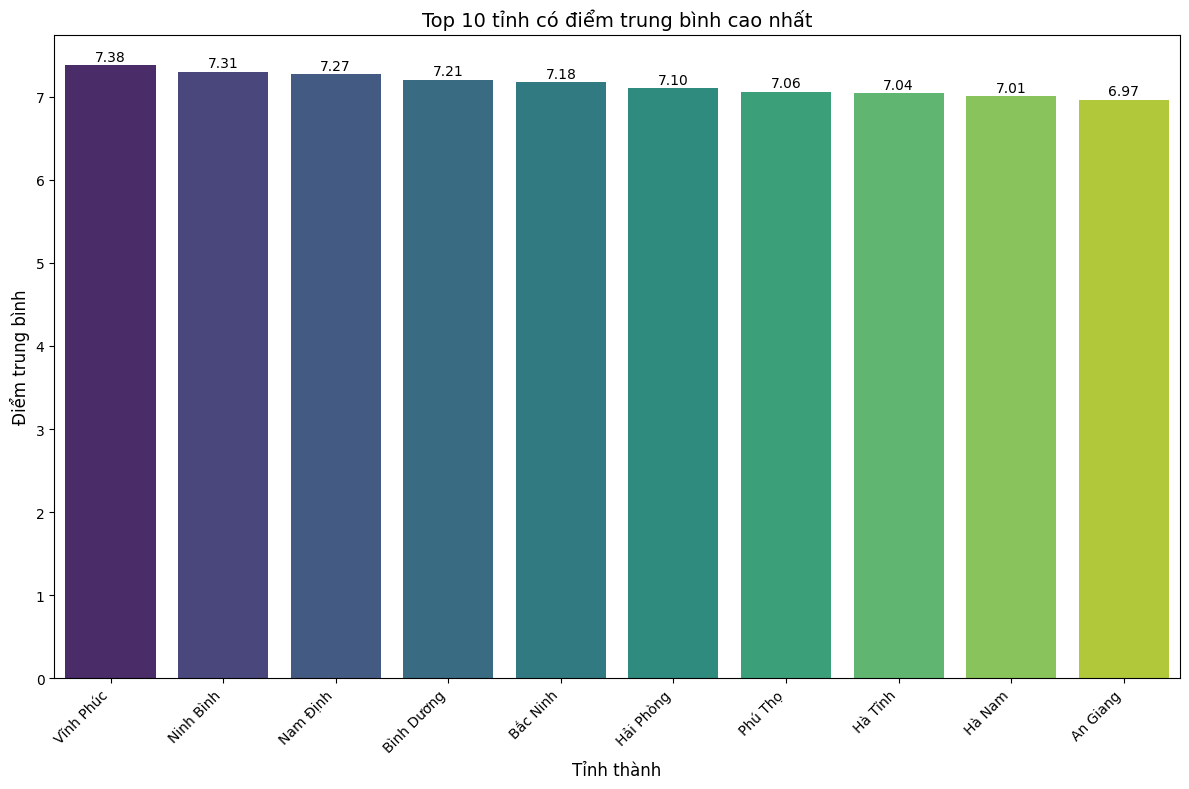

In [ ]:
# Tính điểm trung bình 6 môn
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
data = data_24.copy() ####
data['avg_subjects'] = data[subjects].mean(axis=1, skipna=True)

# Trung bình theo tỉnh
province_avg = (
    data.groupby('province')['avg_subjects']
    .mean()
    .reset_index()
    .sort_values(by='avg_subjects', ascending=False)
)

# Lấy 10 tỉnh cao nhất
top10 = province_avg.head(10)

# Vẽ barplot dọc
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top10,
    x='province',
    y='avg_subjects',
    palette='viridis'
)

# Thêm điểm số lên đầu mỗi cột
for i, row in top10.iterrows():
    ax.text(
        x=top10.index.get_loc(i),
        y=row['avg_subjects'] + 0.02,  # để lệch lên trên 1 chút
        s=f"{row['avg_subjects']:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xlabel("Tỉnh thành", fontsize=12)
plt.title("Top 10 tỉnh có điểm trung bình cao nhất", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
social_science_sample = data_24.dropna(subset=['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']) ####

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['ngu_van', 'ngoai_ngu', 'dia_li', 'gdcd', 'lich_su']:
    social_science_sample[column] = social_science_sample[column].apply(classify_score)

# P(Ngu Van High | GDCD High)
p_van_high_given_gdcd_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High')]) / len(social_science_sample[social_science_sample['gdcd'] == 'High'])

# P(GDCD High | Ngu Van High)
p_gdcd_high_given_van_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[social_science_sample['ngu_van'] == 'High'])

# P(GDCD High | Ngu Van High, Ngoai Ngu High)
p_gdcd_high_given_van_ngoai_high = len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# P(Ngoai Ngu High | GDCD High, Ngu Van High)
p_ngoai_ngu_high_given_gdcd_van_high = len(social_science_sample[(social_science_sample['ngoai_ngu'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngu_van'] == 'High')])

# P(Ngu Van High | GDCD High, Ngoai Ngu High)
p_van_high_given_gdcd_ngoai_high = len(social_science_sample[(social_science_sample['ngu_van'] == 'High') & (social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')]) / len(social_science_sample[(social_science_sample['gdcd'] == 'High') & (social_science_sample['ngoai_ngu'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Ngu Van High | GDCD High)': p_van_high_given_gdcd_high,
    'P(GDCD High | Ngu Van High)': p_gdcd_high_given_van_high,
    'P(GDCD High | Ngu Van High, Ngoai Ngu High)': p_gdcd_high_given_van_ngoai_high,
    'P(Ngoai Ngu High | GDCD High, Ngu Van High)': p_ngoai_ngu_high_given_gdcd_van_high,
    'P(Ngu Van High | GDCD High, Ngoai Ngu High)': p_van_high_given_gdcd_ngoai_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.447448                     0.766234   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.842395   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.204588   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.738381  


P(Ngu Van High | GDCD High)  P(GDCD High | Ngu Van High)  \
0                     0.447448                     0.766234   

   P(GDCD High | Ngu Van High, Ngoai Ngu High)  \
0                                     0.842395   

   P(Ngoai Ngu High | GDCD High, Ngu Van High)  \
0                                     0.204588   

   P(Ngu Van High | GDCD High, Ngoai Ngu High)  
0                                     0.738381

In [ ]:
pd.options.mode.chained_assignment = None

# Filter students who have scores in all five subjects
natural_science_sample = data_24.dropna(subset=['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc'])

def classify_score(score):
    if score < 5:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Apply the classification to the sample
for column in ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']:
    natural_science_sample[column] = natural_science_sample[column].apply(classify_score)

# P(Toan High | Hoa Hoc High)
p_toan_high_given_hoahoc_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[natural_science_sample['hoa_hoc'] == 'High'])

# P(Toan High | Vat Li High)
p_toan_high_given_vatli_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[natural_science_sample['vat_li'] == 'High'])

# P(Toan High | Vat Li High, Hoa Hoc High)
p_toan_high_given_li_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['vat_li'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# P(Sinh Hoc High | Hoa Hoc High, Vat Li High)
p_sinh_high_given_hoa_li_high = len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')]) / len(natural_science_sample[(natural_science_sample['hoa_hoc'] == 'High') & (natural_science_sample['vat_li'] == 'High')])

# P(Toan Hoc High | Sinh Hoc High, Hoa Hoc High)
p_toan_high_given_sinh_hoa_high = len(natural_science_sample[(natural_science_sample['toan'] == 'High') & (natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')]) / len(natural_science_sample[(natural_science_sample['sinh_hoc'] == 'High') & (natural_science_sample['hoa_hoc'] == 'High')])

# Compile results into a dictionary
conditional_probabilities_advanced = {
    'P(Toan High | Hoa Hoc High)': p_toan_high_given_hoahoc_high,
    'P(Toan High | Vat Li High)': p_toan_high_given_vatli_high,
    'P(Toan Hoc High | Vat Li High, Hoa Hoc High)': p_toan_high_given_li_hoa_high,
    'P(Sinh High | Vat Li High, Hoa Hoc High)': p_sinh_high_given_hoa_li_high,
    'P(Toan High | Sinh Hoc High, Hoa Hoc High)': p_toan_high_given_sinh_hoa_high
}

# Convert probabilities to a DataFrame for better visualization
conditional_probabilities_advanced_df = pd.DataFrame(conditional_probabilities_advanced, index=[0])

# Display the results
print(conditional_probabilities_advanced_df)

conditional_probabilities_advanced_df

   P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.596904                    0.636094   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.727536   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.105541   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.688131  


P(Toan High | Hoa Hoc High)  P(Toan High | Vat Li High)  \
0                     0.596904                    0.636094   

   P(Toan Hoc High | Vat Li High, Hoa Hoc High)  \
0                                      0.727536   

   P(Sinh High | Vat Li High, Hoa Hoc High)  \
0                                  0.105541   

   P(Toan High | Sinh Hoc High, Hoa Hoc High)  
0                                    0.688131

###So sánh 5 năm###

####Số lượng thí sinh qua từng năm####

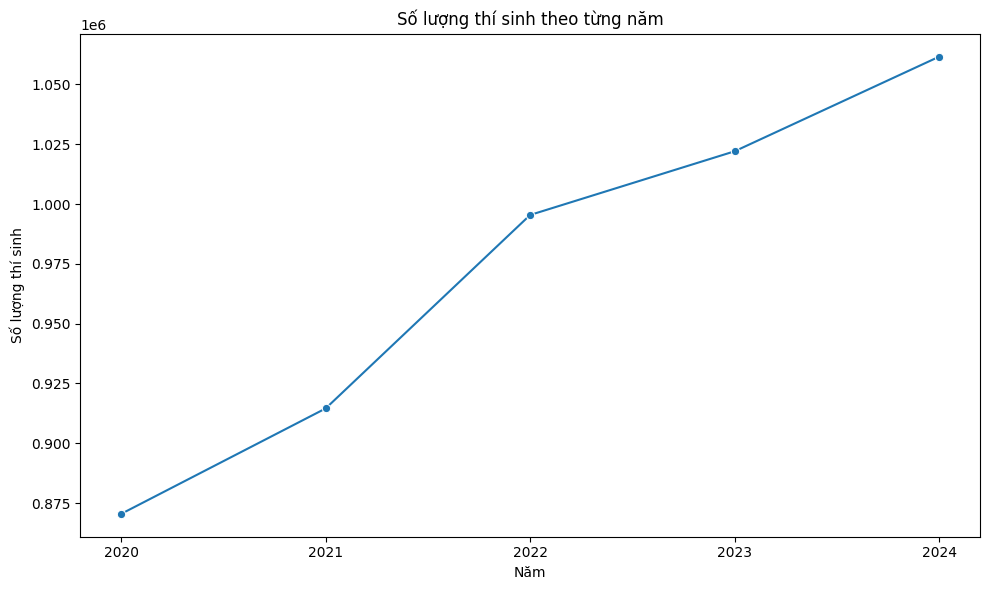

In [ ]:
students_per_year = {
    'year': [f"20{i}" for i in range (20,25)],
    'num_students': [eval(f"data_{i}").shape[0] for i in range(20, 25)]
}
plt.figure(figsize=(10, 6))
sns.lineplot(data=students_per_year, x='year', y='num_students', marker='o')
plt.title("Số lượng thí sinh theo từng năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng thí sinh")
plt.tight_layout()
plt.show()

####Số lượng thí sinh từng khối qua từng năm####

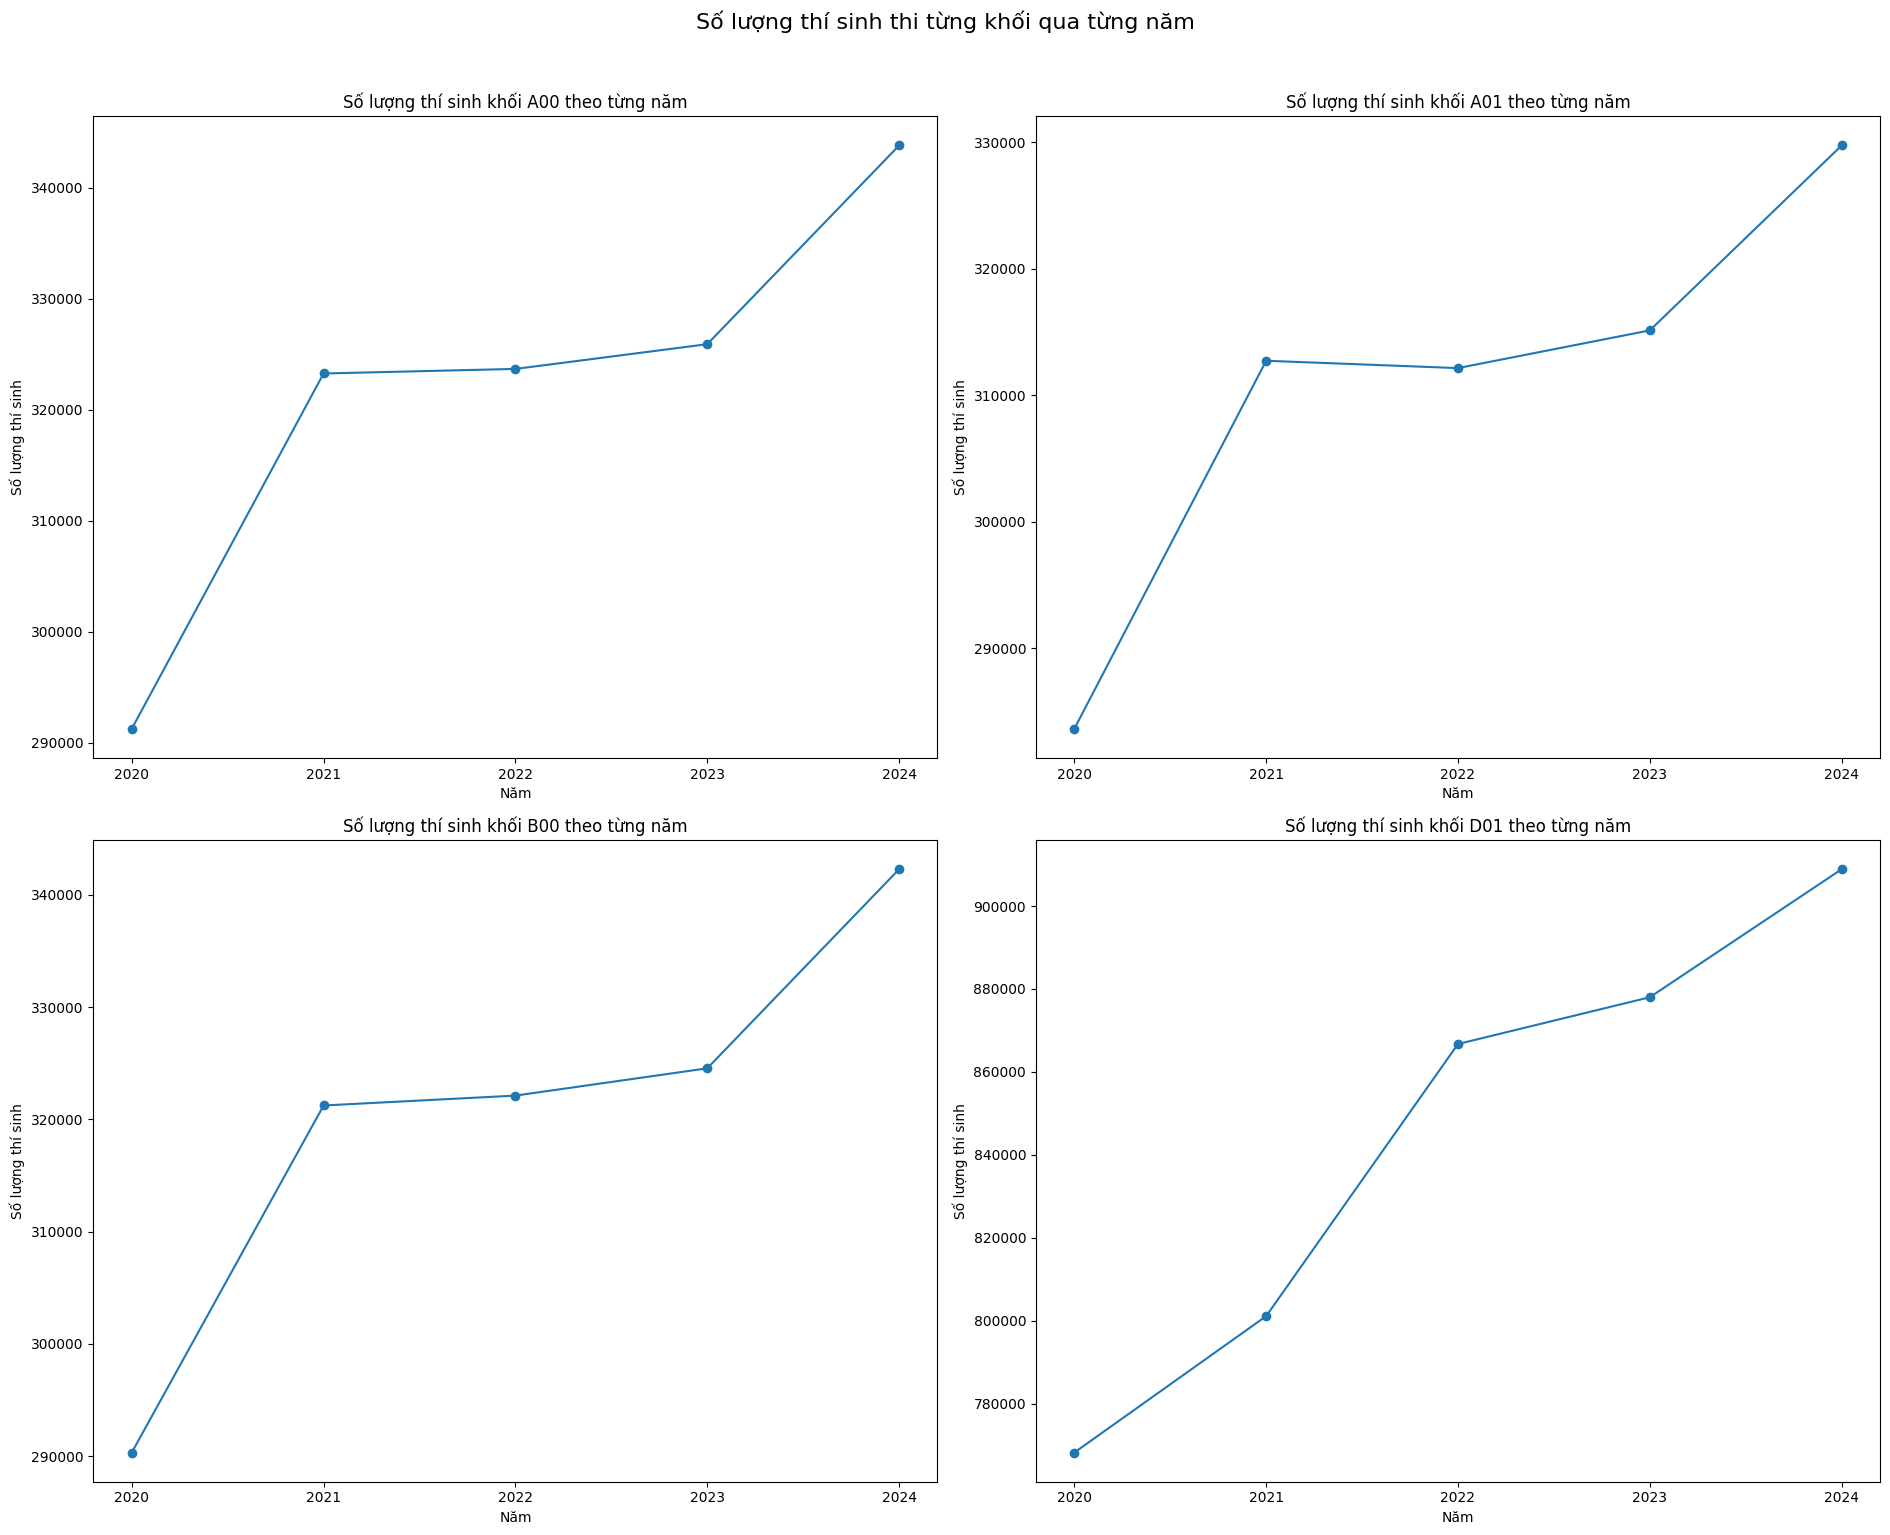

In [ ]:
blocks = {
    'A00': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B00': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'D01': ['toan', 'ngu_van', 'ngoai_ngu'],
}

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (19,15))
axs = axs.flatten()
j = 0
for block, block_subjects in blocks.items():
    students_per_year = {
        'year': [f"20{i}" for i in range(20, 25)],
        'num_students': []
    }
    num_students = []
    for i in range(20, 25):
        data = eval(f"data_{i}")
        # Đếm số thí sinh có điểm không NaN ở tất cả các môn của khối
        valid_students = data.dropna(subset=block_subjects).shape[0]
        num_students.append(valid_students)
    students_per_year['num_students'] = num_students
    axs[j].plot(students_per_year['year'], students_per_year['num_students'], marker='o', label=block)

    axs[j].set_title(f"Số lượng thí sinh khối {block} theo từng năm")
    axs[j].set_xlabel("Năm")
    axs[j].set_ylabel("Số lượng thí sinh")

    j+=1
plt.suptitle('Số lượng thí sinh thi từng khối qua từng năm', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

####Điểm trung bình các môn qua từng năm####

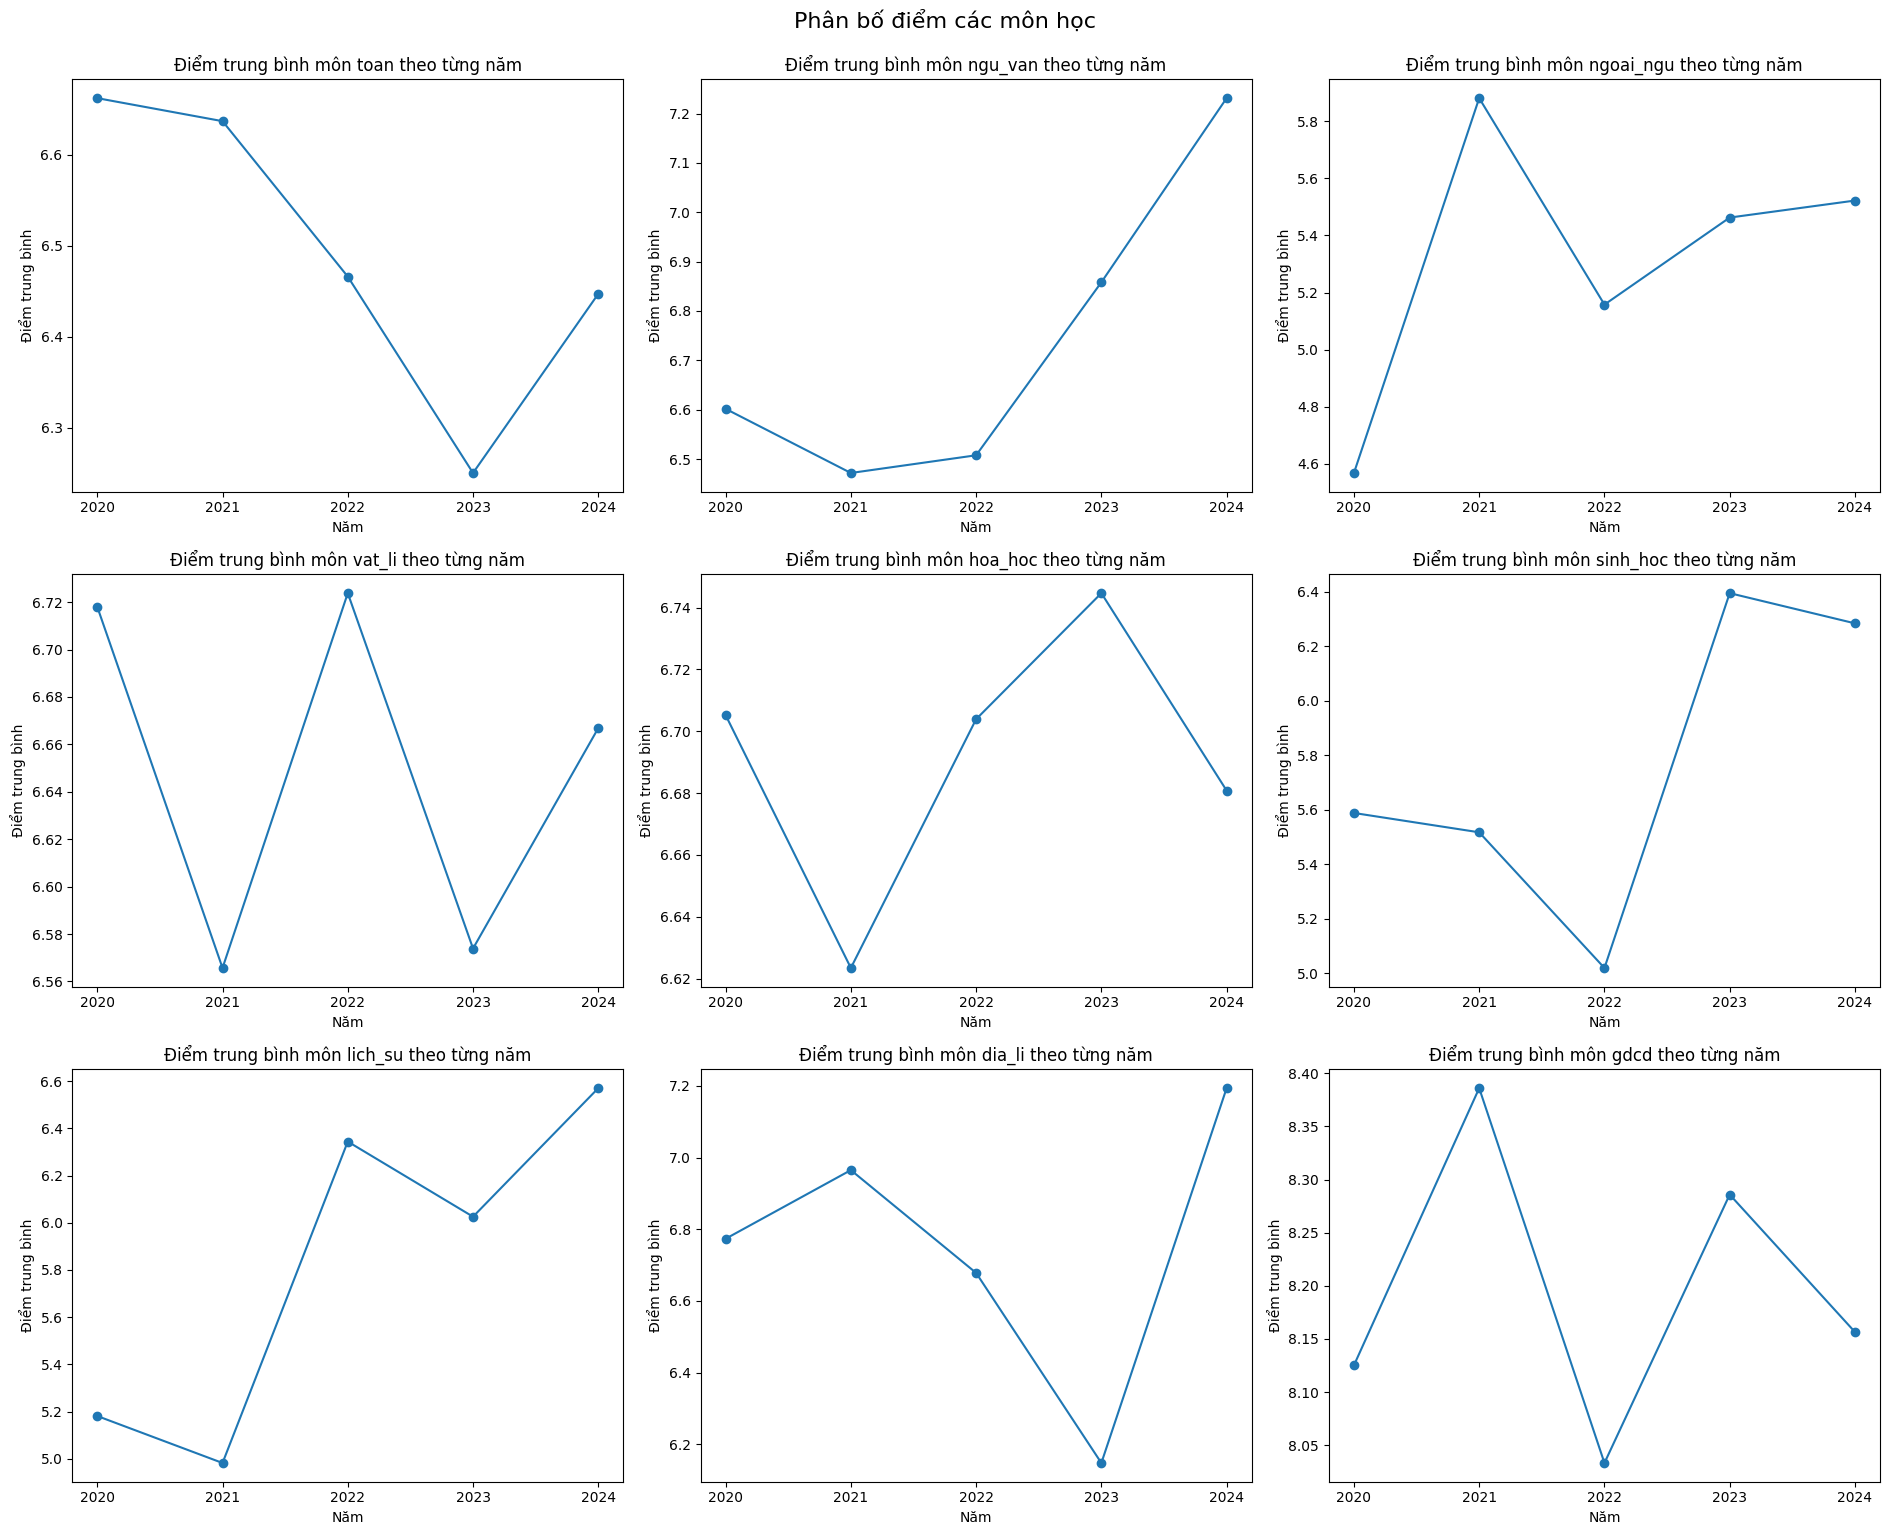

In [ ]:
# Histogram cho từng môn
fig, axes = plt.subplots(3, 3, figsize=(19, 15))
axes = axes.flatten()
data_all_years = {'year': [f"20{i}" for i in range (20,25)]}
for subject in subjects:
    subject_mean_list = []
    for i in range(20,25):
         subject_mean = eval(f"data_{i}")[subject].mean(skipna = True)
         subject_mean_list.append(subject_mean)
    data_all_years[subject] = subject_mean_list
for i, subject in enumerate(subjects):
    axes[i].plot(data_all_years['year'], data_all_years[subject] , marker='o', linestyle = '-')
    axes[i].set_title(f"Điểm trung bình môn {subject} theo từng năm")
    axes[i].set_xlabel("Năm")
    axes[i].set_ylabel("Điểm trung bình")

plt.tight_layout()
plt.suptitle('Phân bố điểm các môn học', fontsize=16, y=1.02)
plt.show()

####Tỉ lệ thí sinh trượt tốt nghiệp qua từng năm####

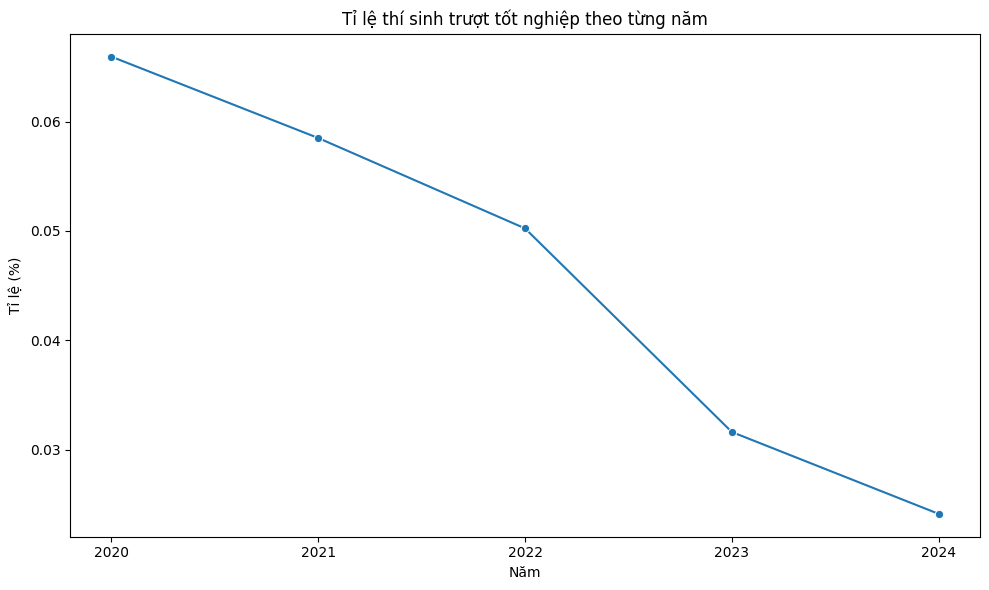

In [ ]:
failed_graduation = {
    'year': [f"20{i}" for i in range (20,25)],
    'failed_graduation_count': [((eval(f"data_{i}")[subjects].lt(1).any(axis=1).sum())/(eval(f"data_{i}").shape[0]))*100 for i in range(20, 25)]
}
plt.figure(figsize=(10, 6))
sns.lineplot(data=failed_graduation, x='year', y='failed_graduation_count', marker='o')
plt.title("Tỉ lệ thí sinh trượt tốt nghiệp theo từng năm")
plt.xlabel("Năm")
plt.ylabel("Tỉ lệ (%)")
plt.tight_layout()
plt.show()

###Phân cụm khối tự nhiên sử dụng Kmean###

In [ ]:
subjects = ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'ngoai_ngu', 'ngu_van']
df = data_20.copy()
df_cluster = df.dropna(subset=subjects).copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[subjects])


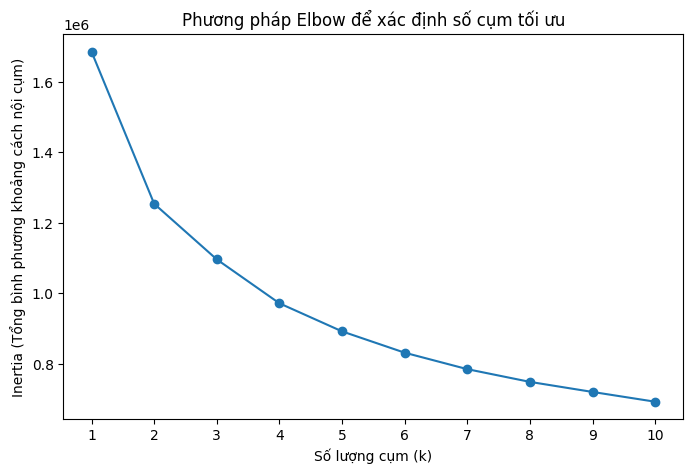

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia (Tổng bình phương khoảng cách nội cụm)')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.xticks(K)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = df_cluster.groupby('cluster')[subjects].mean().round(2)
print(cluster_summary)


         toan  vat_li  hoa_hoc  sinh_hoc  ngoai_ngu  ngu_van
cluster                                                     
0        8.55    7.07     7.90      6.90       6.03     7.41
1        6.84    5.09     5.19      4.90       4.03     6.45
2        8.29    7.36     7.50      5.07       4.29     6.41
3        8.42    7.36     5.43      5.14       7.29     6.91


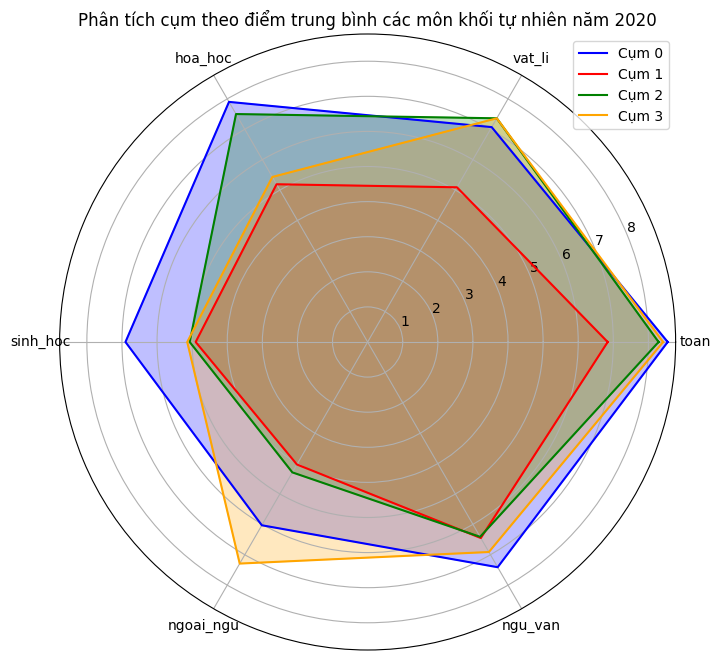

In [ ]:
# Radar chart
labels = subjects
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # vòng tròn

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['b', 'r', 'g', 'orange']

for i, row in cluster_summary.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cụm {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_title('Phân tích cụm theo điểm trung bình các môn khối tự nhiên năm 2020')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# - X_scaled: dữ liệu đã chuẩn hóa
# - labels: kết quả phân cụm (df_cluster['cluster'])

sil_score = silhouette_score(X_scaled, df_cluster['cluster'])

print(f"Silhouette Score: {sil_score:.3f}")



Silhouette Score: 0.180
